# Исследование объявлений о продаже квартир

Исследуются данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости.
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Цель исследования:  

 

 - изучить архив объявлений о продаже квартир в Санкт-Петербурге и соседних населенных пунктах;  
   
 - выполнить предобработку данных - заполнить пропуски, изменить типы данных, устранить дупликаты и аномальные значения
    
 - добавить в таблицу новые данные ( цена одного квадратного метра, день публикации объявления, месяц публикации объявления, год публикации объявления, тип этажа квартиры (первый, последний, другой), расстояние в км до центра города. 
    
 - найти интересные особенности и зависимости, которые существуют на рынке недвижимости: изучить, как быстро продавались квартиры; какие факторы больше всего влияют на общую  стоимость объекта; посчитать цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений; вычислить среднюю цену каждого километра в Санкт-Петербурге. </b>


- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод

# 1. Изучение общей информации

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [4]:
try: 
    data = pd.read_csv(r'C:\Users\Виталий\Desktop\real_estate_data.csv', sep ='\t')
except: 
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep = '\t')

In [5]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<b> Имеются 22 признака, часть из них была добавлена пользователями, часть - картографически. Всего - 23699 строк (квартир на продаже). Имеются пропуски в сведениях о высоте потолков `ceiling_height`, общем количестве этажей в доме `floors_total`, жилой площади в кв.м. `living_area`, является ли квартира аппартаментами `is_apartment`, площади кухни в кв.м. `kitchen_area`, числе балконов `balcony`, названии населенного пункта `locality_name`, расстоянии до ближайшего аэропорта в метрах `airports_nearest`, расстоянии до центра города в метрах `cityCenters_nearest`, количестве ближайших парков в радиусе 3 км и расстоянии до ближайшего парка в метрах `parks_around3000` и `parks_nearest`, числе водоемов в радиусе 3 км и расстоянии до ближайшего водоема `ponds_around3000` и `ponds_nearest`, сколько дней было размещено объявление о продаже `days_exposition`. </b>

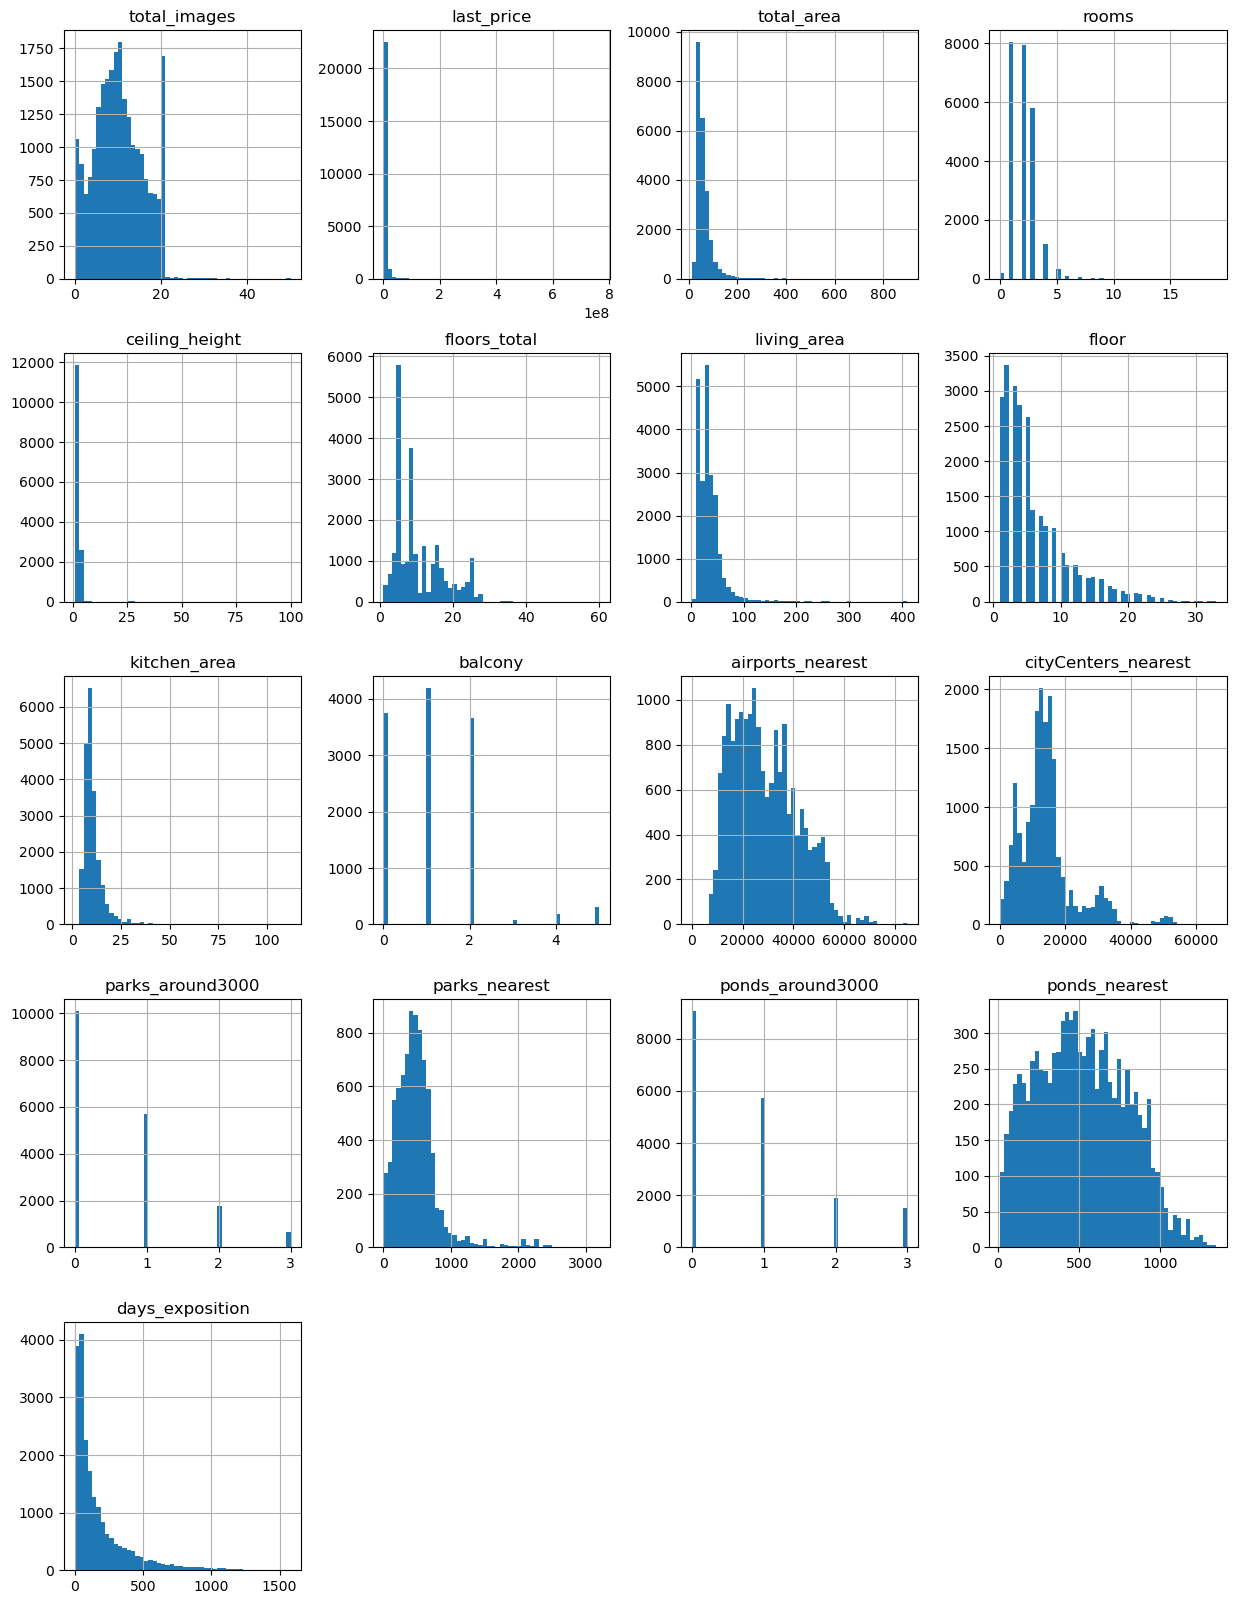

In [7]:
data.hist(figsize=(15,20), bins = 50)
plt.show()

In [6]:
data.duplicated().sum()

0

Стоит отметить, что не на всех гистограммах видно нормальное распределение. Это означает искажение данных. 

На данном этапе рассмотрим только те признаки, где отсутствуют пропущенные данные. К остальным вернемся после обработки позднее.

In [7]:
data['total_images'].describe()

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

<AxesSubplot:>

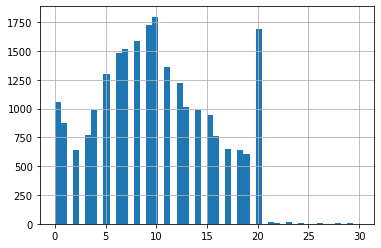

In [8]:
data['total_images'].hist(bins = 50, range = (0,30))
plt.show()

In [9]:
data['total_images'].value_counts()

10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
4      986
14     986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
28       4
32       4
29       3
50       3
27       2
35       2
30       2
31       2
39       1
25       1
42       1
37       1
Name: total_images, dtype: int64

Бросается в глаза разброс числа фотографий - пик на 9-10 и 20 фото. Странно, что есть много квартир с 0 фотографий. Вернемся к данному признаку на предмет проверки аномальных значений в п. 2.

In [10]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data['last_price'].describe()

count       23699.000
mean      6541548.772
std      10887013.268
min         12190.000
25%       3400000.000
50%       4650000.000
75%       6800000.000
max     763000000.000
Name: last_price, dtype: float64

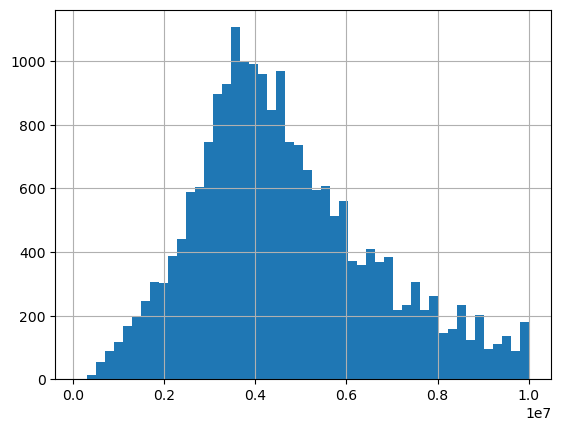

In [8]:
data['last_price'].hist(bins=50, range=(100000, 10000000))
plt.show()

Данные похожи на нормальное распределение, но, по всей видимости, есть и аномально низкие/высокие значения.

In [12]:
data['total_area'].describe()

count   23699.000
mean       60.349
std        35.654
min        12.000
25%        40.000
50%        52.000
75%        69.900
max       900.000
Name: total_area, dtype: float64

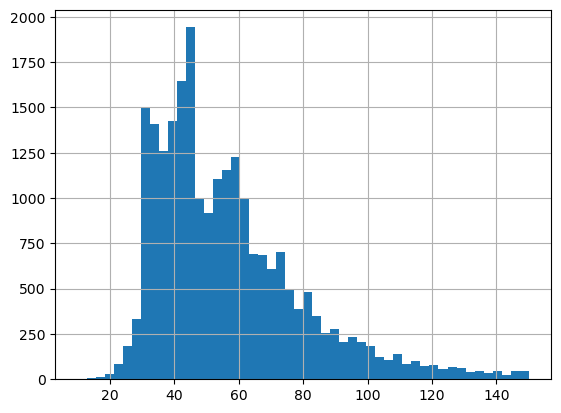

In [9]:
data['total_area'].hist(bins=50, range=(10, 150))
plt.show()

In [14]:
data['total_area'].value_counts()

45.000     419
42.000     383
60.000     347
31.000     346
44.000     345
          ... 
44.240       1
56.850       1
37.920       1
115.600      1
55.060       1
Name: total_area, Length: 2182, dtype: int64

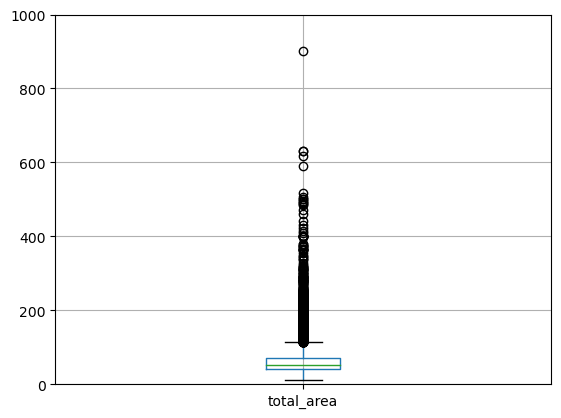

In [10]:
plt.ylim(0,1000)
data.boxplot('total_area')
plt.show()

Медиана -  52 кв.м. На диаграмме размаха видны удаленные точки, которые могут оказаться вбросами, из-за чего данные будут искажены. 

In [16]:
data['rooms'].describe()

count   23699.000
mean        2.071
std         1.078
min         0.000
25%         1.000
50%         2.000
75%         3.000
max        19.000
Name: rooms, dtype: float64

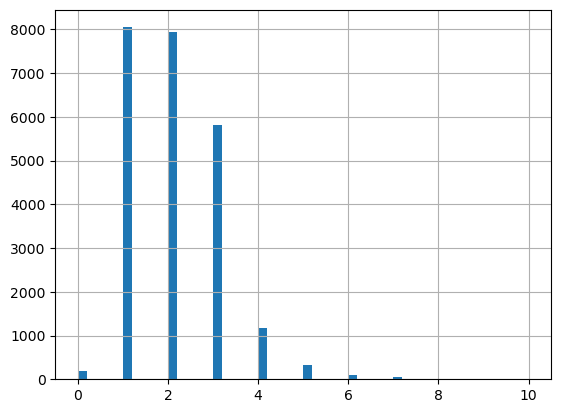

In [11]:
data['rooms'].hist(bins=50, range=(0, 10))
plt.show()

In [18]:
data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

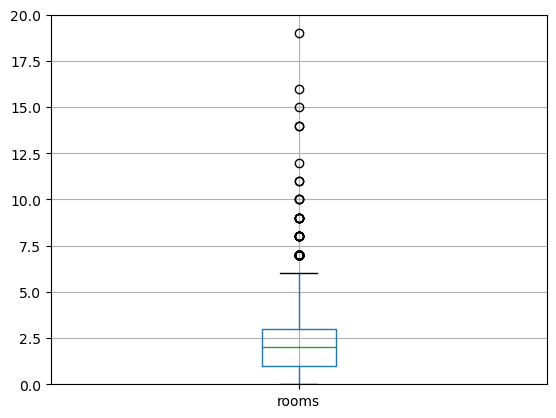

In [13]:
plt.ylim(0,20)
data.boxplot('rooms')
plt.show()

Странно, что в датафрейме есть данные о квартирах с 0 комнатами, их определенно нужно будет проверить (как и квартиры с 6+ комнатами). Большинство квартир имеют от 1 до 3 комнат, что в целом кажется нормальным. 

In [20]:
data['floor'].describe()

count   23699.000
mean        5.892
std         4.885
min         1.000
25%         2.000
50%         4.000
75%         8.000
max        33.000
Name: floor, dtype: float64

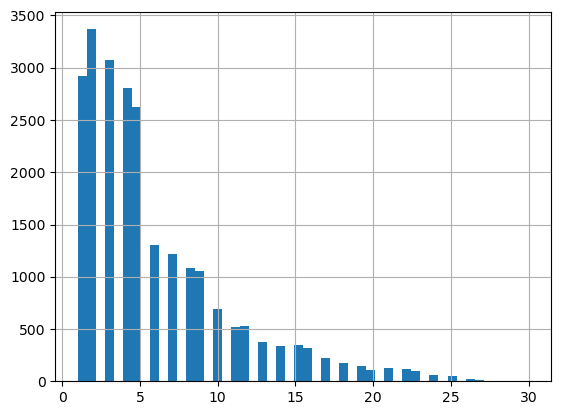

In [14]:
data['floor'].hist(bins=50, range=(1, 30))
plt.show()

In [22]:
data['floor'].value_counts()

2     3368
3     3073
1     2917
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
12     526
11     523
13     379
15     343
14     337
16     315
17     227
18     178
19     147
21     125
22     113
20     110
23     100
24      63
25      46
26      24
27      10
28       1
29       1
32       1
30       1
33       1
31       1
Name: floor, dtype: int64

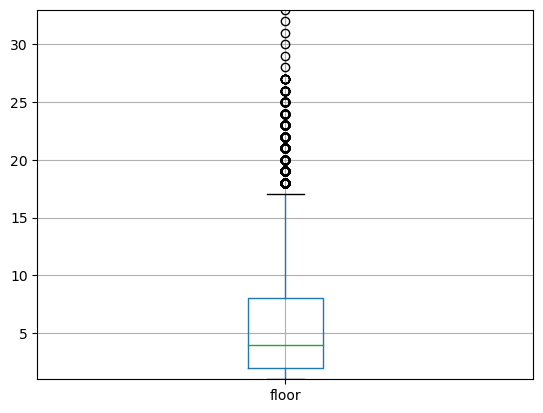

In [15]:
plt.ylim(1,33)
data.boxplot('floor')
plt.show()

Большинство квартир расположены в пределах первых девяти этажей. График похож на распределение Пуассона.

In [24]:
data['studio'].describe()

count     23699
unique        2
top       False
freq      23550
Name: studio, dtype: object

In [25]:
data['studio'].value_counts()

False    23550
True       149
Name: studio, dtype: int64

In [26]:
data['open_plan'].value_counts()

False    23632
True        67
Name: open_plan, dtype: int64

In [27]:
data.query('open_plan == True and studio == True')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


В `studio` и `open_plan` хранятся булевые значения: является ли квартира студией и имеется ли свободная планировка. Квартир, подходящих под оба условия, в датафрейме нет. Пропуски отсутствуют. Данные корректны и похожи на правду. 

### Промежуточный итог к первому пункту

Большинство продававшихся квартир имеют от 1 до 3 комнат, расположены на 1-9 этажах. Данные о том, является ли квартира студией `studio`, этаже в  `floor`, наличии в квартире свободной планировки `open_plan` кажутся неискаженными. Что касается `last_price`, то, как представляется, поиском аномалий нужно будет заняться в самом конце предобработки, т.к. этот признак является ключевым при анализе. <b> Наименования признаков корректны, не требуют редактирования. Явные дупликаты отсутствуют. </b> Для более полной картины необходимо завершить предобработку данных - заполнить пропуски, изменить тип данных, избавиться от неявных дупликатов и аномалий. 

#### План работы:

в п. 2 осуществить предобработку данных, двигаясь по каждому признаку слева направо, изменить тип данных там где это необходимо. В п.3 добавить новые признаки, в п.4 закончить анализ датафрейма, в п.5 подвести итоги исследования.

# 2. Предобработка данных

### `total_images`

In [28]:
data['total_images'].describe()

count   23699.000
mean        9.858
std         5.683
min         0.000
25%         6.000
50%         9.000
75%        14.000
max        50.000
Name: total_images, dtype: float64

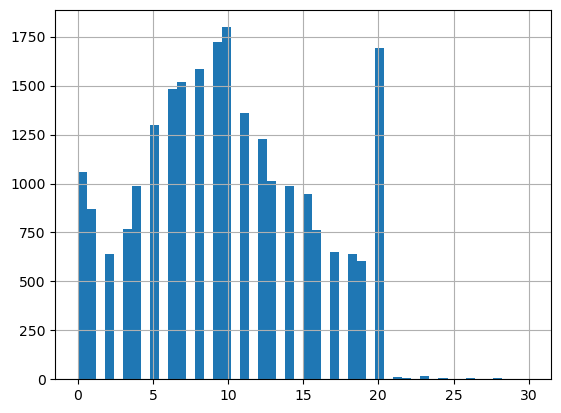

In [16]:
data['total_images'].hist(bins = 50, range = (0,30))
plt.show()

In [30]:
data.query('total_images == 0').head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.000,159.000,2015-07-24T00:00:00,3,NaN,14.000,NaN,9,NaN,...,NaN,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000
62,0,4800000.000,78.600,2017-09-17T00:00:00,3,2.800,9.000,48.800,5,NaN,...,11.900,2.000,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.000
88,0,1700000.000,33.100,2019-04-09T00:00:00,1,NaN,5.000,18.400,1,NaN,...,6.400,NaN,посёлок городского типа Лебяжье,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,0,3200000.000,32.000,2018-02-01T00:00:00,1,2.500,9.000,18.000,3,NaN,...,8.000,NaN,Санкт-Петербург,49587.000,16425.000,1.000,215.000,0.000,NaN,40.000
166,0,2300000.000,60.000,2017-12-02T00:00:00,2,NaN,3.000,NaN,1,NaN,...,NaN,NaN,посёлок Плодовое,NaN,NaN,NaN,NaN,NaN,NaN,45.000
169,0,6180000.000,85.000,2017-06-02T00:00:00,3,2.800,17.000,51.800,17,NaN,...,17.500,0.000,Санкт-Петербург,16057.000,14853.000,0.000,NaN,0.000,NaN,20.000
189,0,6150000.000,62.000,2017-10-13T00:00:00,3,NaN,9.000,41.500,5,NaN,...,8.500,2.000,Санкт-Петербург,41954.000,12168.000,1.000,10.000,0.000,NaN,45.000
212,0,10018000.000,82.000,2015-01-29T00:00:00,3,NaN,23.000,47.000,9,NaN,...,13.000,1.000,Санкт-Петербург,9655.000,13255.000,1.000,980.000,1.000,1093.000,543.000
235,0,4000000.000,60.000,2019-03-12T00:00:00,2,3.400,3.000,37.800,1,False,...,9.000,NaN,Колпино,25670.000,31456.000,3.000,370.000,3.000,534.000,45.000
256,0,5350000.000,65.600,2018-02-01T00:00:00,3,2.500,9.000,42.800,2,NaN,...,9.500,2.000,Санкт-Петербург,12975.000,15566.000,0.000,NaN,0.000,NaN,85.000


In [31]:
len(data.query('total_images == 0'))

1059

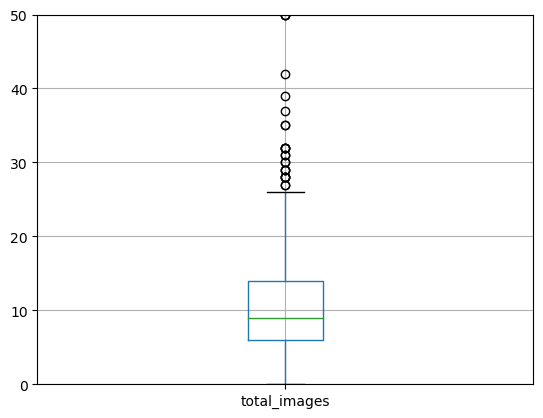

In [17]:
plt.ylim(0,50)
data.boxplot('total_images')
plt.show()

In [33]:
data.query('total_images >= 30')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
99,32,9600000.000,90.000,2017-09-26T00:00:00,4,NaN,5.000,67.000,2,NaN,...,8.000,NaN,Санкт-Петербург,23277.000,2818.000,0.000,NaN,0.000,NaN,104.000
308,35,5700000.000,83.900,2018-02-01T00:00:00,3,2.600,5.000,51.800,2,NaN,...,9.600,NaN,Красное Село,27245.000,30670.000,0.000,NaN,0.000,NaN,47.000
1058,39,1900000.000,63.000,2017-09-29T00:00:00,3,NaN,5.000,44.200,5,NaN,...,6.300,1.000,деревня Лопухинка,NaN,NaN,NaN,NaN,NaN,NaN,106.000
3455,30,3570000.000,38.300,2017-11-10T00:00:00,1,NaN,12.000,20.000,4,NaN,...,10.000,NaN,Санкт-Петербург,15606.000,14402.000,1.000,413.000,0.000,NaN,74.000
5349,31,11990000.000,92.500,2017-12-07T00:00:00,3,NaN,25.000,51.400,22,NaN,...,15.000,1.000,Санкт-Петербург,30546.000,11209.000,1.000,433.000,1.000,700.000,47.000
7393,32,8290000.000,113.200,2017-04-28T00:00:00,4,NaN,6.000,70.400,4,NaN,...,10.400,NaN,Санкт-Петербург,24177.000,2342.000,2.000,356.000,3.000,457.000,225.000
7938,32,17000000.000,150.000,2017-09-26T00:00:00,3,3.500,6.000,99.300,4,NaN,...,16.000,NaN,Санкт-Петербург,24980.000,3555.000,0.000,NaN,0.000,NaN,165.000
9778,50,11000000.000,87.000,2017-10-25T00:00:00,2,NaN,25.000,32.500,11,NaN,...,31.000,5.000,Санкт-Петербург,9586.000,11649.000,0.000,NaN,0.000,NaN,3.000
10523,35,17000000.000,90.000,2017-11-10T00:00:00,3,NaN,16.000,52.000,6,NaN,...,14.000,4.000,Санкт-Петербург,30215.000,6255.000,0.000,NaN,1.000,113.000,35.000
12667,50,20500000.000,76.000,2017-12-10T00:00:00,3,NaN,20.000,47.000,16,NaN,...,29.000,NaN,Санкт-Петербург,50812.000,16141.000,0.000,NaN,0.000,NaN,5.000


Максимальное число фотографий одной квартиры - 50 шт. В большинстве своем продавцы предпочитают оставлять либо 8-10 фотографий, либо 20. Второй пик в таблице на первый взгляд кажется странным, но в целом логичен - число 20 не аномально высокое, и может быть связано с тем, что продавцы хотят как можно быстрее продать свою квартиру за счет увеличения числа фото (чтобы не проводить персональную экскурсию по дому для всех желающих, например). Странно видеть более тысячи квартир без фотографий вообще, но если они продаются, то почему бы и не публиковать подобные объявления. Квартиры с 30+ фотографиями, судя по отсутствию пропусков в `days_exposition` были либо проданы, либо сняты с продажи. Искажений среди них также не наблюдается. <b> Аномальные значения в данном признаке отсутствуют. </b>

### `total_area`

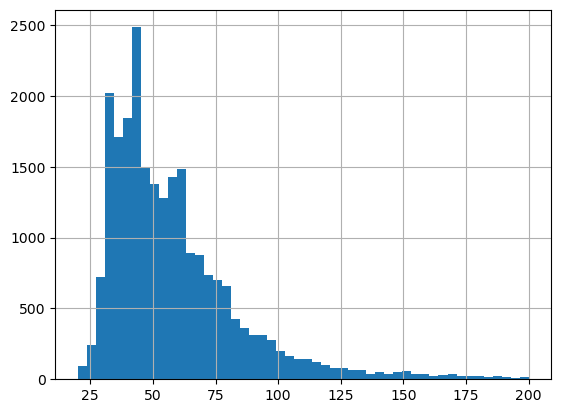

In [18]:
data['total_area'].hist(bins=50,range=(20,200))
plt.show()

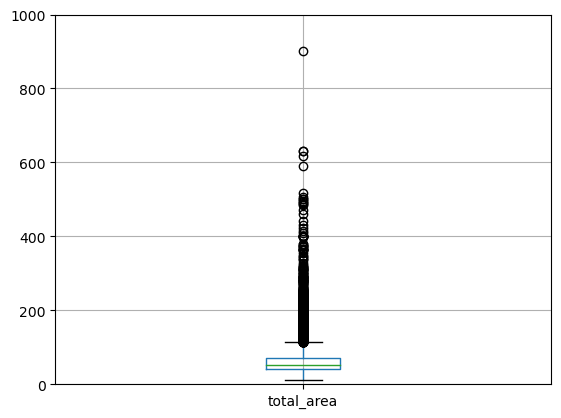

In [19]:
plt.ylim(0,1000)
data.boxplot('total_area')
plt.show()

In [36]:
data['total_area'].describe()

count   23699.000
mean       60.349
std        35.654
min        12.000
25%        40.000
50%        52.000
75%        69.900
max       900.000
Name: total_area, dtype: float64

На диаграмме размаха наиболее отчетливо видны выбивающиеся точки свыше 400. Пока возьмем за отрезок именно эти квартиры. 


In [25]:
data.query('total_area >= 400')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
660,3,49950000.0,483.90,2017-10-04,7,3.20,6.0,312.5,4,NaN,...,26.40,NaN,Санкт-Петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391.0
3117,19,140000000.0,631.00,2019-03-30,7,NaN,5.0,NaN,5,NaN,...,60.00,NaN,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
3676,12,28789000.0,441.98,2019-01-23,4,NaN,6.0,NaN,6,NaN,...,35.05,NaN,Санкт-Петербург,20552.0,5181.0,0.0,NaN,0.0,NaN,NaN
4237,1,50000000.0,517.00,2017-10-14,7,NaN,4.0,332.0,3,NaN,...,22.00,NaN,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN
5358,20,65000000.0,590.00,2019-02-14,15,3.50,6.0,409.0,3,NaN,...,100.00,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
5873,0,38000000.0,400.00,2019-03-15,7,3.60,3.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,24889.0,5457.0,1.0,271.0,0.0,NaN,NaN
5893,3,230000000.0,500.00,2017-05-31,6,NaN,7.0,NaN,7,NaN,...,40.00,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,50.0
6221,8,34000000.0,470.30,2018-01-14,4,NaN,3.0,248.7,3,NaN,...,40.00,NaN,Санкт-Петербург,43756.0,15459.0,1.0,852.0,3.0,122.0,179.0
6621,20,99000000.0,488.00,2017-04-09,5,2.95,20.0,216.0,17,NaN,...,50.00,NaN,Санкт-Петербург,27641.0,4598.0,1.0,646.0,1.0,368.0,351.0
8018,20,84000000.0,507.00,2015-12-17,5,4.45,7.0,301.5,7,True,...,45.50,1.0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078.0


 Кажется, что все эти квартиры реальны (высокая площадь, соответственно, высокая стоимость; все находятся в Санкт-Петербурге), и технических ошибок здесь нет (за исключением, возможно, строки 9826, где указана 1 комната площадью 494.1 кв.м.). Есть квартира площадью 900 кв.м., но и она, за исключением размеров, больше ничем не выделяется. Избавляться от нее смысла нет. Подозрительно, что в `days_exposition` много пропусков и высокие значения, но в целом это подтверждает, что такие большие и дорогие квартиры сложно продать. 

In [38]:
data.loc[9826] = None

In [39]:
data = data.dropna(subset=['total_area'])

In [40]:
data.query('total_area <= 25').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
114,5.000,4000000.000,21.400,2019-02-07T00:00:00,1.000,2.900,8.000,8.300,7.000,NaN,...,6.300,NaN,Санкт-Петербург,27089.000,5791.000,2.000,488.000,1.000,286.000,NaN
322,6.000,2000000.000,25.000,2017-02-07T00:00:00,1.000,NaN,5.000,NaN,5.000,False,...,NaN,0.000,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,45.000
349,4.000,2320000.000,25.000,2017-09-27T00:00:00,0.000,NaN,14.000,17.000,1.000,NaN,...,NaN,0.000,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.000
545,9.000,4700000.000,23.800,2018-12-28T00:00:00,1.000,NaN,18.000,20.000,9.000,NaN,...,5.000,NaN,Санкт-Петербург,9731.000,11849.000,0.000,NaN,0.000,NaN,108.000
546,0.000,6000001.000,25.000,2018-11-16T00:00:00,1.000,3.000,5.000,NaN,5.000,False,...,NaN,NaN,Санкт-Петербург,25169.000,3871.000,1.000,207.000,1.000,776.000,17.000
608,2.000,1850000.000,25.000,2019-02-20T00:00:00,0.000,NaN,10.000,NaN,7.000,NaN,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.000
697,12.000,2500000.000,24.100,2017-12-01T00:00:00,0.000,2.750,25.000,17.500,21.000,NaN,...,NaN,NaN,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.000
716,5.000,1500000.000,17.000,2017-06-07T00:00:00,0.000,2.700,9.000,12.000,1.000,NaN,...,NaN,0.000,посёлок Шушары,18654.000,29846.000,0.000,NaN,0.000,NaN,40.000
946,5.000,2200000.000,23.000,2016-09-27T00:00:00,0.000,NaN,27.000,18.000,7.000,NaN,...,NaN,2.000,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.000
1194,14.000,2520000.000,22.700,2018-08-31T00:00:00,1.000,NaN,14.000,13.500,5.000,NaN,...,NaN,NaN,Санкт-Петербург,22735.000,11907.000,1.000,1065.000,1.000,484.000,7.000


 Ситуация с небольшими (меньше 25 кв.м.) квартирами схожая - мало комнат, низкая цена, в большинстве своем низкие дома, продавались быстрее, чем большие квартиры. 

<b> Таким образом, всего одна аномалия обнаружена и устранена. Возможно, при предобработке других признаков будут найдены и другие некорректные значения.</b> 

### `first_day_exposition`

In [21]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

In [22]:
data['first_day_exposition'].head()

0    2019-03-07
1    2018-12-04
2    2015-08-20
3    2015-07-24
4    2018-06-19
5    2018-09-10
6    2017-11-02
7    2019-04-18
8    2018-05-23
9    2017-02-26
10   2017-11-16
11   2018-08-27
12   2016-06-30
13   2017-07-01
14   2016-06-23
15   2017-11-18
16   2017-11-23
17   2016-09-09
18   2017-01-27
19   2019-01-09
Name: first_day_exposition, dtype: datetime64[ns]

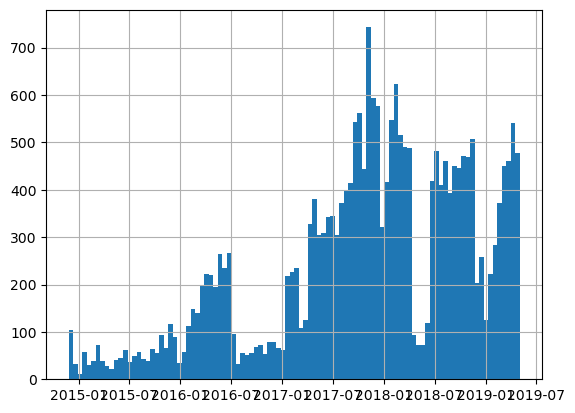

In [23]:
data['first_day_exposition'].hist(bins = 100)
plt.show()

In [44]:
data['first_day_exposition'].value_counts()

2018-02-01    368
2017-11-10    240
2017-10-13    124
2017-09-27    111
2018-03-26     97
             ... 
2015-05-17      1
2017-01-06      1
2016-12-30      1
2016-07-06      1
2015-03-27      1
Name: first_day_exposition, Length: 1491, dtype: int64

In [45]:
data.query('first_day_exposition >= 2018 and first_day_exposition <= 2019').sort_values('first_day_exposition')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2242,4.000,4229988.000,32.990,2018-01-01,1.000,2.570,22.000,16.550,4.000,False,...,9.170,NaN,Санкт-Петербург,35152.000,8335.000,0.000,NaN,2.000,211.000,252.000
5672,6.000,4103288.000,66.000,2018-01-01,2.000,NaN,19.000,NaN,13.000,NaN,...,NaN,NaN,поселок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,34.000
10399,2.000,3122000.000,62.440,2018-01-01,2.000,NaN,7.000,31.070,4.000,NaN,...,11.000,NaN,посёлок городского типа Сиверский,NaN,NaN,NaN,NaN,NaN,NaN,15.000
15414,5.000,5915000.000,62.910,2018-01-01,2.000,NaN,17.000,31.740,11.000,NaN,...,12.520,2.000,Санкт-Петербург,39180.000,16002.000,0.000,NaN,1.000,930.000,111.000
8708,9.000,3900000.000,42.400,2018-01-01,1.000,NaN,7.000,NaN,4.000,NaN,...,NaN,NaN,Сестрорецк,57846.000,34775.000,3.000,263.000,3.000,435.000,10.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21291,2.000,6850000.000,47.800,2019-01-01,2.000,2.700,3.000,22.450,2.000,NaN,...,11.330,NaN,Санкт-Петербург,44550.000,8760.000,1.000,413.000,0.000,NaN,NaN
22876,10.000,3062796.000,34.700,2019-01-01,1.000,NaN,3.000,16.900,3.000,NaN,...,9.300,NaN,деревня Мистолово,NaN,NaN,NaN,NaN,NaN,NaN,94.000
7442,7.000,777000.000,44.000,2019-01-01,2.000,2.500,2.000,30.000,2.000,NaN,...,8.000,1.000,деревня Ялгино,NaN,NaN,NaN,NaN,NaN,NaN,45.000
17494,1.000,3100000.000,51.000,2019-01-01,1.000,NaN,9.000,15.900,6.000,NaN,...,15.200,NaN,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'first_day_exposition' в целом кажется нормальным - вполне логично, что в 2018-2019 г. публиковалось больше объявлений, чем в 2015-2016 гг. (сервис становился популярнее, больше желающих купить жилье и т.д.). Однако при такой логике график должен был неуклонно разти вверх с течением времени, но просматриваются два падения - в 2018 и 2019. С чем это связано, пока неясно(возможно, некорректно введенные сведения либо временное падение спроса). При необходимости вернемся к этому при анализе данных.

<b> В `first_day_exposition` изменили тип данных на datetime, аномалий и пропусков не обнаружено. </b>

### `rooms`

In [46]:
data['rooms'].value_counts()

1.000     8046
2.000     7940
3.000     5814
4.000     1180
5.000      326
0.000      197
6.000      105
7.000       59
8.000       12
9.000        8
10.000       3
14.000       2
11.000       2
12.000       1
15.000       1
19.000       1
16.000       1
Name: rooms, dtype: int64

In [47]:
data['rooms'].describe()

count   23698.000
mean        2.071
std         1.078
min         0.000
25%         1.000
50%         2.000
75%         3.000
max        19.000
Name: rooms, dtype: float64

<AxesSubplot:>

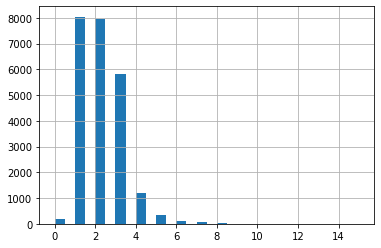

In [48]:
data['rooms'].hist(bins=30,range=(0,15))
plt.show()

<AxesSubplot:>

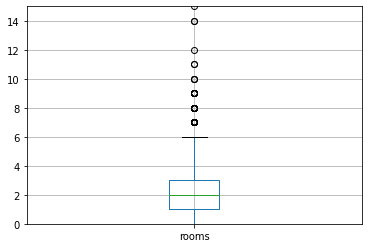

In [49]:
plt.ylim(0,15)
data.boxplot('rooms')
plt.show()

In [50]:
data.query('rooms == 0').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1.000,2450000.000,27.000,2017-03-30,0.000,NaN,24.000,15.500,2.000,NaN,...,NaN,2.000,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.000
349,4.000,2320000.000,25.000,2017-09-27,0.000,NaN,14.000,17.000,1.000,NaN,...,NaN,0.000,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.000
440,8.000,2480000.000,27.110,2018-03-12,0.000,NaN,17.000,24.750,4.000,NaN,...,NaN,2.000,Санкт-Петербург,38171.000,15015.000,0.000,NaN,2.000,982.000,64.000
508,0.000,3375000.000,34.400,2017-03-28,0.000,NaN,26.000,24.300,19.000,NaN,...,NaN,1.000,посёлок Парголово,53115.000,19292.000,0.000,NaN,1.000,593.000,430.000
608,2.000,1850000.000,25.000,2019-02-20,0.000,NaN,10.000,NaN,7.000,NaN,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.000
697,12.000,2500000.000,24.100,2017-12-01,0.000,2.750,25.000,17.500,21.000,NaN,...,NaN,NaN,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.000
716,5.000,1500000.000,17.000,2017-06-07,0.000,2.700,9.000,12.000,1.000,NaN,...,NaN,0.000,посёлок Шушары,18654.000,29846.000,0.000,NaN,0.000,NaN,40.000
780,9.000,2600000.000,26.100,2018-02-20,0.000,NaN,18.000,NaN,8.000,NaN,...,NaN,1.000,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.000
839,14.000,1900000.000,35.000,2017-04-14,0.000,2.700,5.000,15.000,3.000,False,...,NaN,1.000,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.000
946,5.000,2200000.000,23.000,2016-09-27,0.000,NaN,27.000,18.000,7.000,NaN,...,NaN,2.000,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.000


Бросается в глаза почти 200 квартир, где, судя по датафрейму, отсутствуют комнаты. Однако, это также может означать, что либо квартира является студией (и, к примеру, кухня совмещена с единственной жилой комнатой), либо в ней свободная планировка (например, по логике продавца это единое пространство без разделения на комнаты).

In [51]:
data.query('rooms == 0 and open_plan == False and studio == False')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Поскольку квартир с 0 комнат, без свободной планировки и не являющихся студией, нет, то оставляем все как есть. Искажения здесь отсутствуют. 

In [52]:
data.query('rooms > 6').sort_values(by='rooms',ascending=False).head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
14498,6.000,32250000.000,374.600,2018-06-09,19.000,NaN,5.000,264.500,2.000,NaN,...,27.600,NaN,Санкт-Петербург,19497.000,3574.000,0.000,NaN,2.000,548.000,114.000
18848,6.000,28500000.000,270.000,2015-03-02,16.000,3.000,4.000,180.000,4.000,NaN,...,13.000,1.000,Санкт-Петербург,23575.000,4142.000,1.000,516.000,0.000,NaN,1365.000
5358,20.000,65000000.000,590.000,2019-02-14,15.000,3.500,6.000,409.000,3.000,NaN,...,100.000,NaN,Санкт-Петербург,24447.000,4666.000,1.000,767.000,0.000,NaN,14.000
866,5.000,25000000.000,363.000,2017-12-23,14.000,3.160,5.000,222.000,4.000,NaN,...,16.600,NaN,Санкт-Петербург,38076.000,7950.000,0.000,NaN,2.000,435.000,418.000
20829,6.000,28659000.000,245.400,2016-03-31,14.000,NaN,4.000,168.300,2.000,NaN,...,25.900,0.000,Санкт-Петербург,21104.000,2054.000,3.000,541.000,2.000,118.000,95.000
19540,8.000,420000000.000,900.000,2017-12-06,12.000,2.800,25.000,409.700,25.000,NaN,...,112.000,NaN,Санкт-Петербург,30706.000,7877.000,0.000,NaN,2.000,318.000,106.000
9688,8.000,33000000.000,194.100,2017-02-07,11.000,3.430,5.000,129.000,2.000,NaN,...,11.900,NaN,Санкт-Петербург,21469.000,1015.000,1.000,686.000,2.000,66.000,813.000
648,3.000,17500000.000,183.700,2018-07-01,11.000,3.400,7.000,138.800,7.000,NaN,...,13.300,NaN,Санкт-Петербург,23606.000,3148.000,0.000,NaN,0.000,NaN,NaN
4149,6.000,23000000.000,272.600,2018-01-11,10.000,3.140,7.000,145.900,7.000,NaN,...,18.800,1.000,Санкт-Петербург,10726.000,12169.000,1.000,191.000,1.000,531.000,NaN
18119,4.000,15500000.000,216.100,2016-07-04,10.000,3.150,5.000,161.400,2.000,NaN,...,19.800,0.000,Санкт-Петербург,24353.000,4921.000,1.000,368.000,0.000,NaN,11.000


In [53]:
len(data.query('rooms > 6'))

90

In [54]:
data.groupby('rooms')['total_area'].median()

rooms
0.000     26.050
1.000     36.530
2.000     53.000
3.000     73.000
4.000     99.300
5.000    146.450
6.000    184.300
7.000    214.000
8.000    235.700
9.000    300.950
10.000   272.600
11.000   188.900
12.000   900.000
14.000   304.200
15.000   590.000
16.000   270.000
19.000   374.600
Name: total_area, dtype: float64

Теперь берем квартиры, где, наоборот, много комнат. Согласно диаграмме размаха, аномалии могут начинаться с 6+ комнат. Судя по медианному значению, 6-комнатная квартира это около 200 кв.м. Соответственно, квартиры, имеющие от 6 комнат и площадью менее 200 кв.м., вызывают подозрение.

In [55]:
data.query('rooms > 6 and total_area < 200')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
648,3.000,17500000.000,183.700,2018-07-01,11.000,3.400,7.000,138.800,7.000,NaN,...,13.300,NaN,Санкт-Петербург,23606.000,3148.000,0.000,NaN,0.000,NaN,NaN
750,9.000,29500000.000,188.800,2017-03-04,7.000,2.700,2.000,119.300,1.000,NaN,...,10.200,0.000,Санкт-Петербург,20965.000,814.000,0.000,NaN,2.000,267.000,246.000
855,18.000,15000000.000,134.000,2017-10-27,7.000,NaN,4.000,88.000,3.000,NaN,...,12.000,NaN,Санкт-Петербург,22670.000,3936.000,1.000,803.000,1.000,387.000,150.000
1813,0.000,15000000.000,179.000,2017-04-09,7.000,NaN,5.000,126.400,5.000,NaN,...,20.900,0.000,Санкт-Петербург,20070.000,3186.000,1.000,104.000,1.000,803.000,15.000
1943,20.000,16000000.000,184.400,2018-10-21,7.000,NaN,6.000,125.700,5.000,NaN,...,23.100,NaN,Санкт-Петербург,23382.000,2923.000,1.000,525.000,1.000,791.000,109.000
2039,3.000,13520000.000,162.800,2018-03-21,7.000,3.000,4.000,121.600,4.000,NaN,...,15.900,NaN,Санкт-Петербург,20631.000,1899.000,3.000,360.000,3.000,153.000,NaN
2261,15.000,17800000.000,164.000,2019-02-12,7.000,NaN,7.000,125.900,7.000,NaN,...,12.000,NaN,Санкт-Петербург,20139.000,2670.000,2.000,41.000,3.000,397.000,NaN
3365,13.000,22190000.000,197.000,2017-11-20,7.000,2.900,6.000,107.600,1.000,NaN,...,5.000,NaN,Санкт-Петербург,21583.000,1211.000,1.000,437.000,2.000,22.000,130.000
3545,6.000,13700000.000,154.400,2017-02-02,7.000,3.700,5.000,117.400,5.000,NaN,...,17.400,NaN,Санкт-Петербург,25881.000,4456.000,1.000,480.000,0.000,NaN,727.000
4159,8.000,17500000.000,146.300,2017-11-08,7.000,3.300,4.000,108.000,3.000,NaN,...,9.000,NaN,Санкт-Петербург,22665.000,3607.000,0.000,NaN,0.000,NaN,NaN


In [56]:
data.query('rooms == 6 and total_area < 200')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
52,20.000,11795000.000,136.000,2017-09-22,6.000,3.000,2.000,94.000,2.000,NaN,...,11.000,1.000,Санкт-Петербург,16510.000,6582.000,1.000,526.000,0.000,NaN,NaN
201,5.000,10880000.000,123.100,2015-11-12,6.000,3.200,5.000,89.000,2.000,NaN,...,11.000,NaN,Санкт-Петербург,26009.000,3369.000,2.000,516.000,0.000,NaN,992.000
807,14.000,18777000.000,181.500,2018-07-25,6.000,3.600,6.000,125.100,4.000,NaN,...,16.900,NaN,Санкт-Петербург,24376.000,4639.000,0.000,NaN,1.000,397.000,204.000
2017,1.000,9100000.000,111.000,2017-07-04,6.000,2.750,3.000,84.500,3.000,NaN,...,10.200,0.000,Санкт-Петербург,21984.000,1902.000,2.000,588.000,1.000,54.000,61.000
2139,8.000,12590000.000,140.900,2019-04-12,6.000,3.000,5.000,104.100,3.000,NaN,...,11.900,NaN,Санкт-Петербург,22481.000,2733.000,2.000,332.000,3.000,50.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22904,4.000,19500000.000,190.000,2017-04-27,6.000,NaN,4.000,159.600,3.000,NaN,...,21.000,0.000,Санкт-Петербург,20965.000,814.000,0.000,NaN,2.000,267.000,87.000
23047,11.000,10500000.000,110.000,2018-06-30,6.000,3.200,7.000,75.000,6.000,NaN,...,11.000,NaN,Санкт-Петербург,22632.000,4418.000,0.000,NaN,0.000,NaN,NaN
23094,13.000,12500000.000,155.800,2019-03-21,6.000,3.200,5.000,108.800,4.000,NaN,...,15.300,NaN,Санкт-Петербург,20414.000,4769.000,1.000,444.000,2.000,429.000,NaN
23395,4.000,40000000.000,188.000,2017-05-29,6.000,NaN,6.000,109.510,4.000,NaN,...,31.300,0.000,Санкт-Петербург,23390.000,2254.000,2.000,425.000,1.000,62.000,30.000


6-комнатных квартир с площадью менее 200 кв.м. уже гораздо больше, чем квартир того же размера, но с большим числом помещений. Соответственно, от них мы можем избавиться.

In [57]:
data.loc[(data['rooms'] > 6) & (data['total_area'] < 200)] = None

In [58]:
data = data.dropna(subset=['rooms'])

<b> Таким образом, избавились от относительно небольших квартир с аномально высоким числом комнат. </b>

### `ceiling_height`

In [59]:
data['ceiling_height'].describe()

count   14486.000
mean        2.771
std         1.262
min         1.000
25%         2.512
50%         2.650
75%         2.800
max       100.000
Name: ceiling_height, dtype: float64

In [60]:
data[data['ceiling_height'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7.000,3350000.000,40.400,2018-12-04,1.000,NaN,11.000,18.600,1.000,NaN,...,11.000,2.000,посёлок Шушары,12817.000,18603.000,0.000,NaN,0.000,NaN,81.000
2,10.000,5196000.000,56.000,2015-08-20,2.000,NaN,5.000,34.300,4.000,NaN,...,8.300,0.000,Санкт-Петербург,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000
3,0.000,64900000.000,159.000,2015-07-24,3.000,NaN,14.000,NaN,9.000,NaN,...,NaN,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000
5,10.000,2890000.000,30.400,2018-09-10,1.000,NaN,12.000,14.400,5.000,NaN,...,9.100,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.000
6,6.000,3700000.000,37.300,2017-11-02,1.000,NaN,26.000,10.600,6.000,NaN,...,14.400,1.000,посёлок Парголово,52996.000,19143.000,0.000,NaN,0.000,NaN,155.000
7,5.000,7915000.000,71.600,2019-04-18,2.000,NaN,24.000,NaN,22.000,NaN,...,18.900,2.000,Санкт-Петербург,23982.000,11634.000,0.000,NaN,0.000,NaN,NaN
8,20.000,2900000.000,33.160,2018-05-23,1.000,NaN,27.000,15.430,26.000,NaN,...,8.810,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.000
11,9.000,3300000.000,44.000,2018-08-27,2.000,NaN,5.000,31.000,4.000,False,...,6.000,1.000,Ломоносов,48252.000,51677.000,0.000,NaN,0.000,NaN,7.000
12,10.000,3890000.000,54.000,2016-06-30,2.000,NaN,5.000,30.000,5.000,NaN,...,9.000,0.000,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.000
14,1.000,4400000.000,36.000,2016-06-23,1.000,NaN,6.000,17.000,1.000,NaN,...,8.000,0.000,Пушкин,20782.000,30759.000,0.000,NaN,1.000,96.000,203.000


In [61]:
data.groupby('locality_name')['ceiling_height'].median().head(30)

locality_name
Бокситогорск    3.900
Волосово        2.500
Волхов          2.580
Всеволожск      2.700
Выборг          2.550
Высоцк          2.500
Гатчина         2.550
Зеленогорск     2.550
Ивангород       2.520
Каменногорск    2.600
Кингисепп       2.500
Кириши          2.500
Кировск         2.500
Колпино         2.500
Коммунар        2.560
Красное Село    2.600
Кронштадт       2.550
Кудрово         2.730
Лодейное Поле   2.550
Ломоносов       2.550
Луга            2.500
Любань          2.500
Мурино          2.700
Никольское      2.560
Новая Ладога    2.500
Отрадное        2.550
Павловск        2.600
Петергоф        2.550
Пикалёво        2.600
Подпорожье      2.550
Name: ceiling_height, dtype: float64

Данные в `ceiling_height` (высота потолков) могут быть пропущены в связи с человеческим фактором (например, владельцы квартир не указывали данную информацию, т.к. не считали ее важной). Взаимосвязи между квартирами, где пропущены сведения, не просматривается(судя по первым 20 строкам, высота потолков не указана и в небольших квартирах в 5-этажных домах, и в высоких новостройках). Можем заполнить пропуски медианным значением по населенному пункту, однако их значения недалеки от медианного значения всего признака `locality_name` (2.65 м.). Поэтому, как представляется, можем просто заполнить пропуски медианой, но прежде проверить сведения на аномалии. 

<AxesSubplot:>

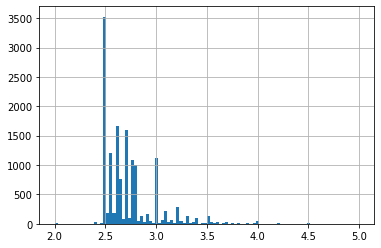

In [62]:
data['ceiling_height'].hist(bins=100, range=(2,5))
plt.show()

<AxesSubplot:>

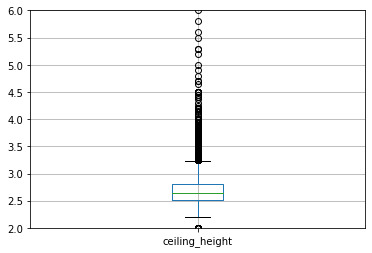

In [63]:
plt.ylim(2,6)
data.boxplot('ceiling_height')
plt.show()

In [64]:
data['ceiling_height'].value_counts()

2.500    3515
2.600    1646
2.700    1573
3.000    1109
2.800     993
         ... 
5.800       1
4.300       1
1.000       1
2.340       1
4.650       1
Name: ceiling_height, Length: 181, dtype: int64

In [65]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

В признаке есть сведения о неправдоподобно высоких потолках (например, 100 м), что явно неправильно и может указывать на техническую ошибку при внесении данных. Выведем сведения о квартирах, где высота потолков больше 4 метров. 

In [66]:
data[data['ceiling_height']>4]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
154,1.000,8200000.000,80.000,2018-11-06,3.000,4.150,3.000,44.200,2.000,NaN,...,12.200,NaN,Санкт-Петербург,20562.000,3167.000,2.000,344.000,1.000,838.000,38.000
355,17.000,3600000.000,55.200,2018-07-12,2.000,25.000,5.000,32.000,2.000,False,...,NaN,2.000,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.000
464,15.000,66571000.000,280.300,2015-06-11,6.000,5.200,8.000,159.500,7.000,NaN,...,21.100,0.000,Санкт-Петербург,26316.000,6655.000,3.000,187.000,1.000,616.000,578.000
1026,20.000,155000000.000,310.000,2018-10-12,5.000,5.300,3.000,190.000,3.000,NaN,...,63.000,2.000,Санкт-Петербург,24899.000,4785.000,0.000,NaN,1.000,603.000,NaN
1053,13.000,550000.000,29.000,2018-02-01,1.000,5.000,3.000,NaN,1.000,False,...,NaN,NaN,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,6.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22309,20.000,5300000.000,45.000,2017-09-30,1.000,10.300,16.000,15.500,15.000,NaN,...,NaN,NaN,Санкт-Петербург,36353.000,11936.000,2.000,440.000,2.000,450.000,136.000
22336,19.000,9999000.000,92.400,2019-04-05,2.000,32.000,6.000,55.500,5.000,False,...,16.500,4.000,Санкт-Петербург,18838.000,3506.000,0.000,NaN,3.000,511.000,NaN
22494,7.000,91075000.000,491.000,2017-05-27,5.000,4.200,9.000,274.000,9.000,NaN,...,45.000,0.000,Санкт-Петербург,25525.000,5845.000,2.000,116.000,0.000,NaN,115.000
22869,0.000,15000000.000,25.000,2018-07-25,1.000,100.000,5.000,14.000,5.000,True,...,11.000,5.000,Санкт-Петербург,34963.000,8283.000,1.000,223.000,3.000,30.000,19.000


Всего - 75 строк, причем квартира с высотой потолка 5.3 метра (строка 1026) кажется еще вполне реалистичной (общая площадь - 310 кв.м., стоимость  155 млн.). Поэтому рассмотрим квартиры, где потолки будут выше. 

In [67]:
data[data['ceiling_height']>5.3].sort_values(by='ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
7578,17.000,38000000.000,143.000,2017-11-02,3.000,5.500,5.000,83.000,5.000,NaN,...,29.000,1.000,Санкт-Петербург,26333.000,6448.000,3.000,479.000,0.000,NaN,NaN
1388,20.000,59800000.000,399.000,2015-01-21,5.000,5.600,6.000,NaN,6.000,NaN,...,NaN,0.000,Санкт-Петербург,26204.000,6934.000,2.000,149.000,2.000,577.000,719.000
21227,0.000,8200000.000,71.000,2017-07-21,0.000,5.800,5.000,68.000,5.000,NaN,...,NaN,0.000,Санкт-Петербург,20170.000,1261.000,2.000,295.000,3.000,366.000,30.000
20264,17.000,119000000.000,187.600,2017-07-10,4.000,6.000,7.000,147.000,7.000,NaN,...,15.600,NaN,Санкт-Петербург,26902.000,5605.000,3.000,484.000,1.000,305.000,259.000
3474,3.000,1400000.000,30.000,2018-03-16,1.000,8.000,5.000,15.300,2.000,False,...,7.300,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.000
17442,0.000,5350000.000,54.000,2015-06-16,2.000,8.000,5.000,29.000,2.000,NaN,...,NaN,1.000,Красное Село,24638.000,28062.000,0.000,NaN,0.000,NaN,469.000
15743,14.000,5600000.000,67.000,2016-11-11,3.000,8.000,16.000,41.000,1.000,NaN,...,8.000,NaN,Санкт-Петербург,32691.000,11035.000,1.000,723.000,0.000,NaN,474.000
5863,20.000,5650000.000,45.000,2018-08-15,1.000,8.300,16.000,19.300,14.000,NaN,...,8.300,1.000,Санкт-Петербург,13069.000,10763.000,0.000,NaN,1.000,613.000,14.000
22309,20.000,5300000.000,45.000,2017-09-30,1.000,10.300,16.000,15.500,15.000,NaN,...,NaN,NaN,Санкт-Петербург,36353.000,11936.000,2.000,440.000,2.000,450.000,136.000
15061,19.000,5600000.000,56.400,2018-05-11,2.000,14.000,14.000,32.400,5.000,NaN,...,9.100,2.000,Санкт-Петербург,14814.000,13610.000,0.000,NaN,0.000,NaN,315.000


Квартиры с высотой потолков вплоть до 6 метров кажутся реальными(высокая стоимость, большая площадь). Все что больше - явно искажено. Можем эти сведения удалить, однако это будет слишком просто - в данные вполне могла закрасться ошибка, и потолки на самом деле высотой не 27 метров, например, а 2.7 м., что близко к нашей медиане. Поэтому попробуем всем квартирам с высотой потолков от 22.6 м. до 32 м. включительно вернуть их "реальную" высоту. 

In [68]:
data.loc[(data['ceiling_height'] > 22) & (data['ceiling_height'] <= 32), 'ceiling_height'] /= 10

In [69]:
data[data['ceiling_height']>5.3].sort_values(by='ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
7578,17.000,38000000.000,143.000,2017-11-02,3.000,5.500,5.000,83.000,5.000,NaN,...,29.000,1.000,Санкт-Петербург,26333.000,6448.000,3.000,479.000,0.000,NaN,NaN
1388,20.000,59800000.000,399.000,2015-01-21,5.000,5.600,6.000,NaN,6.000,NaN,...,NaN,0.000,Санкт-Петербург,26204.000,6934.000,2.000,149.000,2.000,577.000,719.000
21227,0.000,8200000.000,71.000,2017-07-21,0.000,5.800,5.000,68.000,5.000,NaN,...,NaN,0.000,Санкт-Петербург,20170.000,1261.000,2.000,295.000,3.000,366.000,30.000
20264,17.000,119000000.000,187.600,2017-07-10,4.000,6.000,7.000,147.000,7.000,NaN,...,15.600,NaN,Санкт-Петербург,26902.000,5605.000,3.000,484.000,1.000,305.000,259.000
3474,3.000,1400000.000,30.000,2018-03-16,1.000,8.000,5.000,15.300,2.000,False,...,7.300,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.000
15743,14.000,5600000.000,67.000,2016-11-11,3.000,8.000,16.000,41.000,1.000,NaN,...,8.000,NaN,Санкт-Петербург,32691.000,11035.000,1.000,723.000,0.000,NaN,474.000
17442,0.000,5350000.000,54.000,2015-06-16,2.000,8.000,5.000,29.000,2.000,NaN,...,NaN,1.000,Красное Село,24638.000,28062.000,0.000,NaN,0.000,NaN,469.000
5863,20.000,5650000.000,45.000,2018-08-15,1.000,8.300,16.000,19.300,14.000,NaN,...,8.300,1.000,Санкт-Петербург,13069.000,10763.000,0.000,NaN,1.000,613.000,14.000
22309,20.000,5300000.000,45.000,2017-09-30,1.000,10.300,16.000,15.500,15.000,NaN,...,NaN,NaN,Санкт-Петербург,36353.000,11936.000,2.000,440.000,2.000,450.000,136.000
15061,19.000,5600000.000,56.400,2018-05-11,2.000,14.000,14.000,32.400,5.000,NaN,...,9.100,2.000,Санкт-Петербург,14814.000,13610.000,0.000,NaN,0.000,NaN,315.000


А с другими значениями, где явно так просто исправить строки с неккоректной высотой потолков не получится - можем удалить. 

In [70]:
data.loc[data['ceiling_height'] > 6] = None

In [71]:
data[data['ceiling_height']>5.3]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1388,20.000,59800000.000,399.000,2015-01-21,5.000,5.600,6.000,NaN,6.000,NaN,...,NaN,0.000,Санкт-Петербург,26204.000,6934.000,2.000,149.000,2.000,577.000,719.000
7578,17.000,38000000.000,143.000,2017-11-02,3.000,5.500,5.000,83.000,5.000,NaN,...,29.000,1.000,Санкт-Петербург,26333.000,6448.000,3.000,479.000,0.000,NaN,NaN
20264,17.000,119000000.000,187.600,2017-07-10,4.000,6.000,7.000,147.000,7.000,NaN,...,15.600,NaN,Санкт-Петербург,26902.000,5605.000,3.000,484.000,1.000,305.000,259.000
21227,0.000,8200000.000,71.000,2017-07-21,0.000,5.800,5.000,68.000,5.000,NaN,...,NaN,0.000,Санкт-Петербург,20170.000,1261.000,2.000,295.000,3.000,366.000,30.000


Кажется странной строка 21227 (стоимость и общая площадь небольшие относительно других квартир), однако в целом можем оставить и ее (допустим, это было дизайнерским решением). В любом случае, на анализ она повлиять не сможет. 

In [72]:
data['ceiling_height'].describe()

count   14478.000
mean        2.726
std         0.279
min         1.000
25%         2.510
50%         2.650
75%         2.800
max         6.000
Name: ceiling_height, dtype: float64

Судя по данным, минимальное значение высоты потолков - 1 метр, что также не может быть правдой. Минимально разрешенная высота потолков в новых домах в России - 2.4 метра. 

In [73]:
data[data['ceiling_height']<2.4]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
227,13.000,2200000.000,47.000,2018-01-12,3.000,2.340,5.000,NaN,1.000,NaN,...,NaN,NaN,посёлок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,45.000
552,11.000,2999000.000,33.500,2017-03-30,1.000,2.000,15.000,17.500,6.000,NaN,...,6.500,NaN,Санкт-Петербург,33972.000,11746.000,1.000,520.000,1.000,949.000,270.000
1582,4.000,4100000.000,45.600,2016-01-13,2.000,2.300,9.000,28.400,8.000,False,...,7.000,2.000,Санкт-Петербург,49152.000,14977.000,1.000,489.000,1.000,525.000,329.000
2572,4.000,2400000.000,62.000,2018-12-27,3.000,2.000,5.000,40.000,4.000,NaN,...,6.000,1.000,Луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4212,1.000,2120000.000,35.430,2017-12-18,1.000,2.000,18.000,16.600,9.000,NaN,...,8.800,2.000,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,36.000
5498,17.000,2200000.000,56.000,2018-04-02,2.000,2.300,5.000,45.000,1.000,NaN,...,9.000,2.000,Сясьстрой,NaN,NaN,NaN,NaN,NaN,NaN,55.000
5712,5.000,1500000.000,42.800,2017-08-14,2.000,1.200,2.000,27.500,1.000,NaN,...,5.200,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.000
5850,9.000,1650000.000,35.500,2018-05-29,1.000,2.000,5.000,NaN,5.000,NaN,...,NaN,NaN,Луга,NaN,NaN,NaN,NaN,NaN,NaN,100.000
11352,4.000,3300000.000,36.000,2017-06-18,1.000,2.000,17.000,15.200,12.000,NaN,...,10.100,0.000,посёлок Металлострой,25268.000,26980.000,0.000,NaN,0.000,NaN,53.000
12755,2.000,1400000.000,22.500,2017-09-21,1.000,2.200,2.000,18.000,2.000,NaN,...,4.500,1.000,село Копорье,NaN,NaN,NaN,NaN,NaN,NaN,45.000


Допустим, потолки высотой до 2 метров реальны (например, в домах советской постройки либо владельцы по какой-то причине самостоятельно при ремонте "занизили" высоту потолка), но ниже - явные выбросы. Избавимся и от них. 

In [74]:
data.loc[data['ceiling_height'] < 2] = None

In [75]:
data = data.dropna(subset=['first_day_exposition'])

In [76]:
data[data['ceiling_height']<2.4]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
227,13.000,2200000.000,47.000,2018-01-12,3.000,2.340,5.000,NaN,1.000,NaN,...,NaN,NaN,посёлок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,45.000
552,11.000,2999000.000,33.500,2017-03-30,1.000,2.000,15.000,17.500,6.000,NaN,...,6.500,NaN,Санкт-Петербург,33972.000,11746.000,1.000,520.000,1.000,949.000,270.000
1582,4.000,4100000.000,45.600,2016-01-13,2.000,2.300,9.000,28.400,8.000,False,...,7.000,2.000,Санкт-Петербург,49152.000,14977.000,1.000,489.000,1.000,525.000,329.000
2572,4.000,2400000.000,62.000,2018-12-27,3.000,2.000,5.000,40.000,4.000,NaN,...,6.000,1.000,Луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4212,1.000,2120000.000,35.430,2017-12-18,1.000,2.000,18.000,16.600,9.000,NaN,...,8.800,2.000,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,36.000
5498,17.000,2200000.000,56.000,2018-04-02,2.000,2.300,5.000,45.000,1.000,NaN,...,9.000,2.000,Сясьстрой,NaN,NaN,NaN,NaN,NaN,NaN,55.000
5850,9.000,1650000.000,35.500,2018-05-29,1.000,2.000,5.000,NaN,5.000,NaN,...,NaN,NaN,Луга,NaN,NaN,NaN,NaN,NaN,NaN,100.000
11352,4.000,3300000.000,36.000,2017-06-18,1.000,2.000,17.000,15.200,12.000,NaN,...,10.100,0.000,посёлок Металлострой,25268.000,26980.000,0.000,NaN,0.000,NaN,53.000
12755,2.000,1400000.000,22.500,2017-09-21,1.000,2.200,2.000,18.000,2.000,NaN,...,4.500,1.000,село Копорье,NaN,NaN,NaN,NaN,NaN,NaN,45.000
16446,6.000,12300000.000,88.300,2019-03-12,3.000,2.000,5.000,63.900,2.000,NaN,...,12.000,NaN,Санкт-Петербург,38415.000,7675.000,1.000,568.000,1.000,154.000,NaN


In [77]:
data['ceiling_height'].describe()

count   14475.000
mean        2.726
std         0.278
min         2.000
25%         2.510
50%         2.650
75%         2.800
max         6.000
Name: ceiling_height, dtype: float64

Теперь пропущенные значения вполне можем заполнить медианой (2.65 метров, вполне "реалистично"). 

In [78]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [79]:
data['ceiling_height'].describe()

count   23663.000
mean        2.697
std         0.221
min         2.000
25%         2.600
50%         2.650
75%         2.700
max         6.000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

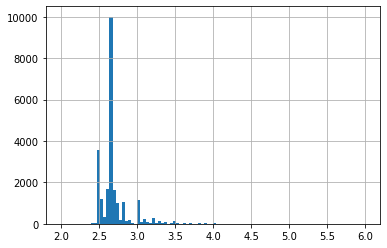

In [80]:
data['ceiling_height'].hist(bins=100, range=(2,6))
plt.show()

<b> Таким образом, высота потолков установлена от 2 до 6 метров, пропуски исправлены на медианное значение (2.65 метров), выбросы удалены. </b>

###  `floors_total`

In [81]:
data[data['floors_total'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12.000,11640000.000,65.200,2018-10-02,2.000,2.650,NaN,30.800,4.000,NaN,...,12.000,NaN,Санкт-Петербург,39197.000,12373.000,1.000,123.000,0.000,NaN,49.000
237,4.000,2438033.000,28.100,2016-11-23,1.000,2.650,NaN,20.750,1.000,NaN,...,NaN,0.000,Санкт-Петербург,22041.000,17369.000,0.000,NaN,1.000,374.000,251.000
457,4.000,9788348.000,70.800,2015-08-01,2.000,2.650,NaN,38.400,12.000,NaN,...,10.630,0.000,Санкт-Петербург,37364.000,8322.000,2.000,309.000,2.000,706.000,727.000
671,4.000,6051191.000,93.600,2017-04-06,3.000,2.650,NaN,47.100,8.000,NaN,...,16.800,0.000,Санкт-Петербург,22041.000,17369.000,0.000,NaN,1.000,374.000,123.000
1757,5.000,3600000.000,39.000,2017-04-22,1.000,2.650,NaN,NaN,9.000,NaN,...,NaN,0.000,Санкт-Петербург,22735.000,11618.000,1.000,835.000,1.000,652.000,77.000
1930,1.000,9750000.000,66.770,2016-05-13,2.000,2.650,NaN,NaN,4.000,NaN,...,NaN,0.000,Санкт-Петербург,39886.000,10660.000,1.000,2276.000,3.000,244.000,90.000
2392,7.000,5395770.000,53.000,2017-06-29,2.000,2.650,NaN,29.000,22.000,NaN,...,9.000,0.000,Санкт-Петербург,43074.000,10820.000,0.000,NaN,0.000,NaN,48.000
2846,4.000,2325000.000,27.800,2016-09-21,1.000,2.650,NaN,19.400,15.000,NaN,...,NaN,0.000,Санкт-Петербург,22041.000,17369.000,0.000,NaN,1.000,374.000,307.000
2952,10.000,6500000.000,54.300,2019-04-23,1.000,2.650,NaN,22.200,6.000,NaN,...,12.300,NaN,Санкт-Петербург,23606.000,3148.000,0.000,NaN,0.000,NaN,NaN
3031,9.000,6400000.000,56.700,2018-03-27,2.000,2.650,NaN,32.000,12.000,NaN,...,12.000,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.000


In [82]:
data['floors_total'].describe()

count   23577.000
mean       10.678
std         6.596
min         1.000
25%         5.000
50%         9.000
75%        16.000
max        60.000
Name: floors_total, dtype: float64

Переходим к следующему признаку, где были пропущены значения - `floors_total` (общее число этажей в доме). Бросается в глаза, что высота потолков во всех этих квартирах равна медианной (что означает, эти сведения ранее отсутствовали). При этом высок разброс этажей, где находятся квартиры (есть и 1й, и 22й).

In [83]:
data['floors_total'].isna().sum()

86

In [84]:
print(data['floors_total'].isna().sum() / len(data['floors_total']))

0.003634365887672738


Какой-либо взаимосвязи между числом этажей в доме и другими признаками не прослеживается. Единственный вывод - значения в `floors_total` не могут быть ниже, чем в `floor`. Медианой пропуски тоже не заменить. Всего пропущено 86 сведений - 0.3% от общего числа, выборка слишком незначительная. Однако данные в `floors_total` могут пригодиться в дальнейшем при определении, на каком этаже находится квартира (первом, последнем или другом). Поэтому от строк с пропусками мы вполне можем избавиться. Осталось проверить значения на аномалии. 

<AxesSubplot:>

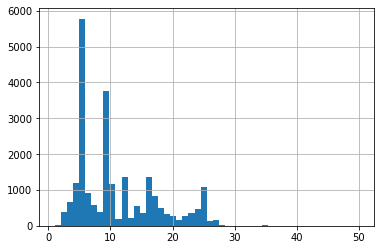

In [85]:
data['floors_total'].hist(bins=50, range=(1,50))
plt.show()

<AxesSubplot:>

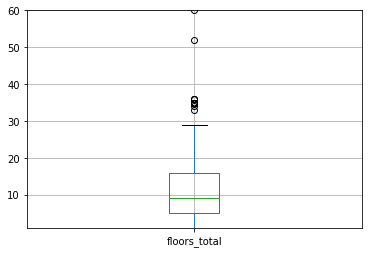

In [86]:
plt.ylim(1,60)
data.boxplot('floors_total')
plt.show()

In [87]:
data.query('floors_total > 25').value_counts('floors_total')

floors_total
27.000    164
26.000    124
35.000     24
28.000     21
36.000      3
29.000      1
33.000      1
34.000      1
52.000      1
60.000      1
dtype: int64

In [88]:
data.query('floors_total > 28')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
397,15.000,5990000.000,54.000,2018-03-22,2.000,2.650,36.000,21.400,28.000,NaN,...,18.700,1.000,Санкт-Петербург,18732.000,20444.000,0.000,NaN,3.000,80.000,11.000
871,14.000,7777777.000,75.000,2017-11-16,2.000,2.650,35.000,40.500,23.000,NaN,...,11.700,NaN,Санкт-Петербург,18732.000,20444.000,0.000,NaN,3.000,80.000,169.000
1060,10.000,5200000.000,50.000,2015-11-06,2.000,2.650,35.000,39.000,15.000,False,...,20.500,2.000,Санкт-Петербург,18732.000,20444.000,0.000,NaN,3.000,80.000,281.000
1697,11.000,3550000.000,28.000,2018-02-08,1.000,2.650,34.000,18.000,23.000,NaN,...,NaN,NaN,Санкт-Петербург,18732.000,20444.000,0.000,NaN,3.000,80.000,410.000
1917,13.000,10150000.000,74.000,2017-11-17,2.000,2.800,35.000,34.400,30.000,NaN,...,13.000,NaN,Санкт-Петербург,18732.000,20444.000,0.000,NaN,3.000,80.000,NaN
2253,12.000,3800000.000,45.500,2018-06-28,2.000,2.880,60.000,27.400,4.000,NaN,...,7.400,NaN,Кронштадт,67763.000,49488.000,2.000,342.000,3.000,614.000,166.000
2966,9.000,4300000.000,37.000,2017-08-08,1.000,2.650,35.000,14.000,15.000,NaN,...,10.400,0.000,Санкт-Петербург,18732.000,20444.000,0.000,NaN,3.000,80.000,50.000
3797,10.000,4100000.000,43.200,2018-09-24,1.000,2.600,29.000,14.350,18.000,NaN,...,14.400,2.000,посёлок Парголово,53734.000,19942.000,0.000,NaN,0.000,NaN,45.000
4855,12.000,5500000.000,50.000,2017-06-22,1.000,2.800,35.000,22.000,4.000,NaN,...,13.000,NaN,Санкт-Петербург,18627.000,20339.000,1.000,609.000,3.000,145.000,537.000
5749,20.000,3590000.000,25.000,2017-08-30,0.000,2.800,35.000,NaN,26.000,NaN,...,NaN,2.000,Санкт-Петербург,18732.000,20444.000,0.000,NaN,3.000,80.000,198.000


In [89]:
data.query('floors_total <= 1')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3076,20.000,2000000.000,80.000,2018-01-03,3.000,2.650,1.000,48.500,1.000,NaN,...,10.000,NaN,Волосово,NaN,NaN,NaN,NaN,NaN,NaN,44.000
4379,5.000,5300000.000,58.500,2017-11-15,2.000,2.650,1.000,31.600,1.000,NaN,...,9.400,NaN,поселок городского типа Рощино,NaN,NaN,NaN,NaN,NaN,NaN,226.000
5300,5.000,2990000.000,60.000,2018-11-15,3.000,2.650,1.000,50.000,1.000,NaN,...,10.000,NaN,поселок станции Вещево,NaN,NaN,NaN,NaN,NaN,NaN,40.000
5698,7.000,450000.000,42.000,2017-07-31,2.000,2.650,1.000,23.000,1.000,NaN,...,5.800,NaN,городской посёлок Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.000
5787,16.000,9000000.000,88.000,2018-08-06,3.000,2.650,1.000,NaN,1.000,NaN,...,NaN,NaN,Санкт-Петербург,44870.000,20802.000,0.000,NaN,1.000,792.000,60.000
7962,4.000,550000.000,46.200,2018-04-20,3.000,2.650,1.000,NaN,1.000,NaN,...,NaN,NaN,Луга,NaN,NaN,NaN,NaN,NaN,NaN,45.000
8335,10.000,2700000.000,80.000,2018-07-07,3.000,3.000,1.000,45.000,1.000,NaN,...,15.000,NaN,Луга,NaN,NaN,NaN,NaN,NaN,NaN,51.000
8388,20.000,3550000.000,48.200,2019-03-30,3.000,2.650,1.000,33.900,1.000,NaN,...,9.100,NaN,Сестрорецк,50046.000,31144.000,0.000,NaN,0.000,NaN,NaN
9517,4.000,1200000.000,39.400,2018-01-08,2.000,2.650,1.000,NaN,1.000,NaN,...,NaN,NaN,посёлок Гаврилово,NaN,NaN,NaN,NaN,NaN,NaN,45.000
9752,16.000,850000.000,62.000,2018-11-10,2.000,2.650,1.000,31.000,1.000,NaN,...,11.000,NaN,деревня Сижно,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Судя по диаграмме размаха, аномальными в `floors_total` являются значения выше 28. Однако, как представляется, их можно оставить - другие данные в этих строках кажутся вполне "реалистичными" и не выбивающимися из общей картины. Ниже первого этажа домов нет. 

In [90]:
data = data.dropna(subset=['floors_total'])

In [91]:
data['floors_total'].describe()

count   23577.000
mean       10.678
std         6.596
min         1.000
25%         5.000
50%         9.000
75%        16.000
max        60.000
Name: floors_total, dtype: float64

<b> От пропусков избавились путем удаления строк с пропущенными значениями, аномалий не обнаружено. </b>

### `living_area`

In [92]:
data[data['living_area'].isna()].head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0.000,64900000.000,159.000,2015-07-24,3.000,2.650,14.000,NaN,9.000,NaN,...,NaN,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000
7,5.000,7915000.000,71.600,2019-04-18,2.000,2.650,24.000,NaN,22.000,NaN,...,18.900,2.000,Санкт-Петербург,23982.000,11634.000,0.000,NaN,0.000,NaN,NaN
30,12.000,2200000.000,32.800,2018-02-19,1.000,2.650,9.000,NaN,2.000,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.000
37,10.000,1990000.000,45.800,2017-10-28,2.000,2.500,5.000,NaN,1.000,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.000
44,13.000,5350000.000,40.000,2018-11-18,1.000,2.650,22.000,NaN,3.000,NaN,...,NaN,1.000,Санкт-Петербург,30471.000,11603.000,1.000,620.000,1.000,1152.000,NaN
59,15.000,6300000.000,46.500,2017-03-06,1.000,2.650,13.000,NaN,13.000,NaN,...,NaN,NaN,Санкт-Петербург,11125.000,14501.000,0.000,NaN,0.000,NaN,336.000
60,3.000,2740000.000,35.000,2018-01-01,1.000,2.650,12.000,NaN,8.000,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.000
81,9.000,10949000.000,68.000,2018-12-27,1.000,2.650,10.000,NaN,6.000,NaN,...,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,3.000,4500000.000,80.500,2018-01-15,3.000,2.650,25.000,NaN,16.000,NaN,...,NaN,NaN,посёлок Шушары,12430.000,18217.000,0.000,NaN,0.000,NaN,60.000
116,18.000,10999000.000,97.200,2017-11-13,3.000,2.500,16.000,NaN,16.000,NaN,...,18.300,5.000,Санкт-Петербург,19426.000,21138.000,0.000,NaN,2.000,390.000,394.000


In [93]:
data['living_area'].value_counts()

18.000    882
17.000    674
30.000    598
16.000    484
20.000    481
         ... 
43.810      1
54.430      1
86.100      1
99.700      1
16.740      1
Name: living_area, Length: 1758, dtype: int64

<AxesSubplot:>

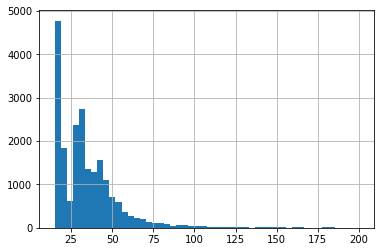

In [94]:
data['living_area'].hist(bins=50,range =(15, 200))
plt.show()

In [95]:
data[data['living_area'] > data['total_area']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [96]:
data['living_area'].describe()

count   21709.000
mean       34.385
std        21.899
min         2.000
25%        18.600
50%        30.000
75%        42.300
max       409.700
Name: living_area, dtype: float64

В `living_area` хранятся данные о жилой площади в кв.м. Как правило, это означает площадь комнат в квартире (т.е., общая площадь без площади кухни, коридоров, санузлов и балконов), но способ подсчета в ТЗ не указан. В полной мере в таблице представлены только сведения об общей площади. Можем попробовать заполнить пропуски следующим образом  - взять отношение жилой площади к общей площади квартир и применить его ко всем квартирам. Но прежде рассмотрим признак на предмет аномалий. 

<AxesSubplot:>

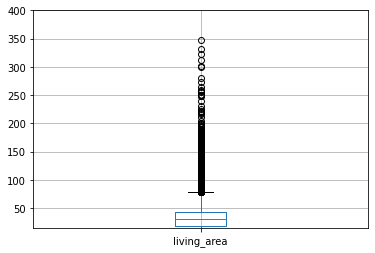

In [97]:
plt.ylim(15,400)
data.boxplot('living_area')
plt.show()

In [98]:
data.query('living_area >= 200')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
660,3.000,49950000.000,483.900,2017-10-04,7.000,3.200,6.000,312.500,4.000,NaN,...,26.400,NaN,Санкт-Петербург,23079.000,945.000,3.000,461.000,3.000,22.000,391.000
793,20.000,135000000.000,310.000,2018-05-22,4.000,3.300,5.000,250.000,2.000,NaN,...,50.000,NaN,Санкт-Петербург,34159.000,7251.000,2.000,295.000,3.000,190.000,342.000
866,5.000,25000000.000,363.000,2017-12-23,14.000,3.160,5.000,222.000,4.000,NaN,...,16.600,NaN,Санкт-Петербург,38076.000,7950.000,0.000,NaN,2.000,435.000,418.000
1085,16.000,75000000.000,323.000,2017-07-10,5.000,4.000,5.000,255.700,4.000,NaN,...,66.000,NaN,Санкт-Петербург,23713.000,594.000,3.000,398.000,2.000,515.000,259.000
1494,10.000,65000000.000,364.000,2018-11-27,7.000,3.900,6.000,250.000,3.000,NaN,...,20.000,NaN,Санкт-Петербург,21988.000,3254.000,0.000,NaN,1.000,689.000,46.000
2580,6.000,30900000.000,338.600,2017-10-16,7.000,3.860,6.000,230.000,4.000,NaN,...,20.000,NaN,Санкт-Петербург,24957.000,5641.000,0.000,NaN,0.000,NaN,406.000
4237,1.000,50000000.000,517.000,2017-10-14,7.000,2.650,4.000,332.000,3.000,NaN,...,22.000,NaN,Санкт-Петербург,22835.000,1847.000,2.000,477.000,2.000,540.000,NaN
5358,20.000,65000000.000,590.000,2019-02-14,15.000,3.500,6.000,409.000,3.000,NaN,...,100.000,NaN,Санкт-Петербург,24447.000,4666.000,1.000,767.000,0.000,NaN,14.000
6221,8.000,34000000.000,470.300,2018-01-14,4.000,2.650,3.000,248.700,3.000,NaN,...,40.000,NaN,Санкт-Петербург,43756.000,15459.000,1.000,852.000,3.000,122.000,179.000
6621,20.000,99000000.000,488.000,2017-04-09,5.000,2.950,20.000,216.000,17.000,NaN,...,50.000,NaN,Санкт-Петербург,27641.000,4598.000,1.000,646.000,1.000,368.000,351.000


В качестве аномально больших помещений возьмем, опираясь на диаграмму размаха, квартиры с  жилой площадью более 200 кв.м. Их не так много, что логично. Находятся в Санкт-Петербурге, у всех много комнат, большая общая площадь и высокая стоимость. Два исключения - строки 1085 и 7857. В первой квартире совокупная жилая площадь и кухня `kitchen_area` практически равны общей площади квартиры. Места на санузлы и коридоры не остается. В 7857 - жилая площадь составляет 220 кв.м., а совокупная - 230 кв.м. Под кухню места не остается. Поэтому эти строки можем удалить. Остальное оставляем как есть и рассмотрим квартиры, где жилая площадь менее 10 кв.м. (прежположим, что это минимум для одной жилой комнаты). Пока не будем принимать во внимание квартиры, где в принципе невысокая общая площадь (менее 20 кв.м.).

In [99]:
data.loc[7857] = None

In [100]:
data.loc[1085] = None

In [101]:
data = data.dropna(subset = ['total_images'])

In [102]:
data.query('living_area <= 10 and total_area >= 20')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
114,5.000,4000000.000,21.400,2019-02-07,1.000,2.900,8.000,8.300,7.000,NaN,...,6.300,NaN,Санкт-Петербург,27089.000,5791.000,2.000,488.000,1.000,286.000,NaN
248,7.000,4100000.000,31.000,2015-08-02,1.000,3.000,17.000,10.000,6.000,False,...,NaN,0.000,Санкт-Петербург,39771.000,8672.000,1.000,139.000,0.000,NaN,637.000
615,15.000,4100000.000,43.000,2017-06-30,1.000,2.650,18.000,10.000,12.000,NaN,...,20.000,2.000,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,18.000
680,14.000,7200000.000,43.000,2017-10-31,1.000,2.650,8.000,9.000,2.000,NaN,...,23.000,NaN,Санкт-Петербург,23900.000,5232.000,1.000,2137.000,1.000,933.000,296.000
1326,8.000,8100000.000,52.000,2017-01-29,2.000,2.700,25.000,9.000,15.000,NaN,...,32.000,2.000,Санкт-Петербург,35555.000,15561.000,0.000,NaN,1.000,1180.000,337.000
1816,3.000,1650000.000,22.000,2016-09-19,1.000,2.650,18.000,10.000,15.000,NaN,...,NaN,0.000,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,274.000
1947,11.000,1400000.000,24.000,2018-06-15,1.000,2.550,5.000,10.000,5.000,NaN,...,6.000,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,3.000
2309,10.000,4200000.000,62.400,2017-06-15,2.000,2.600,9.000,8.400,6.000,NaN,...,41.000,2.000,посёлок Шушары,23662.000,29448.000,0.000,NaN,0.000,NaN,111.000
2654,4.000,3936700.000,42.800,2018-01-02,1.000,2.750,14.000,10.000,4.000,NaN,...,15.900,2.000,Сестрорецк,59377.000,36307.000,1.000,88.000,2.000,140.000,16.000
2699,14.000,3850000.000,37.100,2017-10-24,1.000,2.600,9.000,10.000,7.000,NaN,...,15.000,NaN,Пушкин,14059.000,26212.000,0.000,NaN,0.000,NaN,255.000


Посмотрим, сможем ли мы сократить число аномально маленьких квартир, если уберем из списка студии и помещения со свободной планировкой, а также квартиры с 1 комнатой. Также, увеличим общую площадь до 34 кв.м. (представляется, что эти квартиры могут быть реальны - например, строка 14103 - общая площадь 34 кв.м., жилая - 10 кв.м., большая еврокухня, еще и два балкона)

In [103]:
data.query('living_area <= 10 and total_area > 34 and open_plan == False and studio == False and rooms > 1')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1326,8.000,8100000.000,52.000,2017-01-29,2.000,2.700,25.000,9.000,15.000,NaN,...,32.000,2.000,Санкт-Петербург,35555.000,15561.000,0.000,NaN,1.000,1180.000,337.000
2309,10.000,4200000.000,62.400,2017-06-15,2.000,2.600,9.000,8.400,6.000,NaN,...,41.000,2.000,посёлок Шушары,23662.000,29448.000,0.000,NaN,0.000,NaN,111.000
8325,9.000,4800000.000,52.000,2017-10-25,2.000,2.650,5.000,9.000,2.000,NaN,...,6.000,1.000,Санкт-Петербург,33358.000,13171.000,0.000,NaN,2.000,118.000,119.000
13915,20.000,6350000.000,52.000,2018-02-06,2.000,3.000,6.000,2.000,2.000,NaN,...,9.000,NaN,Санкт-Петербург,32453.000,6521.000,0.000,NaN,1.000,1012.000,91.000
20994,7.000,8900000.000,50.600,2018-10-22,2.000,2.500,7.000,8.000,3.000,NaN,...,31.000,NaN,Санкт-Петербург,12771.000,8301.000,1.000,173.000,3.000,126.000,NaN
21943,15.000,6100000.000,77.600,2019-02-28,4.000,2.500,9.000,5.400,1.000,NaN,...,9.800,NaN,Санкт-Петербург,29338.000,11270.000,1.000,584.000,0.000,NaN,33.000
23574,14.000,64990000.000,139.000,2015-11-24,3.000,3.000,8.000,3.000,8.000,NaN,...,16.000,1.000,Санкт-Петербург,33255.000,5975.000,1.000,630.000,3.000,100.000,280.000


Остались 7 квартир, где данные о жилой площади явно искажены.

In [104]:
data.loc[(data['living_area'] <= 10) & (data['rooms'] > 1) & (data['total_area'] > 34)] = None

In [105]:
data.query('living_area <= 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
114,5.000,4000000.000,21.400,2019-02-07,1.000,2.900,8.000,8.300,7.000,NaN,...,6.300,NaN,Санкт-Петербург,27089.000,5791.000,2.000,488.000,1.000,286.000,NaN
248,7.000,4100000.000,31.000,2015-08-02,1.000,3.000,17.000,10.000,6.000,False,...,NaN,0.000,Санкт-Петербург,39771.000,8672.000,1.000,139.000,0.000,NaN,637.000
615,15.000,4100000.000,43.000,2017-06-30,1.000,2.650,18.000,10.000,12.000,NaN,...,20.000,2.000,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,18.000
680,14.000,7200000.000,43.000,2017-10-31,1.000,2.650,8.000,9.000,2.000,NaN,...,23.000,NaN,Санкт-Петербург,23900.000,5232.000,1.000,2137.000,1.000,933.000,296.000
1816,3.000,1650000.000,22.000,2016-09-19,1.000,2.650,18.000,10.000,15.000,NaN,...,NaN,0.000,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,274.000
1947,11.000,1400000.000,24.000,2018-06-15,1.000,2.550,5.000,10.000,5.000,NaN,...,6.000,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,3.000
2654,4.000,3936700.000,42.800,2018-01-02,1.000,2.750,14.000,10.000,4.000,NaN,...,15.900,2.000,Сестрорецк,59377.000,36307.000,1.000,88.000,2.000,140.000,16.000
2699,14.000,3850000.000,37.100,2017-10-24,1.000,2.600,9.000,10.000,7.000,NaN,...,15.000,NaN,Пушкин,14059.000,26212.000,0.000,NaN,0.000,NaN,255.000
3242,7.000,4440000.000,41.000,2017-07-02,1.000,2.650,17.000,3.000,17.000,NaN,...,11.000,NaN,Санкт-Петербург,19272.000,13073.000,0.000,NaN,0.000,NaN,216.000
4100,17.000,5300000.000,34.800,2017-06-19,1.000,2.700,23.000,9.000,15.000,NaN,...,17.100,0.000,Санкт-Петербург,33626.000,13495.000,0.000,NaN,0.000,NaN,30.000


Теперь проверим квартиры с жилой площадью менее 10 кв. м. без привязки к другим параметрам. Если в квартиры с жилой площадью 10 кв.м. еще можно поверить (при учете, что общая площадь порядка 40 кв.м.), то все, что ниже 8.5 кв.м., может быть явной аномалией.

In [106]:
data.query('living_area <= 8.5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
114,5.000,4000000.000,21.400,2019-02-07,1.000,2.900,8.000,8.300,7.000,NaN,...,6.300,NaN,Санкт-Петербург,27089.000,5791.000,2.000,488.000,1.000,286.000,NaN
3242,7.000,4440000.000,41.000,2017-07-02,1.000,2.650,17.000,3.000,17.000,NaN,...,11.000,NaN,Санкт-Петербург,19272.000,13073.000,0.000,NaN,0.000,NaN,216.000
16431,13.000,3799000.000,31.000,2018-04-12,1.000,2.600,5.000,6.000,1.000,NaN,...,17.000,NaN,Санкт-Петербург,32177.000,4826.000,1.000,430.000,0.000,NaN,168.000
17582,11.000,2680000.000,22.000,2018-08-11,0.000,2.650,25.000,5.000,8.000,NaN,...,NaN,2.000,Санкт-Петербург,22735.000,11618.000,1.000,835.000,1.000,652.000,70.000
19251,19.000,4050000.000,33.000,2018-10-15,1.000,2.500,22.000,6.500,21.000,NaN,...,18.000,NaN,Санкт-Петербург,9258.000,10592.000,1.000,458.000,0.000,NaN,44.000
21505,9.000,4100000.000,35.300,2018-01-10,1.000,2.750,27.000,8.500,11.000,NaN,...,16.100,2.000,Санкт-Петербург,33977.000,15076.000,0.000,NaN,0.000,NaN,60.000
21758,0.000,2330000.000,23.000,2018-01-01,0.000,2.650,24.000,2.000,22.000,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.000
23208,12.000,4800000.000,37.000,2016-02-24,1.000,2.650,14.000,8.000,11.000,NaN,...,22.000,0.000,Санкт-Петербург,27838.000,12387.000,2.000,358.000,1.000,950.000,139.000


Кажется странным, что площадь кухни в несколько раз превышает площадь жилых помещений. Явно в `living_area` была допущена ошибка. Избавимся от этих данных. 

In [107]:
data.loc[data['living_area'] <= 8.5] = None

In [108]:
data['living_area'].describe()

count   21692.000
mean       34.386
std        21.807
min         8.900
25%        18.600
50%        30.000
75%        42.300
max       409.700
Name: living_area, dtype: float64

Еще раз посмотрим на квартиры с маленькой жилой площадью, но в этот раз в контексте числа комнат. За основу возьмем квартиры с жилой площадью ниже первого квартиля (18.6 кв.м.). 

In [109]:
data.query('living_area <= 18.6 and rooms > 1')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
569,7.000,4160000.000,50.000,2016-06-08,2.000,2.650,25.000,18.000,17.000,NaN,...,12.500,0.000,Санкт-Петербург,22306.000,17634.000,0.000,NaN,1.000,132.000,49.000
1378,16.000,15990000.000,58.500,2016-11-01,2.000,2.850,12.000,15.000,5.000,NaN,...,27.000,2.000,Санкт-Петербург,28529.000,6832.000,1.000,592.000,0.000,NaN,510.000
2292,12.000,5300000.000,52.000,2017-10-11,2.000,2.550,17.000,16.000,1.000,NaN,...,9.000,NaN,Санкт-Петербург,13314.000,10927.000,0.000,NaN,1.000,401.000,381.000
2926,2.000,6150000.000,43.000,2017-06-22,2.000,2.500,25.000,18.600,16.000,NaN,...,12.000,NaN,Санкт-Петербург,51299.000,14592.000,0.000,NaN,0.000,NaN,488.000
3301,21.000,4950000.000,46.400,2017-12-07,2.000,2.650,25.000,16.600,2.000,NaN,...,11.000,1.000,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,47.000
3761,19.000,4750000.000,45.000,2019-02-22,2.000,2.500,12.000,14.000,8.000,NaN,...,20.000,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3854,4.000,3725000.000,36.650,2018-05-27,2.000,2.700,18.000,11.150,3.000,NaN,...,15.690,2.000,посёлок Шушары,13478.000,19265.000,0.000,NaN,1.000,478.000,105.000
4077,10.000,3000000.000,20.000,2017-04-10,2.000,2.650,6.000,13.000,2.000,NaN,...,5.600,0.000,Санкт-Петербург,28450.000,6996.000,2.000,223.000,1.000,611.000,16.000
4585,13.000,7600000.000,60.000,2017-12-14,2.000,3.000,3.000,18.000,1.000,NaN,...,23.000,NaN,Санкт-Петербург,23932.000,4232.000,1.000,380.000,0.000,NaN,131.000
4665,1.000,2200000.000,43.000,2018-08-03,2.000,2.650,2.000,18.120,2.000,NaN,...,7.000,NaN,посёлок Терволово,NaN,NaN,NaN,NaN,NaN,NaN,3.000


Также странные трехкомнатные квартиры, где жилая площадь не превышает 18 кв.м. (при этом и площадь кухонь относительно невысокая, и отсутствуют балконы). Судя по `total_area`, квартиры сами по себе не такие уж и маленькие. Удалим и эти сведения.  

In [110]:
data.loc[(data['living_area'] <= 18.6) & (data['rooms'] > 2)] = None

In [111]:
data = data.dropna(subset=['first_day_exposition'])

In [112]:
data['living_area'].describe()

count   21688.000
mean       34.390
std        21.808
min         8.900
25%        18.600
50%        30.000
75%        42.300
max       409.700
Name: living_area, dtype: float64

<AxesSubplot:>

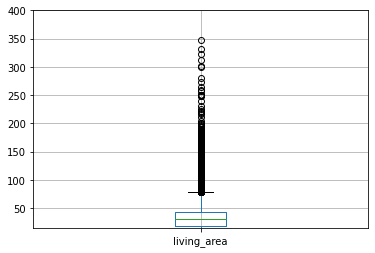

In [113]:
plt.ylim(15,400)
data.boxplot('living_area')
plt.show()

In [114]:
(data['living_area'] / data['total_area']).median()

0.568210015790661

В среднем, жилая площадь квартиры занимает 56% от общей. Поскольку у нас есть сведения об общей площади всех квартир, пропуски можем заполнить следующим образом: добавить в `living_area` 56% от значения `total_area`.

In [115]:
data['living_area'] = data['living_area'].fillna(data['total_area'] * 0.56)

In [116]:
data.query('(living_area + kitchen_area) > total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7.000,2600000.000,30.200,2018-02-14,1.000,2.650,9.000,26.100,5.000,NaN,...,6.200,NaN,Санкт-Петербург,13952.000,15031.000,0.000,NaN,1.000,824.000,12.000
545,9.000,4700000.000,23.800,2018-12-28,1.000,2.650,18.000,20.000,9.000,NaN,...,5.000,NaN,Санкт-Петербург,9731.000,11849.000,0.000,NaN,0.000,NaN,108.000
551,8.000,3100000.000,31.590,2018-03-08,1.000,2.700,19.000,30.550,2.000,NaN,...,9.280,2.000,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,70.000
601,12.000,5600000.000,53.700,2017-04-18,2.000,2.500,12.000,48.300,5.000,NaN,...,7.000,2.000,Санкт-Петербург,50477.000,13252.000,2.000,220.000,1.000,1250.000,167.000
696,1.000,3364930.000,34.690,2014-11-27,1.000,2.640,25.000,23.430,25.000,NaN,...,23.430,2.000,Санкт-Петербург,43396.000,12153.000,0.000,NaN,0.000,NaN,574.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21824,20.000,2450000.000,44.000,2019-02-12,2.000,2.700,2.000,38.000,2.000,False,...,8.600,2.000,городской поселок Большая Ижора,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21868,12.000,2600000.000,34.300,2018-09-26,1.000,2.500,9.000,30.600,6.000,NaN,...,8.000,2.000,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,107.000
21915,14.000,11990000.000,91.400,2016-05-16,2.000,2.650,16.000,62.000,12.000,NaN,...,32.400,0.000,Санкт-Петербург,10934.000,12551.000,0.000,NaN,0.000,NaN,93.000
21956,0.000,5200000.000,46.000,2018-07-20,2.000,2.650,5.000,44.000,5.000,NaN,...,8.000,1.000,Санкт-Петербург,14103.000,15182.000,1.000,488.000,0.000,NaN,7.000


В результате замены пропущенных значений получилось, что в 79 квартирах совокупная площадь кухни и жилых помещений больше, чем площадь самой квартиры. Может быть связано с большой площадью кухни либо тем, что площадь комнат занимает больше 56% от всей квартиры. Как представляется, тут исправить данные не получится. Также удалим их.

In [117]:
data.loc[(data['living_area'] + data['kitchen_area']) > data['total_area']] = None

In [118]:
data = data.dropna(subset = ['living_area'])

<AxesSubplot:>

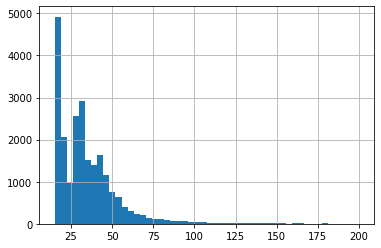

In [119]:
data['living_area'].hist(bins=50,range =(15, 200))
plt.show()

In [120]:
data['living_area'].value_counts()

18.000     880
17.000     674
30.000     595
16.000     484
20.000     479
          ... 
16.408       1
163.200      1
29.610       1
27.776       1
16.740       1
Name: living_area, Length: 2359, dtype: int64

In [121]:
data['living_area'].describe()

count   23484.000
mean       34.451
std        22.071
min         7.280
25%        19.000
50%        30.000
75%        42.000
max       409.700
Name: living_area, dtype: float64

<b> Избавились от аномально низких значений `living_area` и пропусков путем добавления отношения жилой площади к общей площади квартир. </b>

### `is_apartment`

In [122]:
data['is_apartment'].value_counts()

False    2705
True       47
Name: is_apartment, dtype: int64

В данном признаке хранятся сведения, является ли квартира апартаментами или нет. Подавляющее большинство сведений пропущено. Предположим, что пропуски связаны с тем, что владельцы квартир при добавлении объявлений не указывали эту информацию, подразумевая, что они продают квартиры,а не апартаменты. В целом, логично, что на рынке недвижимости квартир сильно больше (те же апартаменты, к примеру, чаще сдают в аренду, а не перепродают). Поэтому можем заполнить пропуски значением False (не является аппартаментами).

In [123]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [124]:
data['is_apartment'].value_counts()

False    23437
True        47
Name: is_apartment, dtype: int64

<b> Таким образом, пропуски заменены на False. Подавляющее большинство лотов являются квартирами, не апартаментами. </b>

### `kitchen_area`

In [125]:
data[data['kitchen_area'].isna()].head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0.000,64900000.000,159.000,2015-07-24,3.000,2.650,14.000,89.040,9.000,False,...,NaN,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000
30,12.000,2200000.000,32.800,2018-02-19,1.000,2.650,9.000,18.368,2.000,False,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.000
37,10.000,1990000.000,45.800,2017-10-28,2.000,2.500,5.000,25.648,1.000,False,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.000
44,13.000,5350000.000,40.000,2018-11-18,1.000,2.650,22.000,22.400,3.000,False,...,NaN,1.000,Санкт-Петербург,30471.000,11603.000,1.000,620.000,1.000,1152.000,NaN
59,15.000,6300000.000,46.500,2017-03-06,1.000,2.650,13.000,26.040,13.000,False,...,NaN,NaN,Санкт-Петербург,11125.000,14501.000,0.000,NaN,0.000,NaN,336.000
60,3.000,2740000.000,35.000,2018-01-01,1.000,2.650,12.000,19.600,8.000,False,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.000
81,9.000,10949000.000,68.000,2018-12-27,1.000,2.650,10.000,38.080,6.000,False,...,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,3.000,4500000.000,80.500,2018-01-15,3.000,2.650,25.000,45.080,16.000,False,...,NaN,NaN,посёлок Шушары,12430.000,18217.000,0.000,NaN,0.000,NaN,60.000
133,12.000,3150000.000,31.000,2018-03-23,1.000,2.650,25.000,17.360,6.000,False,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,78.000
144,1.000,2450000.000,27.000,2017-03-30,0.000,2.650,24.000,15.500,2.000,False,...,NaN,2.000,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.000


In [126]:
data['kitchen_area'].describe()

count   21260.000
mean       10.534
std         5.854
min         1.300
25%         7.000
50%         9.100
75%        12.000
max       112.000
Name: kitchen_area, dtype: float64

In [127]:
data[data['kitchen_area'] > data['total_area']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


<AxesSubplot:>

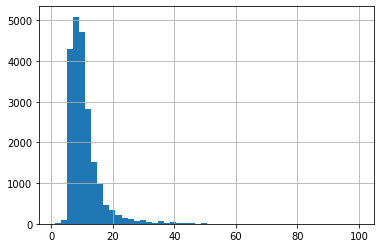

In [128]:
data['kitchen_area'].hist(bins=50,range =(1, 100))
plt.show()

In [129]:
data['kitchen_area'].value_counts()

6.000     1297
10.000    1260
8.000     1105
9.000     1093
7.000     1061
          ... 
7.780        1
7.120        1
13.730       1
14.740       1
16.740       1
Name: kitchen_area, Length: 952, dtype: int64

<AxesSubplot:>

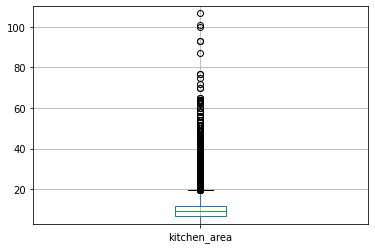

In [130]:
plt.ylim(3,110)
data.boxplot('kitchen_area')
plt.show()

Пропущенные значения в `kitchen_area` можем заполнить по аналогии с  `living_area`. 

In [131]:
data.query('kitchen_area > 75')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
492,18.000,95000000.000,216.000,2017-12-05,4.000,3.000,5.000,86.000,4.000,False,...,77.000,NaN,Санкт-Петербург,21740.000,436.000,2.000,138.000,3.000,620.000,14.000
2489,9.000,12500000.000,255.000,2017-04-21,3.000,2.650,2.000,153.900,2.000,False,...,100.700,0.000,Санкт-Петербург,29544.000,6916.000,0.000,NaN,3.000,198.000,102.000
4394,20.000,57000000.000,174.000,2015-11-09,3.000,3.200,10.000,95.000,6.000,False,...,77.000,NaN,Санкт-Петербург,31706.000,4166.000,1.000,193.000,3.000,199.000,1039.000
5358,20.000,65000000.000,590.000,2019-02-14,15.000,3.500,6.000,409.000,3.000,False,...,100.000,NaN,Санкт-Петербург,24447.000,4666.000,1.000,767.000,0.000,NaN,14.000
10867,1.000,56844500.000,177.900,2015-01-15,3.000,2.650,6.000,87.200,5.000,True,...,87.200,NaN,Санкт-Петербург,21860.000,318.000,2.000,160.000,3.000,569.000,NaN
16239,5.000,82400000.000,181.100,2017-05-24,3.000,3.900,9.000,58.200,4.000,False,...,93.200,NaN,Санкт-Петербург,25525.000,5845.000,2.000,116.000,0.000,NaN,501.000
16797,9.000,65850000.000,146.000,2017-07-14,2.000,2.650,9.000,40.000,3.000,False,...,93.000,0.000,Санкт-Петербург,25525.000,5845.000,2.000,116.000,0.000,NaN,77.000
19540,8.000,420000000.000,900.000,2017-12-06,12.000,2.800,25.000,409.700,25.000,False,...,112.000,NaN,Санкт-Петербург,30706.000,7877.000,0.000,NaN,2.000,318.000,106.000
20215,2.000,85000000.000,249.700,2018-02-01,3.000,2.650,10.000,72.000,9.000,False,...,107.000,4.000,Санкт-Петербург,31532.000,4624.000,1.000,2218.000,2.000,99.000,26.000


 Начнем с поиска аномалий, и возьмем срез кухонь площадью более 75 кв.м. Всего их 9. Бросается в глаза, что в строках 2489, 4394 и 10867 совокупная жилая площадь и кухня практически равны общей площади квартиры. В такое сложно поверить - сами квартиры большие, в них должно быть место под санузлы и коридоры. Что касается остальных -  трудно представить кухни таких размеров, но общая площадь помещений также высока, как и стоимость. Поэтому остальные квартиры оставим. 

In [132]:
data.loc[2489] = None

In [133]:
data.loc[4394] = None

In [134]:
data.loc[10867] = None

In [135]:
data = data.dropna(subset = ['living_area'])

In [136]:
data.query('kitchen_area > living_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4,2.000,10000000.000,100.000,2018-06-19,2.000,3.030,14.000,32.000,13.000,0.000,...,41.000,NaN,Санкт-Петербург,31856.000,8098.000,2.000,112.000,1.000,48.000,121.000
6,6.000,3700000.000,37.300,2017-11-02,1.000,2.650,26.000,10.600,6.000,0.000,...,14.400,1.000,посёлок Парголово,52996.000,19143.000,0.000,NaN,0.000,NaN,155.000
51,7.000,45000000.000,161.000,2017-10-17,3.000,3.200,8.000,38.000,4.000,0.000,...,50.000,NaN,Санкт-Петербург,32537.000,6589.000,0.000,NaN,3.000,99.000,541.000
53,7.000,4300000.000,39.100,2017-11-10,1.000,2.650,25.000,15.400,13.000,0.000,...,15.500,2.000,посёлок Парголово,52611.000,18783.000,0.000,NaN,0.000,NaN,6.000
101,4.000,3000000.000,37.000,2019-03-23,1.000,2.750,10.000,12.000,3.000,0.000,...,13.000,NaN,садовое товарищество Новая Ропша,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22948,10.000,34500000.000,100.000,2018-06-26,3.000,2.650,7.000,34.200,3.000,0.000,...,34.400,NaN,Санкт-Петербург,25754.000,5961.000,3.000,125.000,0.000,NaN,NaN
23148,16.000,7300000.000,58.000,2018-12-18,1.000,2.500,14.000,20.000,5.000,0.000,...,28.000,2.000,Санкт-Петербург,28982.000,7921.000,2.000,186.000,2.000,327.000,NaN
23388,7.000,5400000.000,43.000,2017-04-24,1.000,2.650,18.000,12.000,8.000,0.000,...,20.000,0.000,Санкт-Петербург,25108.000,15940.000,0.000,NaN,0.000,NaN,124.000
23481,1.000,3000000.000,37.290,2019-04-15,1.000,2.650,19.000,10.080,10.000,0.000,...,16.880,NaN,Санкт-Петербург,37006.000,15157.000,0.000,NaN,0.000,NaN,7.000


В 342 квартирах кухня больше жилых помещений. Возможно, это связано с особенностями планировки, или тем, что квартира - небольшая студия или однокомнатная. 

In [137]:
data.query('kitchen_area > living_area and studio == False and open_plan == False and rooms > 1' ).sort_values(by='total_area').head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
7312,8.000,3400000.000,27.000,2018-02-21,2.000,2.500,15.000,9.000,4.000,0.000,...,16.000,NaN,Санкт-Петербург,50246.000,16444.000,1.000,617.000,0.000,NaN,NaN
22473,0.000,3490304.000,33.260,2015-12-22,2.000,2.650,13.000,9.100,9.000,0.000,...,16.400,0.000,Санкт-Петербург,33626.000,13495.000,0.000,NaN,0.000,NaN,199.000
3854,4.000,3725000.000,36.650,2018-05-27,2.000,2.700,18.000,11.150,3.000,0.000,...,15.690,2.000,посёлок Шушары,13478.000,19265.000,0.000,NaN,1.000,478.000,105.000
6843,1.000,3800000.000,37.000,2017-10-17,2.000,2.650,16.000,11.000,4.000,0.000,...,17.000,NaN,Санкт-Петербург,10031.000,13330.000,1.000,915.000,0.000,NaN,160.000
6479,10.000,5100000.000,38.000,2018-10-24,2.000,2.650,6.000,12.800,1.000,0.000,...,21.300,NaN,Санкт-Петербург,24623.000,3389.000,2.000,498.000,1.000,460.000,25.000
5942,1.000,2400000.000,43.220,2019-04-29,2.000,2.650,17.000,12.000,4.000,0.000,...,20.000,NaN,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17454,9.000,5200000.000,45.000,2017-09-21,2.000,2.570,9.000,12.000,2.000,0.000,...,20.000,1.000,Санкт-Петербург,39423.000,10558.000,2.000,100.000,1.000,110.000,64.000
3761,19.000,4750000.000,45.000,2019-02-22,2.000,2.500,12.000,14.000,8.000,0.000,...,20.000,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21169,8.000,4900000.000,45.980,2017-09-27,2.000,2.650,20.000,14.000,13.000,0.000,...,19.000,2.000,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,132.000
17598,14.000,5990000.000,46.000,2017-09-18,2.000,2.650,26.000,15.000,20.000,0.000,...,16.700,NaN,Санкт-Петербург,28116.000,11870.000,1.000,533.000,1.000,927.000,206.000


Сначала посмотрим на небольшие квартиры, подходящие под упомянутые параметры. В целом, все кажется вполне нормальным - кухни больше жилых помещений, но это могут быть квартиры с европланировкой, где кухня совмещена с одной из комнат, за счет чего кажется больше.

In [138]:
data.query('kitchen_area > living_area and studio == False and open_plan == False and rooms > 1' ).sort_values(by='total_area').tail(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
10753,6.000,18700000.000,116.000,2014-12-27,2.000,2.650,5.000,42.100,4.000,0.000,...,42.500,NaN,Санкт-Петербург,36779.000,14931.000,0.000,NaN,0.000,NaN,NaN
6021,19.000,16830000.000,117.400,2019-04-04,2.000,2.750,16.000,33.400,13.000,0.000,...,51.000,2.000,Санкт-Петербург,51030.000,14721.000,0.000,NaN,0.000,NaN,NaN
19499,10.000,8000000.000,118.000,2017-08-31,3.000,3.000,5.000,36.000,4.000,0.000,...,64.000,4.000,Пушкин,18616.000,30770.000,1.000,569.000,0.000,NaN,7.000
10001,9.000,49500000.000,119.000,2016-01-19,3.000,3.300,8.000,47.000,2.000,0.000,...,50.000,0.000,Санкт-Петербург,24764.000,5332.000,3.000,134.000,0.000,NaN,425.000
15780,9.000,12990000.000,119.600,2017-03-13,3.000,3.000,5.000,36.400,4.000,0.000,...,64.000,4.000,Пушкин,18616.000,30770.000,1.000,569.000,0.000,NaN,NaN
1257,6.000,18700000.000,122.100,2015-09-24,2.000,2.650,5.000,38.300,3.000,0.000,...,42.600,NaN,Санкт-Петербург,36779.000,14931.000,0.000,NaN,0.000,NaN,NaN
4289,18.000,28899000.000,123.000,2019-01-25,3.000,3.100,10.000,36.000,5.000,0.000,...,38.000,3.000,Санкт-Петербург,26084.000,5807.000,3.000,411.000,1.000,478.000,NaN
14900,20.000,25900000.000,125.600,2018-08-14,2.000,4.000,4.000,42.700,4.000,0.000,...,62.500,2.000,Пушкин,13426.000,25580.000,0.000,NaN,0.000,NaN,194.000
2356,11.000,50000000.000,128.000,2016-06-24,3.000,2.650,9.000,42.000,1.000,0.000,...,50.000,0.000,Санкт-Петербург,26933.000,5780.000,1.000,625.000,1.000,283.000,27.000
263,12.000,39900000.000,140.600,2016-11-19,2.000,3.500,8.000,39.800,7.000,0.000,...,49.200,4.000,Санкт-Петербург,32537.000,6589.000,0.000,NaN,3.000,99.000,NaN


Здесь ситуация схожая, и причины, по которым кухня больше жилых комнат, те же. Здесь аномалий не обнаружено. 

In [139]:
data.query('kitchen_area < 4')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
906,15.000,2600000.000,27.000,2017-07-10,1.000,2.750,23.000,18.000,18.000,0.000,...,2.000,0.000,Санкт-Петербург,22131.000,17459.000,0.000,NaN,1.000,411.000,10.000
2165,15.000,3180000.000,25.000,2019-03-21,1.000,2.500,25.000,17.000,17.000,0.000,...,3.000,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,19.000
3078,17.000,6000000.000,43.000,2018-11-12,2.000,2.900,4.000,29.300,2.000,0.000,...,3.200,NaN,Санкт-Петербург,22357.000,5247.000,1.000,319.000,2.000,831.000,37.000
3195,17.000,2690000.000,25.600,2018-02-19,1.000,2.500,9.000,16.200,7.000,0.000,...,3.800,NaN,Санкт-Петербург,11033.000,11281.000,0.000,NaN,1.000,283.000,99.000
6084,6.000,770000.000,18.000,2017-10-16,1.000,2.650,5.000,13.000,4.000,0.000,...,3.000,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,90.000
6262,9.000,3100000.000,24.000,2018-06-25,2.000,3.000,5.000,16.000,5.000,0.000,...,2.000,NaN,Санкт-Петербург,31960.000,4914.000,2.000,426.000,1.000,936.000,54.000
7047,9.000,2800000.000,21.000,2017-09-23,1.000,2.650,5.000,14.900,3.000,0.000,...,3.800,NaN,Санкт-Петербург,19676.000,3974.000,0.000,NaN,3.000,518.000,108.000
7950,3.000,5967734.000,66.400,2017-02-07,2.000,2.650,4.000,44.400,2.000,0.000,...,2.890,NaN,Санкт-Петербург,44870.000,20802.000,0.000,NaN,0.000,NaN,335.000
8712,6.000,14948000.000,42.700,2017-09-15,2.000,2.800,4.000,27.500,4.000,0.000,...,3.700,NaN,Санкт-Петербург,25212.000,3914.000,1.000,290.000,1.000,860.000,167.000
8729,9.000,2200000.000,18.400,2018-08-20,1.000,2.520,3.000,14.000,3.000,0.000,...,2.400,NaN,Пушкин,20710.000,30687.000,0.000,NaN,1.000,155.000,59.000


Здесь, кажется, все тоже в норме. Каких-то аномальных ситуаций, например, слишком большая квартира и черезчур маленькая кухня, не наблюдается. Небольшая квартира, относительно медианы высокая жилая площадь и, соответственно, маленькая кухня. 

In [140]:
(data['kitchen_area'] / data['total_area']).describe()

count   21257.000
mean        0.187
std         0.072
min         0.029
25%         0.133
50%         0.172
75%         0.231
max         0.725
dtype: float64

In [141]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * 0.17)

In [142]:
data.query('(living_area + kitchen_area) > total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
424,14.000,11500000.000,98.000,2016-05-10,3.000,2.650,3.000,88.000,3.000,0.000,...,16.660,1.000,Санкт-Петербург,39363.000,13270.000,0.000,NaN,0.000,NaN,90.000
440,8.000,2480000.000,27.110,2018-03-12,0.000,2.650,17.000,24.750,4.000,0.000,...,4.609,2.000,Санкт-Петербург,38171.000,15015.000,0.000,NaN,2.000,982.000,64.000
2719,18.000,2400000.000,25.000,2017-08-16,0.000,2.650,25.000,21.000,12.000,0.000,...,4.250,2.000,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,384.000
2720,10.000,3900000.000,68.000,2018-03-13,3.000,4.000,2.000,57.000,1.000,0.000,...,11.560,NaN,Кронштадт,68341.000,50067.000,3.000,286.000,3.000,153.000,264.000
2959,9.000,2550000.000,32.000,2017-12-02,1.000,2.650,14.000,30.200,13.000,0.000,...,5.440,1.000,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,157.000
3618,16.000,4000000.000,75.030,2014-12-15,2.000,2.530,3.000,66.220,3.000,0.000,...,12.755,0.000,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,588.000
4339,19.000,6900000.000,72.000,2019-03-25,3.000,3.500,4.000,70.000,1.000,1.000,...,12.240,NaN,Санкт-Петербург,31487.000,4466.000,2.000,353.000,1.000,439.000,22.000
6059,11.000,11950000.000,100.000,2019-01-31,3.000,2.980,10.000,89.100,2.000,0.000,...,17.000,2.000,Санкт-Петербург,38642.000,12548.000,0.000,NaN,0.000,NaN,40.000
6225,7.000,2650000.000,28.000,2017-07-07,0.000,2.650,25.000,25.000,1.000,0.000,...,4.760,0.000,Санкт-Петербург,11405.000,13222.000,0.000,NaN,1.000,623.000,34.000
7052,4.000,2650000.000,23.300,2017-11-25,1.000,2.650,12.000,20.000,10.000,0.000,...,3.961,NaN,Санкт-Петербург,20381.000,19383.000,0.000,NaN,1.000,579.000,355.000


In [143]:
data.loc[(data['living_area'] + data['kitchen_area']) > data['total_area']] = None

In [144]:
data = data.dropna(subset=['kitchen_area'])

<AxesSubplot:>

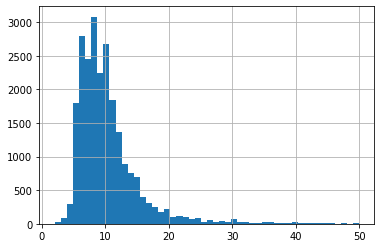

In [145]:
data['kitchen_area'].hist(bins=50, range=(2,50))
plt.show()

<b> От пропущенных значений и аномалий избавились. График похож на графики `total_area` и `living_area`. </b>

### `balcony`

In [146]:
data['balcony'].describe()

count   12038.000
mean        1.153
std         1.071
min         0.000
25%         0.000
50%         1.000
75%         2.000
max         5.000
Name: balcony, dtype: float64

In [147]:
data['balcony'].value_counts()

1.000    4168
0.000    3687
2.000    3620
5.000     301
4.000     183
3.000      79
Name: balcony, dtype: int64

In [148]:
data[data['balcony'].isna()].head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20.000,13000000.000,108.000,2019-03-07,3.000,2.700,16.000,51.000,8.000,0.000,...,25.000,NaN,Санкт-Петербург,18863.000,16028.000,1.000,482.000,2.000,755.000,NaN
4,2.000,10000000.000,100.000,2018-06-19,2.000,3.030,14.000,32.000,13.000,0.000,...,41.000,NaN,Санкт-Петербург,31856.000,8098.000,2.000,112.000,1.000,48.000,121.000
5,10.000,2890000.000,30.400,2018-09-10,1.000,2.650,12.000,14.400,5.000,0.000,...,9.100,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.000
8,20.000,2900000.000,33.160,2018-05-23,1.000,2.650,27.000,15.430,26.000,0.000,...,8.810,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.000
10,5.000,5050000.000,39.600,2017-11-16,1.000,2.670,12.000,20.300,3.000,0.000,...,8.500,NaN,Санкт-Петербург,38357.000,13878.000,1.000,310.000,2.000,553.000,137.000
16,11.000,6700000.000,82.000,2017-11-23,3.000,3.050,5.000,55.600,1.000,0.000,...,9.000,NaN,Санкт-Петербург,22108.000,10698.000,3.000,420.000,0.000,NaN,397.000
19,16.000,14200000.000,121.000,2019-01-09,3.000,2.750,16.000,76.000,8.000,0.000,...,12.000,NaN,Санкт-Петербург,38900.000,12843.000,0.000,NaN,0.000,NaN,97.000
23,11.000,2950000.000,32.000,2016-10-29,1.000,2.600,9.000,17.700,9.000,0.000,...,6.100,NaN,Санкт-Петербург,15414.000,14211.000,2.000,517.000,1.000,190.000,615.000
26,6.000,4050000.000,60.000,2017-04-28,4.000,2.650,5.000,43.000,4.000,0.000,...,7.000,NaN,Санкт-Петербург,11580.000,10510.000,0.000,NaN,1.000,95.000,265.000
30,12.000,2200000.000,32.800,2018-02-19,1.000,2.650,9.000,18.368,2.000,0.000,...,5.576,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.000


В `balcony` пропущенные значения, вероятнее всего, означают отсутствие балконов как таковых. Слабо верится, что в датафрейме число квартир с 1 балконом больше, чем с 0. Поэтому пропуски вполне можно заменить на 0. 

In [149]:
data['balcony'] = data['balcony'].fillna(0)

In [150]:
data.query('balcony >= 3').sort_values(by='balcony',ascending=False).head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16.000,7900000.000,74.000,2016-05-04,3.000,2.650,14.000,59.000,8.000,0.000,...,12.000,5.000,Санкт-Петербург,37715.000,12612.000,1.000,725.000,1.000,759.000,179.000
13088,20.000,26900000.000,130.000,2017-12-09,4.000,2.800,17.000,76.400,15.000,0.000,...,12.000,5.000,Санкт-Петербург,36827.000,12348.000,1.000,485.000,1.000,474.000,NaN
14886,6.000,7433186.000,60.400,2018-07-24,2.000,3.000,4.000,33.824,2.000,0.000,...,10.940,5.000,Санкт-Петербург,44870.000,20802.000,0.000,NaN,1.000,792.000,NaN
14592,19.000,8600000.000,86.600,2019-04-30,4.000,2.550,10.000,60.000,2.000,0.000,...,14.722,5.000,Санкт-Петербург,45968.000,18692.000,0.000,NaN,0.000,NaN,NaN
14559,5.000,7602000.000,84.000,2018-01-01,3.000,2.750,12.000,46.600,6.000,0.000,...,18.900,5.000,Сестрорецк,59377.000,36307.000,1.000,88.000,2.000,140.000,112.000
14539,5.000,35290000.000,116.000,2018-10-10,3.000,3.000,20.000,49.000,14.000,0.000,...,32.700,5.000,Санкт-Петербург,13341.000,8871.000,1.000,416.000,3.000,596.000,NaN
14485,3.000,9900000.000,183.000,2017-02-09,5.000,2.830,14.000,112.000,4.000,0.000,...,14.000,5.000,Санкт-Петербург,10997.000,11082.000,0.000,NaN,1.000,418.000,129.000
14405,20.000,3800000.000,57.700,2019-03-14,3.000,2.600,9.000,39.300,1.000,0.000,...,6.200,5.000,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14109,2.000,4200000.000,57.000,2018-06-15,2.000,2.650,25.000,33.100,15.000,0.000,...,11.000,5.000,посёлок Шушары,13005.000,18791.000,0.000,NaN,0.000,NaN,69.000
14097,0.000,7500000.000,93.000,2018-02-20,2.000,2.700,12.000,42.000,12.000,0.000,...,25.000,5.000,Санкт-Петербург,20867.000,22579.000,0.000,NaN,1.000,886.000,54.000


In [151]:
data.groupby('balcony')['total_area'].median()

balcony
0.000   52.000
1.000   48.600
2.000   52.000
3.000   74.400
4.000   75.000
5.000   71.600
Name: total_area, dtype: float64

In [152]:
data.query('balcony >= 3 and total_area <= 70').sort_values(by='total_area').head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8206,16.000,2900000.000,30.100,2018-10-22,1.000,2.500,5.000,17.000,5.000,0.000,...,5.300,3.000,посёлок Песочный,53568.000,26332.000,0.000,NaN,0.000,NaN,169.000
7932,10.000,2888000.000,30.200,2016-11-09,1.000,2.530,9.000,15.000,2.000,0.000,...,8.000,5.000,Санкт-Петербург,32524.000,9601.000,0.000,NaN,0.000,NaN,675.000
17601,0.000,2550000.000,33.000,2017-11-10,1.000,2.400,5.000,18.000,4.000,0.000,...,5.500,3.000,Красное Село,24722.000,28146.000,1.000,549.000,0.000,NaN,74.000
16553,0.000,1650000.000,33.500,2018-07-03,1.000,2.800,5.000,18.760,5.000,0.000,...,5.695,4.000,Луга,NaN,NaN,NaN,NaN,NaN,NaN,7.000
13648,8.000,3300000.000,35.000,2018-09-21,1.000,2.700,16.000,15.000,14.000,0.000,...,9.000,5.000,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,162.000
11586,5.000,3445000.000,35.950,2018-08-28,1.000,2.550,22.000,20.132,19.000,0.000,...,9.650,5.000,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,239.000
654,6.000,2750000.000,36.000,2017-04-18,1.000,2.650,5.000,20.500,5.000,0.000,...,7.800,4.000,Кронштадт,69785.000,51511.000,2.000,52.000,3.000,313.000,381.000
11441,9.000,4400000.000,36.800,2017-05-03,1.000,2.650,24.000,26.000,20.000,0.000,...,10.000,4.000,Санкт-Петербург,12188.000,14779.000,0.000,NaN,1.000,246.000,11.000
20879,5.000,4190000.000,36.950,2015-12-18,1.000,2.650,11.000,16.500,5.000,0.000,...,10.000,4.000,Санкт-Петербург,18881.000,17734.000,0.000,NaN,2.000,210.000,713.000
20888,4.000,3200000.000,37.000,2017-11-26,1.000,2.650,14.000,16.000,5.000,0.000,...,11.000,5.000,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,22.000


In [153]:
len(data.query('balcony >= 3 and total_area <= 70').sort_values(by='total_area'))

258

In [154]:
len(data.query('balcony >= 3 and total_area > 70').sort_values(by='total_area'))

305

Итак, у нас есть 258 квартир с 3 и более балконами и общей площадью менее или равной 70 кв.м. Данные взяты исходя из медианного значения. Это почти половина от общего числа квартир с таким числом балконов. Попробуем отсечь квартиры с 3 балконами.

In [155]:
data.query('balcony > 3 and total_area <= 70').sort_values(by='total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
7932,10.000,2888000.000,30.200,2016-11-09,1.000,2.530,9.000,15.000,2.000,0.000,...,8.000,5.000,Санкт-Петербург,32524.000,9601.000,0.000,NaN,0.000,NaN,675.000
16553,0.000,1650000.000,33.500,2018-07-03,1.000,2.800,5.000,18.760,5.000,0.000,...,5.695,4.000,Луга,NaN,NaN,NaN,NaN,NaN,NaN,7.000
13648,8.000,3300000.000,35.000,2018-09-21,1.000,2.700,16.000,15.000,14.000,0.000,...,9.000,5.000,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,162.000
11586,5.000,3445000.000,35.950,2018-08-28,1.000,2.550,22.000,20.132,19.000,0.000,...,9.650,5.000,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,239.000
654,6.000,2750000.000,36.000,2017-04-18,1.000,2.650,5.000,20.500,5.000,0.000,...,7.800,4.000,Кронштадт,69785.000,51511.000,2.000,52.000,3.000,313.000,381.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13186,17.000,6150000.000,70.000,2018-08-13,3.000,2.600,16.000,43.400,5.000,0.000,...,8.500,5.000,Санкт-Петербург,31723.000,12728.000,0.000,NaN,0.000,NaN,9.000
4976,10.000,12300000.000,70.000,2018-01-12,2.000,2.650,17.000,34.000,15.000,0.000,...,13.900,5.000,Санкт-Петербург,10620.000,12064.000,1.000,513.000,1.000,671.000,185.000
21211,5.000,6750000.000,70.000,2017-04-25,3.000,2.650,12.000,44.000,6.000,0.000,...,8.000,5.000,Санкт-Петербург,14628.000,16672.000,1.000,679.000,0.000,NaN,397.000
5482,5.000,5850000.000,70.000,2017-04-15,3.000,2.650,16.000,42.500,3.000,0.000,...,10.600,5.000,Санкт-Петербург,16403.000,11646.000,0.000,NaN,1.000,1219.000,60.000


Крайне странные значения - квартиры относительно небольшие по площади, располагаются невысоко, не всегда в Санкт-Петербурге и при этом имеют 4-5 балконов. Как представляется, это аномалии, от которых можем избавиться, но прежде нужно определиться с общей площадью квартир - начиная с какого значения данные становятся аномально высокими.

In [156]:
data.query('balcony > 3 and total_area < 50').sort_values(by='total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
7932,10.000,2888000.000,30.200,2016-11-09,1.000,2.530,9.000,15.000,2.000,0.000,...,8.000,5.000,Санкт-Петербург,32524.000,9601.000,0.000,NaN,0.000,NaN,675.000
16553,0.000,1650000.000,33.500,2018-07-03,1.000,2.800,5.000,18.760,5.000,0.000,...,5.695,4.000,Луга,NaN,NaN,NaN,NaN,NaN,NaN,7.000
13648,8.000,3300000.000,35.000,2018-09-21,1.000,2.700,16.000,15.000,14.000,0.000,...,9.000,5.000,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,162.000
11586,5.000,3445000.000,35.950,2018-08-28,1.000,2.550,22.000,20.132,19.000,0.000,...,9.650,5.000,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,239.000
654,6.000,2750000.000,36.000,2017-04-18,1.000,2.650,5.000,20.500,5.000,0.000,...,7.800,4.000,Кронштадт,69785.000,51511.000,2.000,52.000,3.000,313.000,381.000
11441,9.000,4400000.000,36.800,2017-05-03,1.000,2.650,24.000,26.000,20.000,0.000,...,10.000,4.000,Санкт-Петербург,12188.000,14779.000,0.000,NaN,1.000,246.000,11.000
20879,5.000,4190000.000,36.950,2015-12-18,1.000,2.650,11.000,16.500,5.000,0.000,...,10.000,4.000,Санкт-Петербург,18881.000,17734.000,0.000,NaN,2.000,210.000,713.000
20888,4.000,3200000.000,37.000,2017-11-26,1.000,2.650,14.000,16.000,5.000,0.000,...,11.000,5.000,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,22.000
22519,4.000,4950000.000,38.130,2015-06-19,1.000,2.650,11.000,17.700,6.000,0.000,...,8.000,4.000,Санкт-Петербург,32079.000,5038.000,0.000,NaN,3.000,537.000,688.000
3238,19.000,3700000.000,40.000,2015-06-04,1.000,3.000,3.000,25.000,3.000,0.000,...,15.000,4.000,деревня Юкки,NaN,NaN,NaN,NaN,NaN,NaN,849.000


In [157]:
data.query('balcony > 3 and 50 <= total_area <= 60').sort_values(by='total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
7092,11.000,4300000.000,50.000,2017-06-15,2.000,2.700,7.000,26.200,5.000,0.000,...,8.000,4.000,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,222.000
13383,7.000,2500000.000,50.000,2016-05-11,2.000,2.600,5.000,35.000,4.000,0.000,...,8.000,4.000,поселок городского типа Лебяжье,NaN,NaN,NaN,NaN,NaN,NaN,45.000
21656,15.000,7557000.000,50.000,2017-10-25,1.000,2.650,16.000,20.000,12.000,0.000,...,9.600,5.000,Санкт-Петербург,37593.000,13114.000,1.000,570.000,3.000,502.000,24.000
16084,11.000,1900000.000,50.000,2018-08-16,2.000,2.650,9.000,31.000,6.000,0.000,...,7.000,4.000,Кириши,NaN,NaN,NaN,NaN,NaN,NaN,4.000
8762,14.000,4750000.000,50.100,2018-07-28,2.000,2.600,9.000,31.000,3.000,0.000,...,9.300,5.000,Санкт-Петербург,13404.000,15995.000,0.000,NaN,1.000,789.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3653,6.000,5100000.000,60.000,2016-06-06,3.000,2.650,9.000,44.000,7.000,0.000,...,8.000,5.000,Санкт-Петербург,31169.000,12467.000,0.000,NaN,0.000,NaN,496.000
12796,14.000,4250000.000,60.000,2017-11-06,3.000,2.650,9.000,39.000,1.000,0.000,...,6.000,5.000,Санкт-Петербург,47443.000,14905.000,1.000,680.000,1.000,780.000,92.000
18753,16.000,5850000.000,60.000,2017-04-24,3.000,2.500,9.000,39.000,5.000,0.000,...,6.000,5.000,Санкт-Петербург,49928.000,15648.000,1.000,307.000,0.000,NaN,297.000
9883,0.000,4800000.000,60.000,2016-05-26,3.000,2.600,9.000,38.000,7.000,0.000,...,7.000,5.000,посёлок Металлострой,25646.000,27358.000,0.000,NaN,0.000,NaN,617.000


Остановимся на квартирах с 4-5 балконами и площадью менее 50 кв.м. - такие значения крайне трудно представить в жизни, и стрко не так и много, мы можем избавиться от них безболезненно для анализа.

In [158]:
data.loc[(data['balcony'] > 3) & (data['total_area'] < 50)] = None

Теперь разберем на какой высоте находятся квартиры с балконами - слишком низкие показатели также можно удалить.

In [159]:
data.groupby('balcony')['floor'].median()

balcony
0.000   4.000
1.000   5.000
2.000   6.000
3.000   5.000
4.000   5.000
5.000   7.000
Name: floor, dtype: float64

In [160]:
data.loc[(data['balcony'] != 0) & (data['floor'] < 3)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7.000,3350000.000,40.400,2018-12-04,1.000,2.650,11.000,18.600,1.000,0.000,...,11.000,2.000,посёлок Шушары,12817.000,18603.000,0.000,NaN,0.000,NaN,81.000
18,8.000,3250000.000,31.000,2017-01-27,1.000,2.500,5.000,19.400,2.000,0.000,...,5.600,1.000,Санкт-Петербург,44060.000,10842.000,1.000,759.000,0.000,NaN,168.000
21,13.000,3200000.000,31.600,2018-03-14,1.000,2.650,5.000,16.900,2.000,0.000,...,5.700,1.000,Санкт-Петербург,36064.000,9722.000,1.000,248.000,0.000,NaN,310.000
28,8.000,4170000.000,44.000,2017-12-13,1.000,2.900,6.000,20.800,1.000,0.000,...,11.700,1.000,Пушкин,18557.000,30710.000,0.000,NaN,1.000,118.000,74.000
39,15.000,5200000.000,54.400,2018-11-29,2.000,2.750,9.000,29.700,2.000,0.000,...,8.800,2.000,Санкт-Петербург,13413.000,12209.000,0.000,NaN,1.000,1175.000,29.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23631,17.000,14799000.000,104.000,2018-11-18,3.000,3.100,4.000,66.000,2.000,0.000,...,14.000,1.000,Санкт-Петербург,39047.000,13944.000,0.000,NaN,1.000,553.000,90.000
23634,14.000,4100000.000,51.000,2017-08-18,1.000,2.650,18.000,17.500,2.000,0.000,...,15.500,1.000,посёлок Парголово,61710.000,20866.000,0.000,NaN,0.000,NaN,409.000
23645,5.000,1350000.000,40.700,2019-04-04,1.000,2.500,3.000,18.500,1.000,0.000,...,9.000,2.000,поселок Елизаветино,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23673,9.000,3100000.000,23.000,2018-03-19,1.000,2.800,9.000,12.600,1.000,0.000,...,5.000,2.000,Санкт-Петербург,11813.000,11881.000,1.000,262.000,1.000,442.000,41.000


Квартир с балконами на 1-2 этажах слишком много, удалять их не хочется. Судя по строительным регламентам, строить балконы на первых этажах возможно, хоть и сложно. Попробуем рассмотреть ситуацию, когда балконов несколько. 

In [161]:
data.loc[(data['balcony'] > 2) & (data['floor'] < 3)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
42,13.000,22000000.000,161.800,2015-07-08,4.000,2.800,4.000,80.900,2.000,0.000,...,17.600,5.000,Петергоф,35416.000,30605.000,2.000,47.000,1.000,907.000,987.000
371,11.000,7300000.000,65.000,2018-09-12,2.000,2.650,12.000,30.040,2.000,0.000,...,10.200,5.000,Санкт-Петербург,18621.000,17623.000,1.000,1510.000,2.000,372.000,92.000
753,6.000,4500000.000,81.800,2018-01-01,3.000,2.700,4.000,43.500,1.000,0.000,...,18.500,4.000,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,84.000
768,0.000,5100000.000,81.000,2018-02-01,3.000,2.800,12.000,48.300,1.000,0.000,...,14.000,3.000,посёлок Шушары,18542.000,29006.000,0.000,NaN,0.000,NaN,378.000
1030,11.000,7985250.000,57.500,2018-08-21,2.000,2.650,25.000,32.200,2.000,0.000,...,11.240,5.000,Санкт-Петербург,7019.000,13235.000,1.000,712.000,0.000,NaN,60.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21244,10.000,5500000.000,58.000,2018-12-13,3.000,2.600,9.000,41.000,2.000,1.000,...,7.000,5.000,Санкт-Петербург,28632.000,13261.000,0.000,NaN,1.000,544.000,12.000
22100,9.000,8700000.000,81.400,2018-10-29,3.000,2.550,10.000,51.600,1.000,0.000,...,12.600,5.000,Санкт-Петербург,51236.000,14282.000,0.000,NaN,0.000,NaN,112.000
22505,19.000,12000000.000,100.600,2018-09-07,3.000,3.130,3.000,56.800,1.000,0.000,...,15.200,5.000,Петергоф,38485.000,33674.000,1.000,240.000,1.000,752.000,NaN
23496,7.000,3300000.000,55.300,2018-06-19,2.000,2.450,14.000,31.000,2.000,0.000,...,8.400,3.000,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,62.000


Допустим, что квартиры с 1-2 балконами на нижних этажах реальны. Все что больше - уже странно, избавимся от них. 

In [162]:
data.loc[(data['balcony'] > 2) & (data['floor'] < 3)] = None

In [163]:
data.query('balcony > (rooms)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7.000,3350000.000,40.400,2018-12-04,1.000,2.650,11.000,18.600,1.000,0.000,...,11.000,2.000,посёлок Шушары,12817.000,18603.000,0.000,NaN,0.000,NaN,81.000
40,9.000,3590000.000,36.000,2017-03-15,1.000,2.600,26.000,15.000,22.000,0.000,...,10.000,2.000,посёлок Парголово,52996.000,19143.000,0.000,NaN,0.000,NaN,430.000
41,16.000,7900000.000,74.000,2016-05-04,3.000,2.650,14.000,59.000,8.000,0.000,...,12.000,5.000,Санкт-Петербург,37715.000,12612.000,1.000,725.000,1.000,759.000,179.000
53,7.000,4300000.000,39.100,2017-11-10,1.000,2.650,25.000,15.400,13.000,0.000,...,15.500,2.000,посёлок Парголово,52611.000,18783.000,0.000,NaN,0.000,NaN,6.000
56,14.000,4350000.000,41.000,2016-03-28,1.000,2.800,7.000,18.100,4.000,0.000,...,11.100,2.000,Санкт-Петербург,13772.000,9626.000,1.000,271.000,1.000,439.000,152.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23671,3.000,3450000.000,35.300,2017-04-14,1.000,2.500,9.000,17.500,4.000,0.000,...,7.500,2.000,Санкт-Петербург,21435.000,15261.000,1.000,334.000,1.000,232.000,21.000
23673,9.000,3100000.000,23.000,2018-03-19,1.000,2.800,9.000,12.600,1.000,0.000,...,5.000,2.000,Санкт-Петербург,11813.000,11881.000,1.000,262.000,1.000,442.000,41.000
23682,11.000,2350000.000,35.600,2016-06-23,1.000,2.500,5.000,17.000,4.000,0.000,...,8.300,2.000,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,40.000
23687,6.000,3200000.000,39.000,2017-12-16,1.000,2.650,9.000,20.000,6.000,0.000,...,11.000,2.000,Санкт-Петербург,40837.000,16704.000,0.000,NaN,0.000,NaN,38.000


Также странно, что балконов в квартирах, больше чем комнат. Возможно, один из балконов располагается в кухне (которая за комнату не считается). 

In [164]:
data.query('balcony > (rooms +1)').sort_values(by='total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
10273,8.000,1870000.000,20.500,2016-04-04,0.000,2.650,15.000,15.800,13.000,0.000,...,3.485,2.000,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,856.000
17626,12.000,3150000.000,22.000,2017-05-20,0.000,2.650,16.000,15.000,14.000,0.000,...,3.740,2.000,Санкт-Петербург,12581.000,13821.000,1.000,38.000,1.000,851.000,515.000
16144,7.000,2500000.000,22.300,2019-01-11,0.000,2.650,21.000,18.000,7.000,0.000,...,3.791,2.000,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,4.000
20648,8.000,3400000.000,23.000,2017-11-14,0.000,2.650,24.000,18.000,18.000,0.000,...,3.910,2.000,посёлок Шушары,13461.000,19247.000,0.000,NaN,1.000,351.000,170.000
946,5.000,2200000.000,23.000,2016-09-27,0.000,2.650,27.000,18.000,7.000,0.000,...,3.910,2.000,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15616,20.000,18500000.000,140.000,2018-08-23,3.000,3.000,17.000,73.000,6.000,0.000,...,30.000,5.000,Санкт-Петербург,29930.000,7302.000,0.000,NaN,1.000,70.000,162.000
263,12.000,39900000.000,140.600,2016-11-19,2.000,3.500,8.000,39.800,7.000,0.000,...,49.200,4.000,Санкт-Петербург,32537.000,6589.000,0.000,NaN,3.000,99.000,NaN
15285,6.000,26000000.000,147.000,2017-11-12,3.000,3.000,15.000,63.000,13.000,0.000,...,29.000,5.000,Санкт-Петербург,52388.000,14849.000,1.000,330.000,0.000,NaN,30.000
17515,6.000,20345000.000,151.170,2019-04-24,3.000,3.100,16.000,84.655,9.000,0.000,...,22.600,5.000,Санкт-Петербург,37434.000,8460.000,1.000,441.000,2.000,427.000,NaN


Это действительно странно - 2 балкона на небольшие однокомнатные квартиры. Таких много, но,к сожалению, это аномально, и нам придется от них избавиться. 

In [165]:
data.loc[data['balcony'] > (data['rooms'] + 1)] = None

In [166]:
data = data.dropna(subset=['balcony'])

<AxesSubplot:>

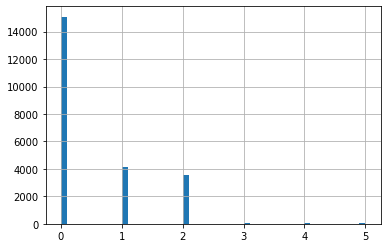

In [167]:
data['balcony'].hist(bins=50)
plt.show()

In [168]:
data['balcony'].value_counts()

0.000    15088
1.000     4168
2.000     3543
4.000       88
3.000       68
5.000       23
Name: balcony, dtype: int64

<b> Теперь данные больше похожи на реалистичные. Пропуски устранены. </b>

### `locality_name`

In [169]:
data[data['locality_name'].isna()].head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3.000,8600000.000,81.700,2016-04-15,3.000,3.550,5.000,50.800,2.000,0.000,...,8.800,0.000,NaN,23478.000,4258.000,0.000,NaN,0.000,NaN,147.000
2033,6.000,5398000.000,80.000,2017-05-30,3.000,2.650,4.000,42.600,2.000,0.000,...,18.600,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.000
2603,20.000,3351765.000,42.700,2015-09-20,1.000,2.650,24.000,15.600,3.000,0.000,...,10.700,0.000,NaN,22041.000,17369.000,0.000,NaN,1.000,374.000,276.000
2632,2.000,5130593.000,62.400,2015-10-11,2.000,2.650,24.000,33.100,21.000,0.000,...,8.200,0.000,NaN,22041.000,17369.000,0.000,NaN,1.000,374.000,256.000
3574,10.000,4200000.000,46.500,2016-05-28,2.000,2.650,5.000,30.800,5.000,0.000,...,6.500,0.000,NaN,27419.000,8127.000,0.000,NaN,1.000,603.000,45.000
4151,17.000,17600000.000,89.500,2014-12-09,2.000,3.000,8.000,39.620,7.000,0.000,...,13.380,0.000,NaN,25054.000,3902.000,1.000,485.000,3.000,722.000,869.000
4189,7.000,9200000.000,80.000,2015-12-10,3.000,4.000,4.000,52.300,3.000,0.000,...,10.400,0.000,NaN,21774.000,3039.000,1.000,690.000,1.000,953.000,223.000
4670,1.000,5500000.000,83.000,2015-08-14,3.000,2.650,7.000,46.480,6.000,0.000,...,14.110,0.000,NaN,26534.000,5382.000,1.000,446.000,1.000,376.000,350.000
5343,19.000,13540000.000,85.500,2016-01-20,3.000,2.650,7.000,59.100,5.000,0.000,...,8.300,4.000,NaN,10556.000,9538.000,1.000,67.000,0.000,NaN,303.000
5707,7.000,3700000.000,30.000,2016-04-29,1.000,2.650,24.000,20.000,23.000,0.000,...,5.100,0.000,NaN,21460.000,16788.000,0.000,NaN,1.000,170.000,49.000


In [170]:
len(data[data['locality_name'].isna()])

48

У 48 квартир отсутствует название населенного пункта. Вероятно, причиной этому стали технические ошибки. Заполнить пропуски представляется невозможным даже если вычислить расстояние до, например, аэропорта и сравнить это значение с другими н.п. Чтобы эти строки не мешали при анализе, проще всего их будет удалить. 

In [171]:
data = data.dropna(subset=['locality_name'])

In [172]:
data[data['locality_name'].isna()].head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [173]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [174]:
len(data['locality_name'].unique())

363

In [175]:
data['locality_name'] = data['locality_name'].str.replace('посёлок ', "поселок ")

In [176]:
data['locality_name'] = data['locality_name'].str.lower()

In [177]:
data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет

In [178]:
data['locality_name'] = data['locality_name'].str.replace('поселок ','').str.replace('городской ','').str.replace('деревня ','').str.replace('городского ','').str.replace('типа ','').str.replace('садовое ', '').str.replace('товарищество ', '').str.replace('село ', '').str.replace('село ', '').str.replace('станции ', '').str.replace('садоводческое ', '').str.replace('некоммерческое ', '').str.replace('форт ', '').str.replace('при ', '').str.replace('железнодорожной ', '').str.replace('коттеджный ', '').str.replace('пансионат ', '')  

In [179]:
data['locality_name'].unique()

array(['санкт-петербург', 'шушары', 'янино-1', 'парголово', 'мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', 'кудрово',
       'коммунар', 'колпино', 'красный бор', 'гатчина', 'фёдоровское',
       'выборг', 'кронштадт', 'кировск', 'новое девяткино',
       'металлострой', 'лебяжье', 'сиверский', 'молодцово',
       'кузьмоловский', 'новая ропша', 'павловск', 'пикколово',
       'всеволожск', 'волхов', 'кингисепп', 'приозерск', 'сестрорецк',
       'куттузи', 'аннино', 'ефимовский', 'плодовое', 'заклинье',
       'торковичи', 'первомайское', 'красное село', 'понтонный',
       'сясьстрой', 'старая', 'лесколово', 'новый свет', 'сланцы',
       'путилово', 'ивангород', 'шлиссельбург', 'никольское',
       'зеленогорск', 'сосновый бор', 'оржицы', 'кальтино', 'романовка',
       'бугры', 'рощино', 'кириши', 'луга', 'волосово', 'отрадное',
       'павлово', 'оредеж', 'копорье', 'молодёжное', 'тихвин', 'победа',
       'нурма', 'синявино', 'тосно', 'стрельна', 'бокситогорск',

In [180]:
len(data['locality_name'].unique())

304

<b> Неявных дупликатов больше не видно. Пропуски также устранены. </b>

### `airports_nearest`

In [181]:
len(data[data['airports_nearest'].isna()])

5366

In [182]:
data[data['airports_nearest'].isna()].head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10.000,2890000.000,30.400,2018-09-10,1.000,2.650,12.000,14.400,5.000,0.000,...,9.100,0.000,янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.000
8,20.000,2900000.000,33.160,2018-05-23,1.000,2.650,27.000,15.430,26.000,0.000,...,8.810,0.000,мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.000
12,10.000,3890000.000,54.000,2016-06-30,2.000,2.650,5.000,30.000,5.000,0.000,...,9.000,0.000,сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.000
22,20.000,5000000.000,58.000,2017-04-24,2.000,2.750,25.000,30.000,15.000,0.000,...,11.000,2.000,кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.000
30,12.000,2200000.000,32.800,2018-02-19,1.000,2.650,9.000,18.368,2.000,0.000,...,5.576,0.000,коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.000
37,10.000,1990000.000,45.800,2017-10-28,2.000,2.500,5.000,25.648,1.000,0.000,...,7.786,0.000,красный бор,NaN,NaN,NaN,NaN,NaN,NaN,196.000
38,10.000,3150000.000,40.000,2018-03-29,1.000,2.750,18.000,16.300,9.000,0.000,...,11.600,0.000,мурино,NaN,NaN,NaN,NaN,NaN,NaN,103.000
47,17.000,3600000.000,56.100,2018-10-18,3.000,2.650,4.000,42.500,3.000,0.000,...,5.700,1.000,гатчина,NaN,NaN,NaN,NaN,NaN,NaN,179.000
60,3.000,2740000.000,35.000,2018-01-01,1.000,2.650,12.000,19.600,8.000,0.000,...,5.950,0.000,мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.000
62,0.000,4800000.000,78.600,2017-09-17,3.000,2.800,9.000,48.800,5.000,0.000,...,11.900,2.000,сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.000


In [183]:
data['airports_nearest'].describe()

count   17564.000
mean    28804.077
std     12636.129
min         0.000
25%     18574.750
50%     26736.500
75%     37275.500
max     84869.000
Name: airports_nearest, dtype: float64

Можно попробовать посчитать медианное значение расстояния до аэропорта у каждого населенного пункта и добавить это значение в недостающие пропуски. 

In [184]:
data.groupby('locality_name')['airports_nearest'].median().sort_values().head(30)

locality_name
александровская   12896.500
пушкин            15787.000
шушары            17429.000
павловск          20529.500
петро-славянка    20605.000
красное село      25715.500
металлострой      25760.000
колпино           26232.000
усть-ижора        26510.500
санкт-петербург   26736.000
стрельна          28317.000
понтонный         30642.000
сапёрный          34147.500
петергоф          39254.000
ломоносов         48415.500
левашово          52693.000
парголово         53426.000
лисий нос         55909.000
песочный          56095.000
сестрорецк        56696.000
белоостров        57769.000
репино            62111.000
кронштадт         67847.000
зеленогорск       72282.000
молодёжное        84665.000
агалатово               NaN
алексеевка              NaN
аннино                  NaN
аро                     NaN
барышево                NaN
Name: airports_nearest, dtype: float64

In [185]:
data['locality_name'].value_counts()

санкт-петербург     15226
мурино                554
кудрово               451
шушары                428
всеволожск            381
                    ...  
старое хинколово        1
малая романовка         1
алексеевка              1
плоское                 1
хапо-ое                 1
Name: locality_name, Length: 304, dtype: int64

In [186]:
data.query('locality_name == "мурино"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8,20.000,2900000.000,33.160,2018-05-23,1.000,2.650,27.000,15.430,26.000,0.000,...,8.810,0.000,мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.000
38,10.000,3150000.000,40.000,2018-03-29,1.000,2.750,18.000,16.300,9.000,0.000,...,11.600,0.000,мурино,NaN,NaN,NaN,NaN,NaN,NaN,103.000
60,3.000,2740000.000,35.000,2018-01-01,1.000,2.650,12.000,19.600,8.000,0.000,...,5.950,0.000,мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.000
66,6.000,3450000.000,34.000,2015-12-16,1.000,2.600,17.000,17.400,8.000,0.000,...,11.500,2.000,мурино,NaN,NaN,NaN,NaN,NaN,NaN,186.000
133,12.000,3150000.000,31.000,2018-03-23,1.000,2.650,25.000,17.360,6.000,0.000,...,5.270,0.000,мурино,NaN,NaN,NaN,NaN,NaN,NaN,78.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23413,18.000,6350000.000,73.000,2017-04-21,2.000,2.700,16.000,40.880,13.000,0.000,...,12.410,1.000,мурино,NaN,NaN,NaN,NaN,NaN,NaN,566.000
23461,11.000,3195000.000,37.000,2017-06-14,1.000,2.650,27.000,18.000,16.000,0.000,...,10.000,2.000,мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.000
23472,10.000,3750000.000,41.500,2018-10-15,1.000,2.800,22.000,15.600,13.000,0.000,...,11.200,2.000,мурино,NaN,NaN,NaN,NaN,NaN,NaN,74.000
23539,10.000,3600000.000,35.600,2017-07-12,1.000,2.750,25.000,17.000,7.000,0.000,...,12.000,0.000,мурино,NaN,NaN,NaN,NaN,NaN,NaN,35.000


In [187]:
data.query('locality_name == "агалатово"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1151,8.000,1830000.000,32.000,2018-02-01,1.000,2.700,4.000,18.000,4.000,0.000,...,7.000,0.000,агалатово,NaN,NaN,NaN,NaN,NaN,NaN,42.000
4307,5.000,5300000.000,74.000,2017-04-01,3.000,2.500,4.000,41.440,4.000,0.000,...,12.580,0.000,агалатово,NaN,NaN,NaN,NaN,NaN,NaN,624.000
4466,3.000,4740000.000,59.000,2017-09-28,2.000,2.650,5.000,31.000,2.000,0.000,...,11.200,0.000,агалатово,NaN,NaN,NaN,NaN,NaN,NaN,5.000
10574,9.000,2400000.000,31.700,2019-04-25,1.000,2.650,5.000,18.000,4.000,0.000,...,6.000,0.000,агалатово,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

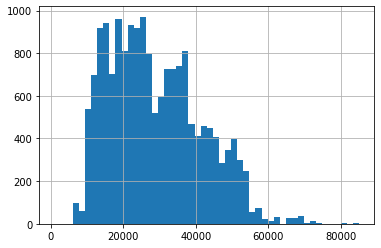

In [188]:
data['airports_nearest'].hist(bins=50, range=(1000,85000))
plt.show()

<AxesSubplot:>

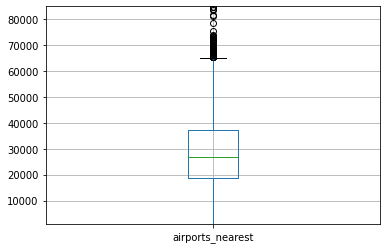

In [189]:
plt.ylim(1000,85000)
data.boxplot('airports_nearest')
plt.show()

По всей видимости, заполнять пропуски в `airports_nearest` медианными значениями в зависимости от населенных пунктов не имеет смысла - к примеру, в `мурино` продавалось 576 квартир, и у каждой из них отстуствует значение в 'airports_nearest', в `агалатово` - 4 квартиры. Расстояние известно только у 25 населенных пунктов из 305. При этом медиана равна прим. 27 км. Похожая удаленность - у шести населенных пунктов, в том числе Санкт-Петербурга, где расположено большинство квартир.Поэтому остается два варианта: удалить пропуски (однако это более 5 тысяч строк) либо просто заменить их на медианное значение. Но сначала нужно проверить значения на аномалии.

In [190]:
data.query('airports_nearest <= 1000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0.000,7000000.000,34.700,2018-09-23,1.000,2.700,9.000,19.800,3.000,0.000,...,6.000,2.000,санкт-петербург,0.000,22801.000,0.000,NaN,0.000,NaN,60.000


Сложно представить в продажу квартиры в 0 метрах от аэропорта. От строки можно избавиться.

In [191]:
data.loc[data['airports_nearest'] <= 1000] = None

In [192]:
data = data.dropna(subset=['locality_name'])

In [193]:
data.query('airports_nearest >= 75000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
577,7.000,4000000.000,59.000,2017-07-23,3.000,2.500,5.000,37.000,1.000,0.000,...,7.000,0.000,молодёжное,84665.000,65764.000,0.000,NaN,0.000,NaN,NaN
939,17.000,3015000.000,31.200,2019-04-16,1.000,2.500,3.000,17.500,1.000,0.000,...,5.800,0.000,зеленогорск,75646.000,56745.000,0.000,NaN,1.000,347.000,NaN
2974,13.000,3200000.000,46.300,2018-03-31,2.000,2.500,3.000,29.200,2.000,0.000,...,7.000,1.000,зеленогорск,81355.000,62454.000,0.000,NaN,0.000,NaN,205.000
4441,6.000,2300000.000,31.000,2016-05-26,1.000,2.650,3.000,12.000,1.000,0.000,...,9.000,0.000,зеленогорск,78527.000,59626.000,0.000,NaN,0.000,NaN,232.000
5218,15.000,3650000.000,53.800,2018-09-24,3.000,2.500,4.000,36.900,3.000,0.000,...,5.200,0.000,молодёжное,83758.000,64857.000,0.000,NaN,0.000,NaN,121.000
5340,19.000,3600000.000,50.600,2019-03-19,2.000,2.500,5.000,29.900,4.000,0.000,...,7.000,1.000,молодёжное,84853.000,65952.000,0.000,NaN,0.000,NaN,NaN
9640,8.000,4200000.000,51.400,2014-12-10,2.000,2.550,5.000,31.000,2.000,0.000,...,6.000,1.000,молодёжное,84869.000,65968.000,0.000,NaN,0.000,NaN,1194.000
18884,15.000,3600000.000,57.600,2019-02-08,3.000,2.550,3.000,41.300,2.000,0.000,...,6.500,1.000,зеленогорск,81607.000,62706.000,0.000,NaN,0.000,NaN,13.000
20746,1.000,3300000.000,43.500,2016-02-16,2.000,2.550,4.000,27.200,2.000,0.000,...,5.000,1.000,молодёжное,84006.000,65105.000,0.000,NaN,0.000,NaN,1043.000


In [194]:
data.query('locality_name == "молодёжное"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
577,7.000,4000000.000,59.000,2017-07-23,3.000,2.500,5.000,37.000,1.000,0.000,...,7.000,0.000,молодёжное,84665.000,65764.000,0.000,NaN,0.000,NaN,NaN
5218,15.000,3650000.000,53.800,2018-09-24,3.000,2.500,4.000,36.900,3.000,0.000,...,5.200,0.000,молодёжное,83758.000,64857.000,0.000,NaN,0.000,NaN,121.000
5340,19.000,3600000.000,50.600,2019-03-19,2.000,2.500,5.000,29.900,4.000,0.000,...,7.000,1.000,молодёжное,84853.000,65952.000,0.000,NaN,0.000,NaN,NaN
9640,8.000,4200000.000,51.400,2014-12-10,2.000,2.550,5.000,31.000,2.000,0.000,...,6.000,1.000,молодёжное,84869.000,65968.000,0.000,NaN,0.000,NaN,1194.000
20746,1.000,3300000.000,43.500,2016-02-16,2.000,2.550,4.000,27.200,2.000,0.000,...,5.000,1.000,молодёжное,84006.000,65105.000,0.000,NaN,0.000,NaN,1043.000


In [195]:
data.query('locality_name == "зеленогорск"').sort_values(by='airports_nearest')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15037,9.000,23000000.000,71.000,2017-05-15,2.000,3.300,4.000,31.000,2.000,0.000,...,24.500,2.000,зеленогорск,70016.000,51115.000,0.000,NaN,0.000,NaN,90.000
14185,10.000,17212500.000,76.500,2015-09-03,2.000,2.650,4.000,30.200,2.000,0.000,...,23.900,0.000,зеленогорск,70016.000,51115.000,0.000,NaN,0.000,NaN,NaN
4906,11.000,5500000.000,49.000,2017-10-24,2.000,2.500,5.000,29.000,3.000,0.000,...,8.500,1.000,зеленогорск,71529.000,52628.000,3.000,296.000,2.000,521.000,25.000
3477,4.000,6400000.000,67.200,2016-10-10,3.000,2.650,6.000,43.000,1.000,0.000,...,12.000,0.000,зеленогорск,71597.000,52696.000,3.000,112.000,1.000,408.000,316.000
9679,7.000,4500000.000,46.300,2017-06-07,2.000,2.600,9.000,26.400,4.000,0.000,...,7.300,0.000,зеленогорск,71597.000,52696.000,3.000,112.000,1.000,408.000,124.000
2036,19.000,6100000.000,50.000,2018-03-24,2.000,2.600,5.000,29.000,5.000,0.000,...,9.000,1.000,зеленогорск,71618.000,52717.000,3.000,37.000,1.000,926.000,72.000
9493,0.000,5350000.000,47.500,2017-06-14,2.000,2.550,5.000,29.900,4.000,0.000,...,8.000,0.000,зеленогорск,71618.000,52717.000,3.000,37.000,1.000,926.000,394.000
7324,13.000,5000000.000,46.300,2017-09-12,2.000,2.550,9.000,30.100,5.000,0.000,...,8.300,0.000,зеленогорск,71869.000,52968.000,3.000,174.000,2.000,561.000,28.000
302,6.000,3500000.000,31.000,2016-04-05,1.000,2.550,5.000,17.500,1.000,0.000,...,5.400,0.000,зеленогорск,72005.000,53104.000,3.000,92.000,1.000,571.000,168.000
10541,9.000,3850000.000,41.400,2018-09-06,2.000,2.500,3.000,28.000,1.000,0.000,...,5.100,0.000,зеленогорск,72033.000,53132.000,3.000,37.000,1.000,591.000,207.000


Наиболее удаленные от аэропорта квартиры продаются в Зеленогорске и Молодежном. Судя по карте, это соответствует действительности. Данные можем оставить.

In [196]:
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].median())

<AxesSubplot:>

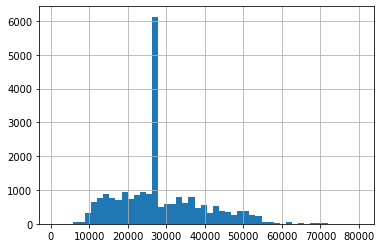

In [197]:
data['airports_nearest'].hist(bins=50, range =(1000,80000))
plt.show()

<b> Из-за того, что в датафрейме большинство значений уникальны (трудно представить, что в базе окажется много квартир на перепродаже из одного дома), а в данных было слишком много пропусков, которым было присвоено одно значение, медиана стала видна наиболее отчетливо. Одно аномальное значение также было устранено. </b>

### `cityCenters_nearest`

In [198]:
data['cityCenters_nearest'].describe()

count   17586.000
mean    14195.238
std      8635.028
min       181.000
25%      9229.000
50%     13085.000
75%     16293.000
max     65968.000
Name: cityCenters_nearest, dtype: float64

In [199]:
len(data[data['cityCenters_nearest'].isna()])

5343

In [200]:
data[data['cityCenters_nearest'].isna()].head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10.000,2890000.000,30.400,2018-09-10,1.000,2.650,12.000,14.400,5.000,0.000,...,9.100,0.000,янино-1,26737.000,NaN,NaN,NaN,NaN,NaN,55.000
8,20.000,2900000.000,33.160,2018-05-23,1.000,2.650,27.000,15.430,26.000,0.000,...,8.810,0.000,мурино,26737.000,NaN,NaN,NaN,NaN,NaN,189.000
12,10.000,3890000.000,54.000,2016-06-30,2.000,2.650,5.000,30.000,5.000,0.000,...,9.000,0.000,сертолово,26737.000,NaN,NaN,NaN,NaN,NaN,90.000
22,20.000,5000000.000,58.000,2017-04-24,2.000,2.750,25.000,30.000,15.000,0.000,...,11.000,2.000,кудрово,26737.000,NaN,NaN,NaN,NaN,NaN,60.000
30,12.000,2200000.000,32.800,2018-02-19,1.000,2.650,9.000,18.368,2.000,0.000,...,5.576,0.000,коммунар,26737.000,NaN,NaN,NaN,NaN,NaN,63.000
37,10.000,1990000.000,45.800,2017-10-28,2.000,2.500,5.000,25.648,1.000,0.000,...,7.786,0.000,красный бор,26737.000,NaN,NaN,NaN,NaN,NaN,196.000
38,10.000,3150000.000,40.000,2018-03-29,1.000,2.750,18.000,16.300,9.000,0.000,...,11.600,0.000,мурино,26737.000,NaN,NaN,NaN,NaN,NaN,103.000
47,17.000,3600000.000,56.100,2018-10-18,3.000,2.650,4.000,42.500,3.000,0.000,...,5.700,1.000,гатчина,26737.000,NaN,NaN,NaN,NaN,NaN,179.000
60,3.000,2740000.000,35.000,2018-01-01,1.000,2.650,12.000,19.600,8.000,0.000,...,5.950,0.000,мурино,26737.000,NaN,NaN,NaN,NaN,NaN,11.000
62,0.000,4800000.000,78.600,2017-09-17,3.000,2.800,9.000,48.800,5.000,0.000,...,11.900,2.000,сертолово,26737.000,NaN,NaN,NaN,NaN,NaN,5.000


In [201]:
data.groupby('locality_name')['cityCenters_nearest'].median().sort_values().head(30)

locality_name
санкт-петербург   12220.500
парголово         19325.000
стрельна          23506.000
шушары            24213.000
левашово          25727.000
песочный          25867.000
петро-славянка    27165.000
александровская   27468.000
металлострой      27629.000
пушкин            27959.000
усть-ижора        28222.500
лисий нос         28226.000
красное село      29140.500
колпино           32018.000
понтонный         32354.000
павловск          32683.000
петергоф          33771.000
сестрорецк        34775.000
сапёрный          35859.500
белоостров        38868.000
репино            43210.000
кронштадт         49572.500
ломоносов         51677.000
зеленогорск       53381.000
молодёжное        65764.000
агалатово               NaN
алексеевка              NaN
аннино                  NaN
аро                     NaN
барышево                NaN
Name: cityCenters_nearest, dtype: float64

Количество пропусков практически полностью совпадает с пропусками в `airports_nearest`. Судя по первым 20 строкам, пропуска наблюдаются в тех же строках. Тогда и способ их заполнения будет тем же. 

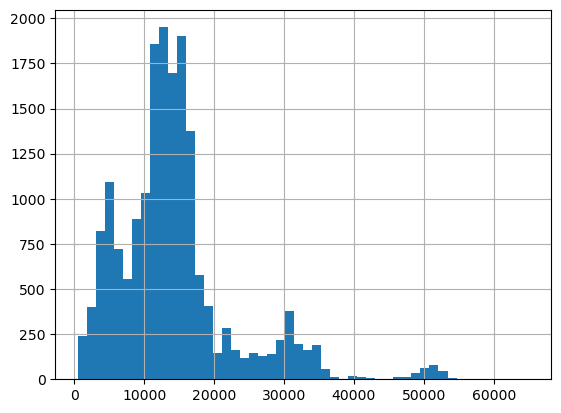

In [26]:
data['cityCenters_nearest'].hist(bins=50, range=(500,65000))
plt.show()

<AxesSubplot:>

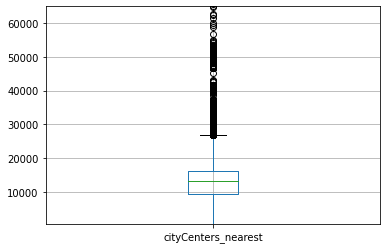

In [203]:
plt.ylim(500,65000)
data.boxplot('cityCenters_nearest')
plt.show()

In [204]:
data.query('cityCenters_nearest <= 500')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
492,18.000,95000000.000,216.000,2017-12-05,4.000,3.000,5.000,86.000,4.000,0.000,...,77.000,0.000,санкт-петербург,21740.000,436.000,2.000,138.000,3.000,620.000,14.000
1109,1.000,34878556.000,95.800,2014-12-09,2.000,2.650,6.000,58.300,5.000,1.000,...,20.000,1.000,санкт-петербург,21860.000,318.000,2.000,160.000,3.000,569.000,1572.000
1182,1.000,5800000.000,33.600,2016-03-10,1.000,3.700,7.000,22.800,4.000,0.000,...,6.600,0.000,санкт-петербург,21632.000,208.000,3.000,304.000,3.000,503.000,167.000
1934,18.000,9590000.000,108.000,2017-05-23,2.000,3.300,5.000,59.000,2.000,0.000,...,11.000,0.000,санкт-петербург,21908.000,287.000,3.000,359.000,3.000,290.000,69.000
2291,6.000,27000000.000,173.600,2015-06-11,5.000,3.300,5.000,125.500,4.000,0.000,...,15.000,1.000,санкт-петербург,21776.000,399.000,2.000,65.000,3.000,562.000,388.000
2609,20.000,7200000.000,80.000,2017-08-24,3.000,2.800,4.000,43.000,1.000,0.000,...,8.000,0.000,санкт-петербург,21832.000,399.000,3.000,415.000,2.000,516.000,11.000
2988,2.000,5300000.000,49.000,2016-11-09,3.000,2.650,3.000,30.000,3.000,0.000,...,7.000,0.000,санкт-петербург,21919.000,467.000,2.000,256.000,3.000,305.000,232.000
3800,12.000,6900000.000,47.600,2015-07-22,2.000,2.650,5.000,28.200,5.000,0.000,...,8.200,0.000,санкт-петербург,22074.000,472.000,3.000,319.000,3.000,142.000,398.000
5518,8.000,13900000.000,185.000,2019-03-30,5.000,2.650,3.000,103.600,2.000,0.000,...,12.000,0.000,санкт-петербург,21919.000,467.000,2.000,256.000,3.000,305.000,NaN
7726,20.000,50000000.000,93.000,2019-04-18,2.000,2.650,7.000,40.000,4.000,0.000,...,28.000,2.000,санкт-петербург,21860.000,318.000,2.000,160.000,3.000,569.000,NaN


Квартиры, расположенные менее чем в 500 м. от центра города, все расположены в Санкт-Петербурге, равноудалены от аэропорта (ок. 21-22 км.), имеют вокруг 2-3 парка. Данные кажутся неискаженными. 

In [205]:
data.query('cityCenters_nearest >= 55000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
577,7.000,4000000.000,59.000,2017-07-23,3.000,2.500,5.000,37.000,1.000,0.000,...,7.000,0.000,молодёжное,84665.000,65764.000,0.000,NaN,0.000,NaN,NaN
939,17.000,3015000.000,31.200,2019-04-16,1.000,2.500,3.000,17.500,1.000,0.000,...,5.800,0.000,зеленогорск,75646.000,56745.000,0.000,NaN,1.000,347.000,NaN
2974,13.000,3200000.000,46.300,2018-03-31,2.000,2.500,3.000,29.200,2.000,0.000,...,7.000,1.000,зеленогорск,81355.000,62454.000,0.000,NaN,0.000,NaN,205.000
4441,6.000,2300000.000,31.000,2016-05-26,1.000,2.650,3.000,12.000,1.000,0.000,...,9.000,0.000,зеленогорск,78527.000,59626.000,0.000,NaN,0.000,NaN,232.000
5218,15.000,3650000.000,53.800,2018-09-24,3.000,2.500,4.000,36.900,3.000,0.000,...,5.200,0.000,молодёжное,83758.000,64857.000,0.000,NaN,0.000,NaN,121.000
5340,19.000,3600000.000,50.600,2019-03-19,2.000,2.500,5.000,29.900,4.000,0.000,...,7.000,1.000,молодёжное,84853.000,65952.000,0.000,NaN,0.000,NaN,NaN
9640,8.000,4200000.000,51.400,2014-12-10,2.000,2.550,5.000,31.000,2.000,0.000,...,6.000,1.000,молодёжное,84869.000,65968.000,0.000,NaN,0.000,NaN,1194.000
11244,8.000,4250000.000,32.000,2018-02-04,1.000,2.650,2.000,20.000,2.000,0.000,...,7.000,0.000,зеленогорск,72713.000,59052.000,3.000,148.000,1.000,671.000,24.000
16569,13.000,3200000.000,52.800,2017-06-20,2.000,2.550,5.000,29.900,3.000,0.000,...,8.300,0.000,ломоносов,53042.000,61495.000,2.000,223.000,0.000,NaN,240.000
18884,15.000,3600000.000,57.600,2019-02-08,3.000,2.550,3.000,41.300,2.000,0.000,...,6.500,1.000,зеленогорск,81607.000,62706.000,0.000,NaN,0.000,NaN,13.000


In [206]:
data.query('locality_name == "молодёжное"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
577,7.000,4000000.000,59.000,2017-07-23,3.000,2.500,5.000,37.000,1.000,0.000,...,7.000,0.000,молодёжное,84665.000,65764.000,0.000,NaN,0.000,NaN,NaN
5218,15.000,3650000.000,53.800,2018-09-24,3.000,2.500,4.000,36.900,3.000,0.000,...,5.200,0.000,молодёжное,83758.000,64857.000,0.000,NaN,0.000,NaN,121.000
5340,19.000,3600000.000,50.600,2019-03-19,2.000,2.500,5.000,29.900,4.000,0.000,...,7.000,1.000,молодёжное,84853.000,65952.000,0.000,NaN,0.000,NaN,NaN
9640,8.000,4200000.000,51.400,2014-12-10,2.000,2.550,5.000,31.000,2.000,0.000,...,6.000,1.000,молодёжное,84869.000,65968.000,0.000,NaN,0.000,NaN,1194.000
20746,1.000,3300000.000,43.500,2016-02-16,2.000,2.550,4.000,27.200,2.000,0.000,...,5.000,1.000,молодёжное,84006.000,65105.000,0.000,NaN,0.000,NaN,1043.000


In [207]:
data.query('locality_name == "зеленогорск"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
302,6.000,3500000.000,31.000,2016-04-05,1.000,2.550,5.000,17.500,1.000,0.000,...,5.400,0.000,зеленогорск,72005.000,53104.000,3.000,92.000,1.000,571.000,168.000
376,18.000,8400000.000,84.000,2018-06-26,2.000,2.750,3.000,41.000,1.000,0.000,...,13.000,0.000,зеленогорск,73827.000,54926.000,0.000,NaN,0.000,NaN,201.000
939,17.000,3015000.000,31.200,2019-04-16,1.000,2.500,3.000,17.500,1.000,0.000,...,5.800,0.000,зеленогорск,75646.000,56745.000,0.000,NaN,1.000,347.000,NaN
2036,19.000,6100000.000,50.000,2018-03-24,2.000,2.600,5.000,29.000,5.000,0.000,...,9.000,1.000,зеленогорск,71618.000,52717.000,3.000,37.000,1.000,926.000,72.000
2974,13.000,3200000.000,46.300,2018-03-31,2.000,2.500,3.000,29.200,2.000,0.000,...,7.000,1.000,зеленогорск,81355.000,62454.000,0.000,NaN,0.000,NaN,205.000
3477,4.000,6400000.000,67.200,2016-10-10,3.000,2.650,6.000,43.000,1.000,0.000,...,12.000,0.000,зеленогорск,71597.000,52696.000,3.000,112.000,1.000,408.000,316.000
3936,10.000,4250000.000,38.000,2017-11-30,1.000,2.700,3.000,20.000,3.000,0.000,...,8.000,0.000,зеленогорск,72078.000,53177.000,3.000,533.000,2.000,123.000,179.000
4441,6.000,2300000.000,31.000,2016-05-26,1.000,2.650,3.000,12.000,1.000,0.000,...,9.000,0.000,зеленогорск,78527.000,59626.000,0.000,NaN,0.000,NaN,232.000
4906,11.000,5500000.000,49.000,2017-10-24,2.000,2.500,5.000,29.000,3.000,0.000,...,8.500,1.000,зеленогорск,71529.000,52628.000,3.000,296.000,2.000,521.000,25.000
6247,8.000,9600000.000,180.100,2017-03-07,4.000,2.750,2.000,100.000,2.000,0.000,...,19.500,1.000,зеленогорск,73547.000,54646.000,0.000,NaN,1.000,1037.000,496.000


In [208]:
data.query('locality_name == "ломоносов"').sort_values(by='cityCenters_nearest')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8651,17.000,7150000.000,81.100,2019-03-19,4.000,2.500,5.000,62.500,3.000,0.000,...,9.000,0.000,ломоносов,48607.000,36816.000,0.000,NaN,2.000,118.000,NaN
18154,15.000,3600000.000,49.100,2018-02-01,2.000,2.500,5.000,28.100,5.000,0.000,...,8.500,2.000,ломоносов,48607.000,36816.000,0.000,NaN,2.000,118.000,6.000
6345,8.000,3400000.000,51.000,2017-05-24,2.000,2.550,5.000,29.000,4.000,0.000,...,10.600,0.000,ломоносов,48607.000,36816.000,0.000,NaN,2.000,118.000,237.000
21165,0.000,7400000.000,84.200,2018-02-01,4.000,2.500,5.000,60.400,2.000,0.000,...,8.000,0.000,ломоносов,48607.000,36816.000,0.000,NaN,2.000,118.000,114.000
1318,13.000,2450000.000,33.700,2018-03-14,1.000,2.500,9.000,18.100,7.000,0.000,...,5.500,1.000,ломоносов,48692.000,36973.000,0.000,NaN,2.000,218.000,79.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23014,8.000,2250000.000,28.300,2017-08-04,1.000,3.700,3.000,10.900,2.000,0.000,...,7.300,0.000,ломоносов,49713.000,53138.000,2.000,170.000,3.000,110.000,424.000
1556,3.000,4900000.000,84.000,2017-07-18,3.000,2.650,3.000,56.000,1.000,0.000,...,10.000,0.000,ломоносов,49870.000,53294.000,2.000,241.000,3.000,190.000,623.000
23123,0.000,1800000.000,32.000,2018-07-17,1.000,2.650,2.000,17.000,1.000,0.000,...,6.000,0.000,ломоносов,56896.000,60223.000,1.000,17.000,0.000,NaN,147.000
16569,13.000,3200000.000,52.800,2017-06-20,2.000,2.550,5.000,29.900,3.000,0.000,...,8.300,0.000,ломоносов,53042.000,61495.000,2.000,223.000,0.000,NaN,240.000


In [209]:
data.query('locality_name == "ломоносов"').sort_values(by='airports_nearest')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
7528,13.000,3600000.000,41.000,2019-03-12,2.000,2.650,5.000,27.000,3.000,0.000,...,5.000,1.000,ломоносов,26737.000,NaN,NaN,NaN,NaN,NaN,45.000
5003,10.000,2800000.000,35.300,2016-07-01,1.000,2.650,9.000,17.400,2.000,0.000,...,8.800,0.000,ломоносов,46502.000,49927.000,0.000,NaN,1.000,672.000,52.000
21566,1.000,6100000.000,73.000,2019-03-18,3.000,2.650,9.000,42.000,9.000,0.000,...,12.000,1.000,ломоносов,46502.000,49927.000,0.000,NaN,1.000,672.000,3.000
13166,2.000,3820000.000,60.500,2015-03-19,3.000,2.550,9.000,43.500,1.000,0.000,...,5.500,2.000,ломоносов,46559.000,49984.000,0.000,NaN,0.000,NaN,897.000
856,5.000,3900000.000,60.500,2018-03-26,3.000,2.500,9.000,43.300,4.000,0.000,...,6.000,2.000,ломоносов,46559.000,49984.000,0.000,NaN,0.000,NaN,12.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19729,4.000,1900000.000,29.000,2017-09-04,1.000,2.650,5.000,18.000,1.000,0.000,...,4.000,0.000,ломоносов,49663.000,53088.000,2.000,417.000,3.000,329.000,53.000
23014,8.000,2250000.000,28.300,2017-08-04,1.000,3.700,3.000,10.900,2.000,0.000,...,7.300,0.000,ломоносов,49713.000,53138.000,2.000,170.000,3.000,110.000,424.000
1556,3.000,4900000.000,84.000,2017-07-18,3.000,2.650,3.000,56.000,1.000,0.000,...,10.000,0.000,ломоносов,49870.000,53294.000,2.000,241.000,3.000,190.000,623.000
16569,13.000,3200000.000,52.800,2017-06-20,2.000,2.550,5.000,29.900,3.000,0.000,...,8.300,0.000,ломоносов,53042.000,61495.000,2.000,223.000,0.000,NaN,240.000


Что касается наиболее удаленных от центра квартир, здесь, опять же, превалируют квартиры из Молодежного и Зеленогорска, с которыми, как и в прошлом признаке, все в порядке. К ним добавились квартиры из Ломоносова, площадь которого 35 кв.км. С этими данными, судя по всему, все тоже в порядке - между сведениями в `cityCenters_nearest` и `airports_nearest` просматривается та же взаимосвязь, что и в, например, Зеленогорске - чем дальше от центра, тем дальше и аэропорт. 

In [210]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median())

<AxesSubplot:>

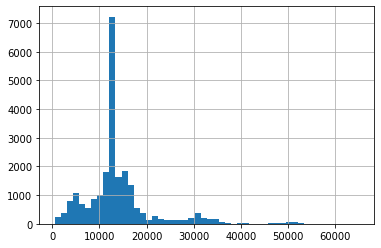

In [211]:
data['cityCenters_nearest'].hist(bins=50, range=(500,65000))
plt.show()

In [212]:
data['cityCenters_nearest'].describe()

count   22929.000
mean    13936.526
std      7576.817
min       181.000
25%     10900.000
50%     13085.000
75%     15250.000
max     65968.000
Name: cityCenters_nearest, dtype: float64

<b> Гистограмма схожа с `airports_nearest`- из-за уникальных значений в признаке доминирующим выглядит медианный показатель, который был присвоен всем пропускам. Аномалий не обнаружено. </b>

### `parks_around3000`

In [213]:
data[data['parks_around3000'].isna()].sort_values(by='parks_nearest')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10.000,2890000.000,30.400,2018-09-10,1.000,2.650,12.000,14.400,5.000,0.000,...,9.100,0.000,янино-1,26737.000,13085.000,NaN,NaN,NaN,NaN,55.000
8,20.000,2900000.000,33.160,2018-05-23,1.000,2.650,27.000,15.430,26.000,0.000,...,8.810,0.000,мурино,26737.000,13085.000,NaN,NaN,NaN,NaN,189.000
12,10.000,3890000.000,54.000,2016-06-30,2.000,2.650,5.000,30.000,5.000,0.000,...,9.000,0.000,сертолово,26737.000,13085.000,NaN,NaN,NaN,NaN,90.000
22,20.000,5000000.000,58.000,2017-04-24,2.000,2.750,25.000,30.000,15.000,0.000,...,11.000,2.000,кудрово,26737.000,13085.000,NaN,NaN,NaN,NaN,60.000
30,12.000,2200000.000,32.800,2018-02-19,1.000,2.650,9.000,18.368,2.000,0.000,...,5.576,0.000,коммунар,26737.000,13085.000,NaN,NaN,NaN,NaN,63.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16.000,2100000.000,62.800,2018-09-18,4.000,2.500,5.000,45.500,3.000,0.000,...,5.500,0.000,дзержинского,26737.000,13085.000,NaN,NaN,NaN,NaN,NaN
23692,2.000,1350000.000,30.000,2017-07-07,1.000,2.650,5.000,17.500,4.000,0.000,...,6.000,0.000,тихвин,26737.000,13085.000,NaN,NaN,NaN,NaN,413.000
23695,14.000,3100000.000,59.000,2018-01-15,3.000,2.650,5.000,38.000,4.000,0.000,...,8.500,0.000,тосно,26737.000,13085.000,NaN,NaN,NaN,NaN,45.000
23696,18.000,2500000.000,56.700,2018-02-11,2.000,2.650,3.000,29.700,1.000,0.000,...,9.639,0.000,рождествено,26737.000,13085.000,NaN,NaN,NaN,NaN,NaN


In [214]:
data['parks_around3000'].value_counts()

0.000    9774
1.000    5493
2.000    1691
3.000     629
Name: parks_around3000, dtype: int64

In [215]:
data.query('parks_nearest > 0 and parks_around3000 == False')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1590,3.000,7500000.000,70.000,2017-07-11,2.000,2.650,18.000,37.000,13.000,0.000,...,10.000,0.000,санкт-петербург,14878.000,9791.000,0.000,3064.000,1.000,264.000,4.000
10959,9.000,3000000.000,31.100,2017-03-21,1.000,2.650,5.000,17.700,2.000,0.000,...,5.500,0.000,санкт-петербург,14821.000,9734.000,0.000,3190.000,1.000,431.000,234.000
19208,17.000,14950000.000,187.000,2017-10-12,5.000,3.000,2.000,80.000,2.000,0.000,...,17.000,1.000,санкт-петербург,36805.000,8656.000,0.000,3013.000,3.000,537.000,49.000
19430,9.000,3900000.000,30.500,2018-02-22,1.000,2.600,5.000,16.500,1.000,0.000,...,5.500,0.000,санкт-петербург,14821.000,9734.000,0.000,3190.000,1.000,431.000,176.000


In [216]:
data.query('parks_around3000 > 0 and parks_nearest >= 3000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [217]:
data.groupby('parks_around3000')['parks_nearest'].count()

parks_around3000
0.000       4
1.000    5493
2.000    1691
3.000     629
Name: parks_nearest, dtype: int64

Аномальных значений не наблюдается. 

In [218]:
len(data[data['parks_around3000'].isna()])

5342

In [219]:
len(data[data['parks_nearest'].isna()])

15112

In [220]:
len(data[data['ponds_around3000'].isna()])

5342

In [221]:
len(data[data['ponds_nearest'].isna()])

14128

Те же 5,5 тыс. пропусков, что и в двух признаках до этого, а также в `ponds_around3000`. По всей видимости, пропуски означают отсутствие парков в радиусе 3 км., других вариантов не наблюдается. Возможно, строки с пропусками проще удалить, но это более 20% всего датафрейма, поэтому пропуски заменим нулевым значением как наиболее частотным среди имеющихся сведений. 

In [222]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)

In [223]:
data['parks_around3000'].value_counts()

0.000    15116
1.000     5493
2.000     1691
3.000      629
Name: parks_around3000, dtype: int64

<AxesSubplot:>

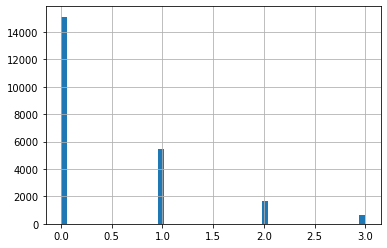

In [224]:
data['parks_around3000'].hist(bins=50, range=(0,3))
plt.show()

<b> У большинства квартир нет соседства с парками в ближайших 3 км. Та же картина наблюдалась и до заполнения пропусков. </b> 

### `parks_nearest`

In [225]:
data['parks_nearest'].describe()

count   7817.000
mean     490.159
std      341.892
min        1.000
25%      287.000
50%      454.000
75%      612.000
max     3190.000
Name: parks_nearest, dtype: float64

In [226]:
len(data[data['parks_nearest'].isna()])

15112

In [227]:
data.groupby('parks_around3000')['parks_nearest'].count()

parks_around3000
0.000       4
1.000    5493
2.000    1691
3.000     629
Name: parks_nearest, dtype: int64

<AxesSubplot:>

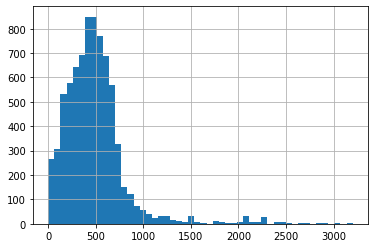

In [228]:
data['parks_nearest'].hist(bins=50, range=(1,3200))
plt.show()

<AxesSubplot:>

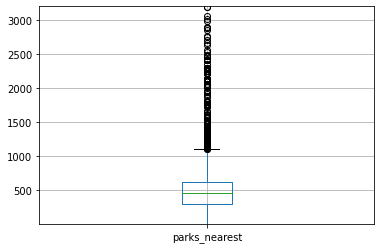

In [229]:
plt.ylim(1,3200)
data.boxplot('parks_nearest')
plt.show()

In [230]:
data.query('parks_nearest <= 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
189,0.000,6150000.000,62.000,2017-10-13,3.000,2.650,9.000,41.500,5.000,0.000,...,8.500,2.000,санкт-петербург,41954.000,12168.000,1.000,10.000,0.000,NaN,45.000
214,5.000,4150000.000,50.410,2017-07-20,2.000,2.500,9.000,31.100,8.000,0.000,...,7.000,1.000,санкт-петербург,41954.000,12168.000,1.000,10.000,0.000,NaN,274.000
2527,8.000,4690000.000,60.300,2016-03-05,2.000,2.500,5.000,28.000,2.000,0.000,...,7.900,0.000,кронштадт,69775.000,51500.000,3.000,9.000,3.000,345.000,146.000
4470,7.000,2750000.000,30.900,2017-12-19,1.000,2.650,9.000,15.000,3.000,0.000,...,8.000,0.000,санкт-петербург,41954.000,12168.000,1.000,10.000,0.000,NaN,45.000
7788,14.000,5550000.000,55.100,2017-06-25,2.000,2.700,7.000,33.600,3.000,0.000,...,7.100,1.000,санкт-петербург,43990.000,10661.000,2.000,10.000,1.000,786.000,88.000
9344,12.000,3000000.000,28.100,2017-07-25,1.000,2.500,9.000,17.000,1.000,0.000,...,5.600,0.000,санкт-петербург,12051.000,11665.000,1.000,7.000,1.000,780.000,440.000
11949,7.000,4500000.000,44.000,2017-11-24,2.000,2.600,9.000,30.000,7.000,0.000,...,7.000,0.000,санкт-петербург,11806.000,12292.000,1.000,3.000,1.000,508.000,82.000
14624,8.000,3770000.000,45.400,2019-03-20,2.000,2.650,9.000,28.430,2.000,0.000,...,6.900,0.000,санкт-петербург,43932.000,16436.000,1.000,1.000,0.000,NaN,42.000
15296,7.000,4950000.000,53.000,2018-07-10,2.000,2.500,9.000,33.000,9.000,0.000,...,6.800,0.000,санкт-петербург,41954.000,12168.000,1.000,10.000,0.000,NaN,62.000
19093,4.000,3000000.000,31.400,2018-10-19,1.000,2.500,9.000,15.900,2.000,0.000,...,8.100,0.000,санкт-петербург,41954.000,12168.000,1.000,10.000,0.000,NaN,36.000


In [231]:
data.query('locality_name == "кронштадт"').sort_values(by='parks_nearest').head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2527,8.000,4690000.000,60.300,2016-03-05,2.000,2.500,5.000,28.000,2.000,0.000,...,7.900,0.000,кронштадт,69775.000,51500.000,3.000,9.000,3.000,345.000,146.000
1896,0.000,5000000.000,59.200,2019-04-08,2.000,2.650,4.000,36.000,3.000,0.000,...,7.600,0.000,кронштадт,68501.000,50227.000,3.000,16.000,2.000,99.000,NaN
5428,8.000,3200000.000,36.500,2017-12-05,1.000,2.800,3.000,20.440,3.000,0.000,...,10.000,0.000,кронштадт,68254.000,49980.000,3.000,20.000,1.000,60.000,7.000
19055,11.000,3600000.000,44.000,2018-11-23,2.000,2.500,5.000,27.300,2.000,0.000,...,5.200,0.000,кронштадт,68720.000,50445.000,3.000,24.000,2.000,64.000,50.000
13545,7.000,2600000.000,31.100,2018-01-16,1.000,2.550,5.000,18.000,1.000,0.000,...,5.600,0.000,кронштадт,68872.000,50597.000,3.000,41.000,2.000,72.000,356.000
7377,0.000,17630000.000,168.000,2017-11-21,4.000,3.600,3.000,99.900,2.000,0.000,...,14.200,0.000,кронштадт,69706.000,51431.000,2.000,44.000,3.000,162.000,33.000
21632,7.000,3300000.000,54.000,2016-03-10,2.000,2.650,5.000,34.000,1.000,0.000,...,8.000,0.000,кронштадт,69609.000,51335.000,3.000,58.000,3.000,362.000,175.000
23025,0.000,3465000.000,46.900,2015-08-01,2.000,2.650,4.000,29.700,4.000,0.000,...,7.800,0.000,кронштадт,69619.000,51345.000,3.000,59.000,3.000,170.000,335.000
885,9.000,8200000.000,96.000,2018-07-23,3.000,3.620,3.000,61.600,3.000,0.000,...,8.500,0.000,кронштадт,69690.000,51415.000,3.000,87.000,3.000,412.000,NaN
21884,7.000,3650000.000,43.000,2017-05-24,2.000,2.650,5.000,24.080,3.000,0.000,...,7.310,1.000,кронштадт,69059.000,50785.000,3.000,94.000,2.000,104.000,45.000


In [232]:
data.query('locality_name == "зеленогорск"').sort_values(by='parks_nearest').head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22941,8.000,10965000.000,69.300,2019-01-10,1.000,3.000,4.000,48.900,4.000,1.000,...,11.781,2.000,зеленогорск,73391.000,54490.000,3.000,4.000,1.000,217.000,110.000
2036,19.000,6100000.000,50.000,2018-03-24,2.000,2.600,5.000,29.000,5.000,0.000,...,9.000,1.000,зеленогорск,71618.000,52717.000,3.000,37.000,1.000,926.000,72.000
9493,0.000,5350000.000,47.500,2017-06-14,2.000,2.550,5.000,29.900,4.000,0.000,...,8.000,0.000,зеленогорск,71618.000,52717.000,3.000,37.000,1.000,926.000,394.000
10541,9.000,3850000.000,41.400,2018-09-06,2.000,2.500,3.000,28.000,1.000,0.000,...,5.100,0.000,зеленогорск,72033.000,53132.000,3.000,37.000,1.000,591.000,207.000
302,6.000,3500000.000,31.000,2016-04-05,1.000,2.550,5.000,17.500,1.000,0.000,...,5.400,0.000,зеленогорск,72005.000,53104.000,3.000,92.000,1.000,571.000,168.000
3477,4.000,6400000.000,67.200,2016-10-10,3.000,2.650,6.000,43.000,1.000,0.000,...,12.000,0.000,зеленогорск,71597.000,52696.000,3.000,112.000,1.000,408.000,316.000
9679,7.000,4500000.000,46.300,2017-06-07,2.000,2.600,9.000,26.400,4.000,0.000,...,7.300,0.000,зеленогорск,71597.000,52696.000,3.000,112.000,1.000,408.000,124.000
20191,6.000,3100000.000,30.000,2017-11-23,1.000,2.550,9.000,12.000,1.000,0.000,...,7.500,0.000,зеленогорск,72280.000,53379.000,3.000,147.000,1.000,101.000,NaN
11244,8.000,4250000.000,32.000,2018-02-04,1.000,2.650,2.000,20.000,2.000,0.000,...,7.000,0.000,зеленогорск,72713.000,59052.000,3.000,148.000,1.000,671.000,24.000
7324,13.000,5000000.000,46.300,2017-09-12,2.000,2.550,9.000,30.100,5.000,0.000,...,8.300,0.000,зеленогорск,71869.000,52968.000,3.000,174.000,2.000,561.000,28.000


In [233]:
data.query('2500 <= parks_nearest')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1590,3.000,7500000.000,70.000,2017-07-11,2.000,2.650,18.000,37.000,13.000,0.000,...,10.000,0.000,санкт-петербург,14878.000,9791.000,0.000,3064.000,1.000,264.000,4.000
1804,20.000,13800000.000,114.000,2018-10-29,3.000,3.400,5.000,51.000,2.000,0.000,...,41.000,1.000,санкт-петербург,36460.000,9271.000,2.000,2665.000,3.000,282.000,NaN
1860,19.000,3500000.000,45.000,2016-12-05,2.000,2.650,5.000,29.100,3.000,0.000,...,6.000,1.000,санкт-петербург,15070.000,9983.000,1.000,2888.000,1.000,409.000,473.000
2659,9.000,19150000.000,104.900,2017-08-28,3.000,3.000,5.000,61.500,4.000,0.000,...,13.500,1.000,санкт-петербург,36850.000,9016.000,1.000,2905.000,3.000,137.000,91.000
3865,20.000,11900000.000,91.200,2018-10-04,3.000,3.100,4.000,62.000,3.000,0.000,...,10.600,0.000,санкт-петербург,36781.000,8791.000,1.000,2847.000,3.000,370.000,NaN
5923,6.000,6698000.000,60.000,2018-07-18,2.000,3.150,3.000,32.400,2.000,0.000,...,7.600,0.000,санкт-петербург,36790.000,8729.000,1.000,2711.000,3.000,371.000,45.000
6625,7.000,5000000.000,36.600,2018-02-07,1.000,2.500,14.000,21.200,9.000,0.000,...,7.500,2.000,санкт-петербург,15211.000,10124.000,1.000,2633.000,1.000,391.000,246.000
7316,5.000,7100000.000,74.500,2016-04-19,3.000,3.000,4.000,49.000,3.000,0.000,...,8.000,1.000,санкт-петербург,36721.000,8679.000,2.000,2747.000,3.000,420.000,119.000
7855,16.000,5200000.000,44.900,2019-03-04,2.000,2.530,5.000,29.000,3.000,0.000,...,5.500,1.000,санкт-петербург,15059.000,9972.000,1.000,2880.000,1.000,357.000,NaN
10959,9.000,3000000.000,31.100,2017-03-21,1.000,2.650,5.000,17.700,2.000,0.000,...,5.500,0.000,санкт-петербург,14821.000,9734.000,0.000,3190.000,1.000,431.000,234.000


Судя по одинаковым значениям `airports_nearest` и `cityCenters_nearest` пять квартир расположены в одном доме. Остальные квартиры, которые находятся в Санкт-Петербурге, также относительно близки к центру города. Бросаются в глаза строки 11949 и 14624, судя по которым квартиры находятся в 1 и 3 метрах от парка. Похоже на аномалии. Вбросами также могут быть строки 22941 и 2527 - квартиры не из Санкт-Петербурга, в радиусе 3 км. у них три парка, ближайший менее чем в 10 м. (странно даже если взять все значения по их городам). 

In [234]:
data.loc[2527] = None

In [235]:
data.loc[11949] = None

In [236]:
data.loc[14624] = None

In [237]:
data.loc[22941] = None

In [238]:
data = data.dropna(subset =['parks_around3000'])

Заполнить медианным значением пропуска в 'parks_nearest' не выйдет - медиана равна 455 метрам, но в предыдущем признаке в 15+ тыс. случаев парки в радиусе 3 км. отсутствуют. К тому же, пропусков больше, чем имеющихся значений, поэтому просто оставить мы их тоже не можем. Информация о ближайших парках за пределами 3 км. доступна только по четырем квартирам. Попробуем рассмотреть только те квартиры, где парки в пределах 3 км. отсутствуют, для удобства создадим отдельный для этого датафрейм. 

In [239]:
flats_without_parks_around3000 = data.query('parks_around3000 == 0')

In [240]:
len(flats_without_parks_around3000[flats_without_parks_around3000['parks_nearest'].isna()])

15112

In [241]:
flats_without_parks_around3000['parks_nearest'].describe()

count      4.000
mean    3114.250
std       89.912
min     3013.000
25%     3051.250
50%     3127.000
75%     3190.000
max     3190.000
Name: parks_nearest, dtype: float64

В  датафрейме `flats_without_parks_around3000` собраны все пропущенные значения, а также те 4 квартиры, где имеются данные о парках за пределами 3 км. Других вариантов, кроме как заполнить пропуски медианным значением по этим данным, не просматривается. 

In [242]:
data['parks_nearest'] = data['parks_nearest'].fillna(flats_without_parks_around3000['parks_nearest'].median())

In [243]:
data['parks_nearest'].describe()

count   22925.000
mean     2228.431
std      1265.549
min         7.000
25%       601.000
50%      3127.000
75%      3127.000
max      3190.000
Name: parks_nearest, dtype: float64

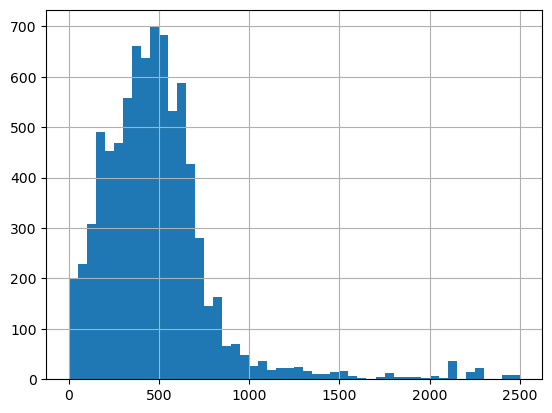

In [27]:
data['parks_nearest'].hist(bins=50, range=(1,2500))
plt.show()

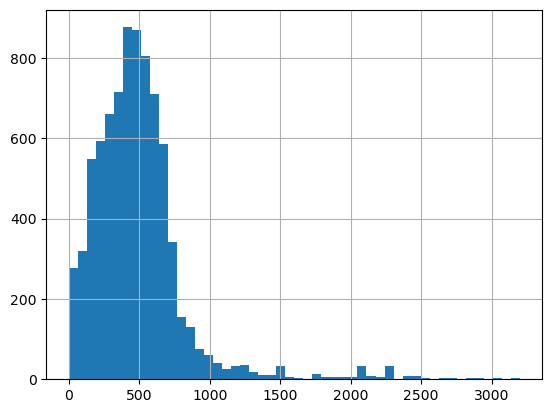

In [28]:
data['parks_nearest'].hist(bins=50, range=(1,3200))
plt.show()

<b> Избавились от нескольких аномальных квартир. Гистограмма с учетом заполненных пропусков смотрится также странно, как и в прошлых признаках. Причина та же - большое количество пропусков, картографические уникальные данные, которые "перебиваются" одним значением. Если мы будем рассматривать квартиры в контексте наличия/отсутствия парков в радиусе 3 км., то конкретные цифры ближайшего парка за пределами 3000 м. уже могут быть не так важны, поэтому оставляем как есть. </b>

### `ponds_around3000`

In [246]:
data[data['ponds_around3000'].isna()].sort_values(by='ponds_nearest')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10.000,2890000.000,30.400,2018-09-10,1.000,2.650,12.000,14.400,5.000,0.000,...,9.100,0.000,янино-1,26737.000,13085.000,0.000,3127.000,NaN,NaN,55.000
8,20.000,2900000.000,33.160,2018-05-23,1.000,2.650,27.000,15.430,26.000,0.000,...,8.810,0.000,мурино,26737.000,13085.000,0.000,3127.000,NaN,NaN,189.000
12,10.000,3890000.000,54.000,2016-06-30,2.000,2.650,5.000,30.000,5.000,0.000,...,9.000,0.000,сертолово,26737.000,13085.000,0.000,3127.000,NaN,NaN,90.000
22,20.000,5000000.000,58.000,2017-04-24,2.000,2.750,25.000,30.000,15.000,0.000,...,11.000,2.000,кудрово,26737.000,13085.000,0.000,3127.000,NaN,NaN,60.000
30,12.000,2200000.000,32.800,2018-02-19,1.000,2.650,9.000,18.368,2.000,0.000,...,5.576,0.000,коммунар,26737.000,13085.000,0.000,3127.000,NaN,NaN,63.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16.000,2100000.000,62.800,2018-09-18,4.000,2.500,5.000,45.500,3.000,0.000,...,5.500,0.000,дзержинского,26737.000,13085.000,0.000,3127.000,NaN,NaN,NaN
23692,2.000,1350000.000,30.000,2017-07-07,1.000,2.650,5.000,17.500,4.000,0.000,...,6.000,0.000,тихвин,26737.000,13085.000,0.000,3127.000,NaN,NaN,413.000
23695,14.000,3100000.000,59.000,2018-01-15,3.000,2.650,5.000,38.000,4.000,0.000,...,8.500,0.000,тосно,26737.000,13085.000,0.000,3127.000,NaN,NaN,45.000
23696,18.000,2500000.000,56.700,2018-02-11,2.000,2.650,3.000,29.700,1.000,0.000,...,9.639,0.000,рождествено,26737.000,13085.000,0.000,3127.000,NaN,NaN,NaN


In [247]:
data['ponds_around3000'].value_counts()

0.000    8785
1.000    5523
2.000    1835
3.000    1440
Name: ponds_around3000, dtype: int64

In [248]:
data['ponds_around3000'].describe()

count   17583.000
mean        0.769
std         0.937
min         0.000
25%         0.000
50%         1.000
75%         1.000
max         3.000
Name: ponds_around3000, dtype: float64

Признак очень похож на `parks_around3000` - то же число пропусков, те же похожие значения (0-3 водоема в округе), поэтому и с пропусками поступим также - заменим на 0. 

In [249]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

<AxesSubplot:>

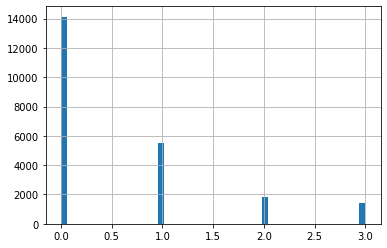

In [250]:
data['ponds_around3000'].hist(bins=50, range=(0,3))

<b> Пропуски устранены. </b>

### `ponds_nearest`

In [251]:
data['ponds_nearest'].describe()

count   8798.000
mean     518.524
std      277.467
min       13.000
25%      294.000
50%      503.000
75%      729.000
max     1344.000
Name: ponds_nearest, dtype: float64

In [252]:
len(data[data['ponds_nearest'].isna()])

14127

In [253]:
data.groupby('ponds_around3000')['ponds_nearest'].count()

ponds_around3000
0.000       0
1.000    5523
2.000    1835
3.000    1440
Name: ponds_nearest, dtype: int64

<AxesSubplot:>

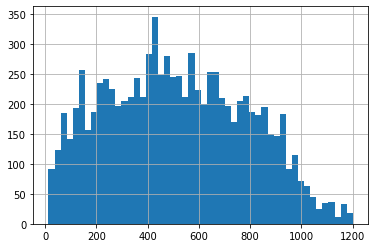

In [254]:
data['ponds_nearest'].hist(bins=50, range=(13,1200))
plt.show()

In [255]:
data.query('ponds_nearest <= 25')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
433,15.000,6800000.000,57.800,2017-04-28,3.000,2.800,5.000,33.700,4.000,0.000,...,9.700,0.000,санкт-петербург,21545.000,1166.000,1.000,803.000,2.000,22.000,402.000
543,11.000,12790000.000,56.600,2018-11-06,2.000,3.500,3.000,29.400,1.000,1.000,...,9.622,0.000,петергоф,35248.000,30437.000,3.000,53.000,3.000,22.000,NaN
660,3.000,49950000.000,483.900,2017-10-04,7.000,3.200,6.000,312.500,4.000,0.000,...,26.400,0.000,санкт-петербург,23079.000,945.000,3.000,461.000,3.000,22.000,391.000
1548,1.000,12300000.000,90.000,2018-03-03,3.000,2.650,8.000,55.000,3.000,0.000,...,14.000,0.000,санкт-петербург,18689.000,17691.000,1.000,1145.000,2.000,13.000,347.000
1733,8.000,8300000.000,70.000,2016-01-29,2.000,3.200,8.000,42.000,7.000,0.000,...,12.000,2.000,санкт-петербург,18140.000,17143.000,1.000,1514.000,2.000,16.000,200.000
2564,7.000,3900000.000,44.000,2017-05-23,1.000,2.650,16.000,20.000,5.000,0.000,...,10.000,2.000,санкт-петербург,18649.000,17652.000,1.000,1304.000,2.000,19.000,45.000
5631,14.000,99000000.000,280.000,2018-01-19,3.000,2.650,4.000,160.000,4.000,0.000,...,47.600,0.000,санкт-петербург,21178.000,1281.000,2.000,283.000,3.000,22.000,NaN
7125,5.000,17000000.000,177.800,2015-07-09,5.000,3.200,6.000,116.200,5.000,0.000,...,19.100,0.000,санкт-петербург,21583.000,1211.000,1.000,437.000,2.000,22.000,439.000
8316,16.000,5800000.000,65.000,2018-11-08,2.000,2.500,9.000,36.000,9.000,0.000,...,9.000,0.000,санкт-петербург,28313.000,13188.000,1.000,470.000,1.000,20.000,119.000
8785,18.000,15500000.000,105.600,2019-03-15,3.000,2.650,10.000,63.000,3.000,0.000,...,17.000,0.000,санкт-петербург,18140.000,17143.000,1.000,1514.000,2.000,16.000,NaN


In [256]:
data.query('locality_name == "петергоф"').sort_values(by = 'ponds_nearest').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
543,11.000,12790000.000,56.600,2018-11-06,2.000,3.500,3.000,29.400,1.000,1.000,...,9.622,0.000,петергоф,35248.000,30437.000,3.000,53.000,3.000,22.000,NaN
16217,7.000,3150000.000,38.500,2017-06-16,1.000,2.650,3.000,24.300,1.000,0.000,...,6.400,0.000,петергоф,35642.000,30831.000,3.000,14.000,3.000,35.000,428.000
4374,17.000,4800000.000,53.000,2018-03-05,2.000,2.650,6.000,29.680,2.000,0.000,...,9.010,0.000,петергоф,35636.000,30825.000,3.000,13.000,3.000,35.000,60.000
20253,19.000,9250000.000,75.000,2019-01-11,3.000,3.000,3.000,52.600,3.000,0.000,...,8.000,0.000,петергоф,35111.000,30300.000,3.000,160.000,3.000,90.000,18.000
1567,9.000,9200000.000,75.000,2016-04-10,3.000,3.000,3.000,53.000,3.000,0.000,...,8.000,0.000,петергоф,35111.000,30300.000,3.000,160.000,3.000,90.000,174.000
11849,8.000,3700000.000,55.800,2017-03-03,3.000,2.650,5.000,41.100,1.000,0.000,...,5.300,0.000,петергоф,37498.000,32687.000,2.000,136.000,3.000,146.000,220.000
9813,5.000,3450000.000,42.000,2017-12-14,2.000,2.500,5.000,27.000,1.000,0.000,...,5.230,0.000,петергоф,37415.000,32604.000,2.000,164.000,3.000,186.000,346.000
12759,9.000,3000000.000,44.000,2017-08-08,2.000,2.550,5.000,28.300,1.000,0.000,...,5.200,0.000,петергоф,37459.000,32649.000,1.000,188.000,3.000,211.000,184.000
21633,6.000,4000000.000,57.000,2017-04-21,3.000,2.520,5.000,41.500,5.000,0.000,...,5.500,0.000,петергоф,37672.000,32862.000,1.000,208.000,3.000,211.000,449.000
14812,10.000,3450000.000,45.000,2015-08-05,2.000,2.500,5.000,29.800,5.000,0.000,...,5.200,0.000,петергоф,37459.000,32649.000,1.000,188.000,3.000,211.000,497.000


Аномальной кажутся три квартиры в Петергофе - в раудисе 3 км. есть три парка и три водоема, причем крайне близко(около или менее 50 м.). Избавимся от них. 

In [257]:
data.loc[(data['locality_name'] == 'петергоф') & (data['ponds_nearest'] <= 35)] = None

In [258]:
data = data.dropna(subset=['ponds_around3000'])

<b> С пропусками сложнее - их много, как и в `parks_nearest`, но если там были хоть какие-то значения у квартир, не имеющих парков в радиусе 3 км., то здесь и этих сведений не имеется. Пропуски придется оставить. </b>

###  `days_exposition`

In [259]:
data[data['days_exposition'].isna()].head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20.000,13000000.000,108.000,2019-03-07,3.000,2.700,16.000,51.000,8.000,0.000,...,25.000,0.000,санкт-петербург,18863.000,16028.000,1.000,482.000,2.000,755.000,NaN
7,5.000,7915000.000,71.600,2019-04-18,2.000,2.650,24.000,40.096,22.000,0.000,...,18.900,2.000,санкт-петербург,23982.000,11634.000,0.000,3127.000,0.000,NaN,NaN
44,13.000,5350000.000,40.000,2018-11-18,1.000,2.650,22.000,22.400,3.000,0.000,...,6.800,1.000,санкт-петербург,30471.000,11603.000,1.000,620.000,1.000,1152.000,NaN
45,17.000,5200000.000,50.600,2018-12-02,2.000,2.650,9.000,30.300,7.000,0.000,...,7.000,0.000,санкт-петербург,30011.000,12872.000,0.000,3127.000,0.000,NaN,NaN
46,17.000,6600000.000,52.100,2019-01-31,2.000,2.600,24.000,29.700,9.000,0.000,...,8.300,2.000,санкт-петербург,15114.000,12702.000,0.000,3127.000,0.000,NaN,NaN
49,1.000,3050000.000,30.800,2018-11-22,1.000,2.500,9.000,18.000,7.000,0.000,...,6.000,0.000,санкт-петербург,45341.000,16603.000,1.000,675.000,0.000,NaN,NaN
52,20.000,11795000.000,136.000,2017-09-22,6.000,3.000,2.000,94.000,2.000,0.000,...,11.000,1.000,санкт-петербург,16510.000,6582.000,1.000,526.000,0.000,NaN,NaN
71,20.000,4850000.000,57.500,2019-03-27,3.000,2.500,9.000,39.000,8.000,0.000,...,6.200,0.000,санкт-петербург,33623.000,12267.000,1.000,334.000,1.000,333.000,NaN
81,9.000,10949000.000,68.000,2018-12-27,1.000,2.650,10.000,38.080,6.000,0.000,...,11.560,0.000,санкт-петербург,26737.000,13085.000,0.000,3127.000,0.000,NaN,NaN
84,11.000,2400000.000,43.900,2019-03-13,2.000,2.650,2.000,27.460,1.000,0.000,...,5.200,0.000,кировск,26737.000,13085.000,0.000,3127.000,0.000,NaN,NaN


In [260]:
data['days_exposition'].describe()

count   19856.000
mean      181.157
std       220.081
min         1.000
25%        45.000
50%        95.000
75%       232.000
max      1572.000
Name: days_exposition, dtype: float64

<AxesSubplot:>

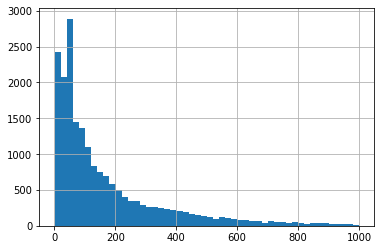

In [261]:
data['days_exposition'].hist(bins=50,range=(1,1000))
plt.show()

In [262]:
print(data['days_exposition'].isna().sum() / len(data['days_exposition']))

0.1337579617834395


Пропусков в `days_exposition` порядка 13% от общего числа. Между тем, каким-либо образом заполнить пропущенные значения не представляется возможным - медиана составляет порядка 95 дней, и из датафрейма неясно, с чем связано появление пропусков, продавались ли квартиры быстрее 95 дней или, наоборот дольше и т.д. Поэтому оставляем пропуски как есть. 

In [263]:
data.query('days_exposition < 3')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1632,19.000,4000000.000,49.900,2019-05-01,2.000,2.500,9.000,25.000,1.000,0.000,...,10.000,0.000,санкт-петербург,13567.000,14384.000,1.000,20.000,1.000,681.000,1.000
13061,20.000,6100000.000,51.400,2019-04-29,2.000,3.000,5.000,31.700,4.000,0.000,...,6.900,1.000,санкт-петербург,10776.000,9389.000,0.000,3127.000,0.000,NaN,2.000
16053,4.000,4070000.000,45.100,2019-04-30,2.000,2.650,5.000,22.700,3.000,0.000,...,6.600,0.000,санкт-петербург,40859.000,11668.000,2.000,485.000,0.000,NaN,2.000
16212,0.000,7806000.000,25.000,2019-04-30,1.000,3.000,5.000,14.000,5.000,0.000,...,4.250,0.000,санкт-петербург,36525.000,10302.000,0.000,3127.000,0.000,NaN,2.000


Четыре квартиры были убраны в течение одного-двух дней, и это подозрительно - квартир, продавшихся за 3 дня, уже гораздо больше. Можем избавиться от этих данных. 

In [264]:
data.loc[data['days_exposition'] < 3] = None

In [265]:
data.query('days_exposition >= 1400')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
521,20.000,25717300.000,230.100,2015-01-21,3.000,2.650,3.000,130.000,1.000,0.000,...,26.100,1.000,пушкин,16877.000,29030.000,2.000,676.000,3.000,278.000,1441.000
1109,1.000,34878556.000,95.800,2014-12-09,2.000,2.650,6.000,58.300,5.000,1.000,...,20.000,1.000,санкт-петербург,21860.000,318.000,2.000,160.000,3.000,569.000,1572.000
1885,2.000,13300000.000,79.600,2014-12-09,2.000,3.000,8.000,42.700,7.000,0.000,...,18.000,0.000,санкт-петербург,39393.000,11096.000,1.000,537.000,0.000,NaN,1513.000
2941,3.000,10090000.000,71.900,2015-02-02,2.000,2.650,10.000,34.100,9.000,0.000,...,16.800,2.000,санкт-петербург,23604.000,5294.000,0.000,3127.000,1.000,434.000,1458.000
4736,11.000,6650000.000,68.300,2015-02-19,4.000,2.630,5.000,45.100,4.000,0.000,...,9.000,0.000,санкт-петербург,20182.000,1724.000,3.000,606.000,3.000,453.000,1477.000
6006,4.000,4400000.000,38.630,2015-02-03,1.000,2.850,25.000,15.000,6.000,0.000,...,12.300,2.000,парголово,52611.000,18783.000,0.000,3127.000,0.000,NaN,1452.000
6691,3.000,4400000.000,42.980,2014-12-12,1.000,2.650,5.000,18.720,1.000,0.000,...,11.310,0.000,пушкин,19715.000,30358.000,1.000,439.000,3.000,232.000,1512.000
6726,6.000,11995000.000,83.820,2014-11-27,2.000,2.730,11.000,42.310,1.000,0.000,...,17.850,0.000,санкт-петербург,39946.000,10720.000,1.000,2102.000,3.000,303.000,1406.000
9553,11.000,10600000.000,80.000,2014-12-09,3.000,2.850,17.000,44.000,9.000,0.000,...,15.000,0.000,санкт-петербург,17101.000,17110.000,0.000,3127.000,0.000,NaN,1553.000
9555,11.000,9950000.000,61.200,2015-04-06,2.000,3.170,7.000,39.700,2.000,0.000,...,8.000,0.000,санкт-петербург,9740.000,10123.000,1.000,114.000,0.000,NaN,1434.000


Теперь возьмем чрезмерно большие значения. 1400 дней - практически 4 года, объявления были загружены в 2014-2015 гг. За это время информация могла устареть, например, стоимость квартир. От этих сведений также проще избавиться. 

In [266]:
data.loc[data['days_exposition'] >= 1400] = None

In [267]:
data = data.dropna(subset=['total_images'])

<b> Таким образом, оставляем пропуски как есть, аномалии убраны. </b>

### `last_price`

In [268]:
data['last_price'].describe().round(5)

count       22900.000
mean      6502722.408
std      10948331.063
min         12190.000
25%       3400000.000
50%       4600000.000
75%       6700000.000
max     763000000.000
Name: last_price, dtype: float64

In [269]:
data.query('last_price < 1000000').sort_values(by='last_price').head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7.000,12190.000,109.000,2019-03-20,2.000,2.750,25.000,32.000,25.000,0.000,...,40.500,0.000,санкт-петербург,36421.000,9176.000,1.000,805.000,0.000,NaN,8.000
17456,7.000,430000.000,30.400,2019-04-22,1.000,2.650,2.000,16.000,1.000,0.000,...,6.000,0.000,сланцы,26737.000,13085.000,0.000,3127.000,0.000,NaN,NaN
14911,5.000,430000.000,54.000,2018-06-26,2.000,2.650,3.000,30.240,3.000,0.000,...,9.180,0.000,свирь,26737.000,13085.000,0.000,3127.000,0.000,NaN,44.000
16274,18.000,440000.000,40.000,2018-07-10,1.000,2.650,5.000,22.400,1.000,0.000,...,6.800,0.000,старополье,26737.000,13085.000,0.000,3127.000,0.000,NaN,45.000
17676,0.000,450000.000,36.500,2018-02-01,1.000,2.650,5.000,17.300,4.000,0.000,...,8.500,1.000,ям-тесово,26737.000,13085.000,0.000,3127.000,0.000,NaN,120.000
5698,7.000,450000.000,42.000,2017-07-31,2.000,2.650,1.000,23.000,1.000,0.000,...,5.800,0.000,будогощь,26737.000,13085.000,0.000,3127.000,0.000,NaN,233.000
16219,14.000,450000.000,38.500,2018-07-11,2.000,2.650,2.000,21.560,1.000,0.000,...,6.545,0.000,вахнова кара,26737.000,13085.000,0.000,3127.000,0.000,NaN,45.000
9581,7.000,450000.000,43.400,2018-08-31,2.000,2.650,5.000,30.300,3.000,0.000,...,5.500,0.000,старополье,26737.000,13085.000,0.000,3127.000,0.000,NaN,96.000
18867,1.000,470000.000,41.000,2018-02-11,1.000,2.650,5.000,32.000,3.000,0.000,...,9.000,0.000,выскатка,26737.000,13085.000,0.000,3127.000,0.000,NaN,46.000
21912,0.000,470000.000,37.000,2018-02-18,1.000,2.650,3.000,20.720,3.000,0.000,...,6.290,0.000,совхозный,26737.000,13085.000,0.000,3127.000,0.000,NaN,45.000


In [270]:
data.query('locality_name == "свирь"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
14911,5.000,430000.000,54.000,2018-06-26,2.000,2.650,3.000,30.240,3.000,0.000,...,9.180,0.000,свирь,26737.000,13085.000,0.000,3127.000,0.000,NaN,44.000
18976,2.000,720000.000,48.000,2016-03-19,2.000,2.650,3.000,30.000,3.000,0.000,...,8.000,0.000,свирь,26737.000,13085.000,0.000,3127.000,0.000,NaN,288.000


In [271]:
data.query('locality_name == "сланцы"').sort_values(by='last_price').head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
17456,7.000,430000.000,30.400,2019-04-22,1.000,2.650,2.000,16.000,1.000,0.000,...,6.000,0.000,сланцы,26737.000,13085.000,0.000,3127.000,0.000,NaN,NaN
23484,11.000,470000.000,44.500,2018-07-02,2.000,2.650,2.000,28.000,2.000,0.000,...,7.500,0.000,сланцы,26737.000,13085.000,0.000,3127.000,0.000,NaN,298.000
16032,8.000,480000.000,32.000,2019-01-06,1.000,2.650,2.000,16.000,1.000,0.000,...,5.440,0.000,сланцы,26737.000,13085.000,0.000,3127.000,0.000,NaN,83.000
10782,3.000,490000.000,29.100,2016-05-05,1.000,2.500,5.000,17.000,5.000,0.000,...,5.500,0.000,сланцы,26737.000,13085.000,0.000,3127.000,0.000,NaN,719.000
4405,9.000,500000.000,52.000,2018-08-02,2.000,2.700,2.000,31.000,1.000,0.000,...,8.000,0.000,сланцы,26737.000,13085.000,0.000,3127.000,0.000,NaN,110.000
22430,6.000,520000.000,30.000,2017-09-15,1.000,2.650,2.000,18.000,1.000,0.000,...,5.500,0.000,сланцы,26737.000,13085.000,0.000,3127.000,0.000,NaN,163.000
12607,11.000,530000.000,29.600,2019-02-20,1.000,2.650,5.000,16.000,3.000,0.000,...,5.800,0.000,сланцы,26737.000,13085.000,0.000,3127.000,0.000,NaN,27.000
11351,17.000,550000.000,54.000,2019-02-07,2.000,3.000,2.000,40.000,1.000,0.000,...,7.500,0.000,сланцы,26737.000,13085.000,0.000,3127.000,0.000,NaN,78.000
1358,10.000,550000.000,27.600,2019-03-06,1.000,2.500,5.000,17.000,2.000,0.000,...,6.000,0.000,сланцы,26737.000,13085.000,0.000,3127.000,0.000,NaN,22.000
13768,10.000,550000.000,36.000,2017-08-22,1.000,2.650,2.000,20.000,1.000,0.000,...,8.000,0.000,сланцы,26737.000,13085.000,0.000,3127.000,0.000,NaN,92.000


In [272]:
data.query('locality_name == "старополье"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
6859,6.000,490000.000,40.000,2017-12-11,1.000,2.650,5.000,22.400,3.000,0.000,...,6.800,0.000,старополье,26737.000,13085.000,0.000,3127.000,0.000,NaN,43.000
9581,7.000,450000.000,43.400,2018-08-31,2.000,2.650,5.000,30.300,3.000,0.000,...,5.500,0.000,старополье,26737.000,13085.000,0.000,3127.000,0.000,NaN,96.000
16274,18.000,440000.000,40.000,2018-07-10,1.000,2.650,5.000,22.400,1.000,0.000,...,6.800,0.000,старополье,26737.000,13085.000,0.000,3127.000,0.000,NaN,45.000


In [273]:
data.query('locality_name == "будогощь"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5698,7.000,450000.000,42.000,2017-07-31,2.000,2.650,1.000,23.000,1.000,0.000,...,5.800,0.000,будогощь,26737.000,13085.000,0.000,3127.000,0.000,NaN,233.000
13365,11.000,1300000.000,34.000,2018-11-03,1.000,2.500,3.000,18.000,1.000,0.000,...,8.000,1.000,будогощь,26737.000,13085.000,0.000,3127.000,0.000,NaN,24.000
14654,7.000,1500000.000,37.000,2018-01-13,1.000,2.730,3.000,20.720,3.000,0.000,...,6.290,0.000,будогощь,26737.000,13085.000,0.000,3127.000,0.000,NaN,45.000
21186,7.000,2700000.000,76.600,2018-03-28,3.000,2.650,3.000,42.896,1.000,0.000,...,13.022,0.000,будогощь,26737.000,13085.000,0.000,3127.000,0.000,NaN,44.000


In [274]:
data.query('locality_name == "вахнова кара"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
16219,14.000,450000.000,38.500,2018-07-11,2.000,2.650,2.000,21.560,1.000,0.000,...,6.545,0.000,вахнова кара,26737.000,13085.000,0.000,3127.000,0.000,NaN,45.000


In [275]:
data.query('locality_name == "выскатка"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
18867,1.000,470000.000,41.000,2018-02-11,1.000,2.650,5.000,32.000,3.000,0.000,...,9.000,0.000,выскатка,26737.000,13085.000,0.000,3127.000,0.000,NaN,46.000
19927,2.000,700000.000,53.000,2017-11-16,2.000,2.650,5.000,30.400,1.000,0.000,...,8.400,2.000,выскатка,26737.000,13085.000,0.000,3127.000,0.000,NaN,45.000


In [276]:
data.query('locality_name == "совхозный"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
13809,6.000,565000.000,45.000,2017-09-28,2.000,2.600,3.000,25.000,1.000,0.000,...,9.000,2.000,совхозный,26737.000,13085.000,0.000,3127.000,0.000,NaN,161.000
21912,0.000,470000.000,37.000,2018-02-18,1.000,2.650,3.000,20.720,3.000,0.000,...,6.290,0.000,совхозный,26737.000,13085.000,0.000,3127.000,0.000,NaN,45.000


По квартире из Санкт-Петербурга стоимостью 12 тыс. все понятно, это некорректное значение. Что касается других населенных пунктов - в глаза бросается только строка 5698, где стоимость квартиры явно занижена по отношению к другим в том же поселке. Во всех остальных случаях цены похожи на реальные (правда, и выборки небольшие, но это скорее говорит о размерах этих поселений). 

In [277]:
data.loc[5698] = None

In [278]:
data.loc[8793] = None

In [279]:
data = data.dropna(subset=['last_price'])

In [280]:
data.query('last_price > 100000000').sort_values(by='last_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21923,10.000,115490000.000,235.000,2017-04-09,5.000,4.900,5.000,140.000,5.000,0.000,...,50.000,0.000,санкт-петербург,22777.000,1328.000,3.000,652.000,3.000,253.000,351.000
1188,20.000,118000000.000,290.600,2018-06-01,6.000,3.820,6.000,188.700,3.000,0.000,...,22.000,1.000,санкт-петербург,25309.000,6224.000,1.000,217.000,0.000,NaN,316.000
20264,17.000,119000000.000,187.600,2017-07-10,4.000,6.000,7.000,147.000,7.000,0.000,...,15.600,0.000,санкт-петербург,26902.000,5605.000,3.000,484.000,1.000,305.000,259.000
1300,14.000,120000000.000,280.000,2018-07-12,5.000,4.700,4.000,162.000,3.000,0.000,...,30.000,0.000,санкт-петербург,24680.000,4247.000,1.000,464.000,3.000,339.000,225.000
16647,15.000,122000000.000,145.000,2017-04-25,3.000,3.300,6.000,36.000,2.000,0.000,...,72.000,0.000,санкт-петербург,33931.000,7023.000,2.000,478.000,3.000,250.000,335.000
4996,20.000,124000000.000,124.500,2017-10-12,4.000,3.000,4.000,67.200,2.000,0.000,...,20.000,0.000,санкт-петербург,20399.000,1722.000,3.000,302.000,3.000,172.000,45.000
21023,17.000,124350000.000,248.700,2015-08-27,4.000,3.400,9.000,131.000,4.000,0.000,...,23.000,0.000,санкт-петербург,21946.000,2242.000,1.000,679.000,1.000,227.000,501.000
20349,17.000,124480000.000,267.700,2016-06-18,4.000,2.650,8.000,107.030,8.000,0.000,...,29.860,0.000,санкт-петербург,27102.000,7442.000,2.000,164.000,2.000,473.000,205.000
1928,11.000,125000000.000,224.500,2017-01-24,4.000,2.650,4.000,163.500,3.000,0.000,...,30.000,1.000,санкт-петербург,22805.000,2335.000,0.000,3127.000,2.000,497.000,174.000
21955,19.000,130000000.000,431.000,2017-10-02,7.000,3.700,8.000,220.000,5.000,0.000,...,20.000,5.000,санкт-петербург,26737.000,13085.000,0.000,3127.000,0.000,NaN,161.000


In [281]:
data.query('last_price > 100000000').sort_values(by='total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4996,20.000,124000000.000,124.500,2017-10-12,4.000,3.000,4.000,67.200,2.000,0.000,...,20.000,0.000,санкт-петербург,20399.000,1722.000,3.000,302.000,3.000,172.000,45.000
16647,15.000,122000000.000,145.000,2017-04-25,3.000,3.300,6.000,36.000,2.000,0.000,...,72.000,0.000,санкт-петербург,33931.000,7023.000,2.000,478.000,3.000,250.000,335.000
17912,17.000,135000000.000,166.000,2019-02-07,3.000,3.300,7.000,52.000,1.000,0.000,...,64.000,0.000,санкт-петербург,32863.000,5955.000,2.000,230.000,3.000,215.000,NaN
22831,18.000,289238400.000,187.500,2019-03-19,2.000,3.370,6.000,63.700,6.000,0.000,...,30.200,0.000,санкт-петербург,22494.000,1073.000,3.000,386.000,3.000,188.000,NaN
20264,17.000,119000000.000,187.600,2017-07-10,4.000,6.000,7.000,147.000,7.000,0.000,...,15.600,0.000,санкт-петербург,26902.000,5605.000,3.000,484.000,1.000,305.000,259.000
1436,19.000,330000000.000,190.000,2018-04-04,3.000,3.500,7.000,95.000,5.000,0.000,...,40.000,0.000,санкт-петербург,23011.000,1197.000,3.000,519.000,3.000,285.000,233.000
1928,11.000,125000000.000,224.500,2017-01-24,4.000,2.650,4.000,163.500,3.000,0.000,...,30.000,1.000,санкт-петербург,22805.000,2335.000,0.000,3127.000,2.000,497.000,174.000
13864,20.000,130000000.000,231.000,2015-08-13,6.000,3.600,6.000,148.000,4.000,0.000,...,12.000,0.000,санкт-петербург,22992.000,1280.000,3.000,395.000,3.000,170.000,467.000
21923,10.000,115490000.000,235.000,2017-04-09,5.000,4.900,5.000,140.000,5.000,0.000,...,50.000,0.000,санкт-петербург,22777.000,1328.000,3.000,652.000,3.000,253.000,351.000
12674,16.000,140000000.000,241.000,2015-07-24,5.000,3.000,5.000,134.960,4.000,0.000,...,40.970,0.000,санкт-петербург,23512.000,3503.000,3.000,413.000,3.000,83.000,399.000


Очевидно, среди самых дорогих квартир представлены только те, что расположены в Санкт-Петербурге. Рассмотрим те, что находятся в области. 

In [282]:
data.query('last_price > 1000000 and locality_name != "санкт-петербург"').sort_values(by='last_price',ascending=False).head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20314,8.000,42000000.000,374.000,2017-04-09,7.000,2.650,4.000,239.400,3.000,0.000,...,51.000,0.000,пушкин,15595.000,27749.000,3.000,62.000,3.000,274.000,9.000
10569,13.000,36900000.000,347.500,2017-09-14,8.000,2.650,4.000,160.000,1.000,0.000,...,40.000,0.000,колпино,28346.000,34132.000,1.000,1809.000,2.000,241.000,249.000
5042,20.000,35000000.000,380.000,2017-08-17,6.000,2.650,3.000,198.000,2.000,0.000,...,50.000,0.000,пушкин,18490.000,30643.000,1.000,527.000,1.000,668.000,15.000
4978,8.000,29000000.000,228.000,2016-12-29,4.000,3.500,3.000,141.000,2.000,0.000,...,40.400,1.000,пушкин,14651.000,26805.000,3.000,421.000,3.000,237.000,572.000
10460,3.000,26500000.000,157.300,2018-07-05,5.000,3.000,6.000,88.088,5.000,0.000,...,26.741,0.000,пушкин,13520.000,25674.000,0.000,3127.000,0.000,NaN,NaN
14900,20.000,25900000.000,125.600,2018-08-14,2.000,4.000,4.000,42.700,4.000,0.000,...,62.500,2.000,пушкин,13426.000,25580.000,0.000,3127.000,0.000,NaN,194.000
19852,13.000,24800000.000,121.300,2017-06-16,2.000,3.950,4.000,75.000,4.000,0.000,...,23.000,0.000,пушкин,13520.000,25674.000,0.000,3127.000,0.000,NaN,467.000
18386,15.000,24800000.000,190.000,2014-12-10,4.000,2.620,4.000,104.100,3.000,0.000,...,30.000,0.000,пушкин,15072.000,27226.000,1.000,114.000,0.000,NaN,NaN
21238,1.000,24412900.000,38.120,2018-06-27,1.000,2.650,10.000,16.830,4.000,0.000,...,10.700,1.000,всеволожск,26737.000,13085.000,0.000,3127.000,0.000,NaN,44.000
15037,9.000,23000000.000,71.000,2017-05-15,2.000,3.300,4.000,31.000,2.000,0.000,...,24.500,2.000,зеленогорск,70016.000,51115.000,0.000,3127.000,0.000,NaN,90.000


In [283]:
data.query('locality_name == "пушкин"').sort_values(by='last_price',ascending=False).head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20314,8.000,42000000.000,374.000,2017-04-09,7.000,2.650,4.000,239.400,3.000,0.000,...,51.000,0.000,пушкин,15595.000,27749.000,3.000,62.000,3.000,274.000,9.000
5042,20.000,35000000.000,380.000,2017-08-17,6.000,2.650,3.000,198.000,2.000,0.000,...,50.000,0.000,пушкин,18490.000,30643.000,1.000,527.000,1.000,668.000,15.000
4978,8.000,29000000.000,228.000,2016-12-29,4.000,3.500,3.000,141.000,2.000,0.000,...,40.400,1.000,пушкин,14651.000,26805.000,3.000,421.000,3.000,237.000,572.000
10460,3.000,26500000.000,157.300,2018-07-05,5.000,3.000,6.000,88.088,5.000,0.000,...,26.741,0.000,пушкин,13520.000,25674.000,0.000,3127.000,0.000,NaN,NaN
14900,20.000,25900000.000,125.600,2018-08-14,2.000,4.000,4.000,42.700,4.000,0.000,...,62.500,2.000,пушкин,13426.000,25580.000,0.000,3127.000,0.000,NaN,194.000
19852,13.000,24800000.000,121.300,2017-06-16,2.000,3.950,4.000,75.000,4.000,0.000,...,23.000,0.000,пушкин,13520.000,25674.000,0.000,3127.000,0.000,NaN,467.000
18386,15.000,24800000.000,190.000,2014-12-10,4.000,2.620,4.000,104.100,3.000,0.000,...,30.000,0.000,пушкин,15072.000,27226.000,1.000,114.000,0.000,NaN,NaN
17874,13.000,17000000.000,170.000,2018-08-21,5.000,2.650,3.000,94.000,3.000,0.000,...,16.000,0.000,пушкин,19760.000,31914.000,0.000,3127.000,0.000,NaN,96.000
140,8.000,16912000.000,105.700,2016-12-09,2.000,2.700,3.000,48.400,1.000,0.000,...,15.400,0.000,пушкин,14352.000,26506.000,3.000,366.000,3.000,179.000,390.000
7996,17.000,16600000.000,106.000,2017-12-02,4.000,3.200,3.000,50.000,3.000,0.000,...,30.000,0.000,пушкин,14822.000,26976.000,1.000,254.000,0.000,NaN,NaN


In [284]:
data.query('locality_name == "пушкин"').sort_values(by='total_area',ascending=False).head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5042,20.000,35000000.000,380.000,2017-08-17,6.000,2.650,3.000,198.000,2.000,0.000,...,50.000,0.000,пушкин,18490.000,30643.000,1.000,527.000,1.000,668.000,15.000
20314,8.000,42000000.000,374.000,2017-04-09,7.000,2.650,4.000,239.400,3.000,0.000,...,51.000,0.000,пушкин,15595.000,27749.000,3.000,62.000,3.000,274.000,9.000
4978,8.000,29000000.000,228.000,2016-12-29,4.000,3.500,3.000,141.000,2.000,0.000,...,40.400,1.000,пушкин,14651.000,26805.000,3.000,421.000,3.000,237.000,572.000
16807,4.000,15500000.000,211.000,2015-02-19,4.000,2.650,5.000,97.600,4.000,0.000,...,29.100,0.000,пушкин,18500.000,30654.000,1.000,401.000,1.000,882.000,1084.000
18386,15.000,24800000.000,190.000,2014-12-10,4.000,2.620,4.000,104.100,3.000,0.000,...,30.000,0.000,пушкин,15072.000,27226.000,1.000,114.000,0.000,NaN,NaN
17874,13.000,17000000.000,170.000,2018-08-21,5.000,2.650,3.000,94.000,3.000,0.000,...,16.000,0.000,пушкин,19760.000,31914.000,0.000,3127.000,0.000,NaN,96.000
17692,1.000,15782000.000,159.000,2015-10-27,2.000,2.650,3.000,43.000,1.000,0.000,...,16.000,1.000,пушкин,16877.000,29030.000,2.000,676.000,3.000,278.000,272.000
10460,3.000,26500000.000,157.300,2018-07-05,5.000,3.000,6.000,88.088,5.000,0.000,...,26.741,0.000,пушкин,13520.000,25674.000,0.000,3127.000,0.000,NaN,NaN
12526,20.000,16500000.000,151.000,2016-04-01,4.000,2.650,3.000,61.000,3.000,0.000,...,44.700,0.000,пушкин,15580.000,27734.000,2.000,96.000,3.000,120.000,157.000
22037,15.000,10900000.000,145.000,2017-04-17,2.000,3.500,2.000,39.000,2.000,0.000,...,10.000,0.000,пушкин,15337.000,27490.000,3.000,216.000,3.000,153.000,188.000


In [285]:
data.query('locality_name == "колпино"').sort_values(by='last_price',ascending=False).head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
10569,13.000,36900000.000,347.500,2017-09-14,8.000,2.650,4.000,160.000,1.000,0.000,...,40.000,0.000,колпино,28346.000,34132.000,1.000,1809.000,2.000,241.000,249.000
538,2.000,8600000.000,91.000,2018-02-01,2.000,2.650,4.000,50.960,1.000,0.000,...,15.470,0.000,колпино,26757.000,32543.000,1.000,1443.000,3.000,195.000,260.000
3069,7.000,8000000.000,80.000,2019-02-27,2.000,3.100,3.000,50.000,2.000,0.000,...,18.000,1.000,колпино,26128.000,31914.000,2.000,166.000,3.000,44.000,NaN
15024,0.000,8000000.000,67.400,2018-10-22,2.000,2.750,4.000,39.000,4.000,0.000,...,16.000,0.000,колпино,28120.000,33906.000,1.000,708.000,2.000,153.000,46.000
1105,14.000,8000000.000,127.000,2017-03-13,5.000,3.000,3.000,86.000,3.000,0.000,...,11.000,1.000,колпино,26262.000,32049.000,2.000,247.000,3.000,407.000,197.000
1935,18.000,8000000.000,82.200,2018-11-07,3.000,2.700,5.000,34.000,5.000,0.000,...,23.000,0.000,колпино,27241.000,33027.000,0.000,3127.000,1.000,994.000,NaN
13211,17.000,7700000.000,102.300,2018-03-25,2.000,3.130,4.000,45.600,4.000,0.000,...,17.600,1.000,колпино,25453.000,31239.000,1.000,180.000,0.000,NaN,NaN
14326,11.000,6990000.000,90.000,2016-04-30,3.000,2.650,10.000,43.000,10.000,0.000,...,16.600,0.000,колпино,28118.000,33904.000,0.000,3127.000,0.000,NaN,59.000
13762,14.000,6650000.000,87.000,2018-12-13,3.000,2.650,17.000,49.000,15.000,0.000,...,11.000,2.000,колпино,28554.000,34341.000,0.000,3127.000,3.000,287.000,117.000
3060,17.000,6600000.000,84.400,2018-02-01,4.000,2.650,12.000,52.600,12.000,0.000,...,8.700,2.000,колпино,26709.000,32496.000,1.000,787.000,1.000,664.000,105.000


In [286]:
data.query('locality_name == "репино"').sort_values(by='last_price',ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5659,2.000,11067416.000,160.700,2018-08-01,2.000,3.000,2.000,89.992,1.000,0.000,...,27.319,0.000,репино,61451.000,42550.000,0.000,3127.000,0.000,NaN,238.000
15483,10.000,5100000.000,55.000,2018-02-24,3.000,2.500,5.000,30.800,4.000,0.000,...,9.350,0.000,репино,64127.000,45226.000,0.000,3127.000,0.000,NaN,60.000
10935,12.000,4500000.000,56.000,2015-10-21,3.000,2.550,5.000,41.600,5.000,0.000,...,6.000,0.000,репино,62111.000,43210.000,0.000,3127.000,0.000,NaN,703.000


In [287]:
data.query('locality_name == "всеволожск"').sort_values(by='last_price',ascending=False).head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21238,1.000,24412900.000,38.120,2018-06-27,1.000,2.650,10.000,16.830,4.000,0.000,...,10.700,1.000,всеволожск,26737.000,13085.000,0.000,3127.000,0.000,NaN,44.000
10318,20.000,11000000.000,130.000,2019-04-26,4.000,2.700,7.000,72.600,2.000,0.000,...,30.000,0.000,всеволожск,26737.000,13085.000,0.000,3127.000,0.000,NaN,NaN
11498,6.000,10890000.000,80.000,2018-06-11,2.000,2.650,3.000,40.000,2.000,0.000,...,12.000,0.000,всеволожск,26737.000,13085.000,0.000,3127.000,0.000,NaN,308.000
12640,20.000,10300000.000,75.500,2019-03-21,2.000,3.000,2.000,42.500,2.000,0.000,...,13.200,0.000,всеволожск,26737.000,13085.000,0.000,3127.000,0.000,NaN,NaN
21589,17.000,10000000.000,75.000,2018-07-13,2.000,3.000,3.000,46.000,2.000,0.000,...,16.000,0.000,всеволожск,26737.000,13085.000,0.000,3127.000,0.000,NaN,74.000
23032,12.000,8999999.000,100.000,2017-10-23,3.000,2.600,18.000,66.000,5.000,0.000,...,25.000,0.000,всеволожск,26737.000,13085.000,0.000,3127.000,0.000,NaN,59.000
11148,12.000,8000000.000,100.000,2018-07-09,4.000,2.700,7.000,53.900,1.000,0.000,...,28.100,0.000,всеволожск,26737.000,13085.000,0.000,3127.000,0.000,NaN,NaN
16925,7.000,7890000.000,107.000,2019-01-05,4.000,2.600,5.000,59.920,3.000,0.000,...,18.190,5.000,всеволожск,26737.000,13085.000,0.000,3127.000,0.000,NaN,7.000
2759,11.000,7500000.000,152.000,2018-07-27,3.000,3.000,3.000,85.120,1.000,1.000,...,25.840,1.000,всеволожск,26737.000,13085.000,0.000,3127.000,0.000,NaN,7.000
9279,20.000,6800000.000,90.000,2017-09-30,3.000,2.750,23.000,50.500,14.000,0.000,...,13.000,2.000,всеволожск,26737.000,13085.000,0.000,3127.000,0.000,NaN,162.000


In [288]:
data.query('locality_name == "зеленогорск"').sort_values(by='last_price',ascending=False).head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15037,9.000,23000000.000,71.000,2017-05-15,2.000,3.300,4.000,31.000,2.000,0.000,...,24.500,2.000,зеленогорск,70016.000,51115.000,0.000,3127.000,0.000,NaN,90.000
14185,10.000,17212500.000,76.500,2015-09-03,2.000,2.650,4.000,30.200,2.000,0.000,...,23.900,0.000,зеленогорск,70016.000,51115.000,0.000,3127.000,0.000,NaN,NaN
6247,8.000,9600000.000,180.100,2017-03-07,4.000,2.750,2.000,100.000,2.000,0.000,...,19.500,1.000,зеленогорск,73547.000,54646.000,0.000,3127.000,1.000,1037.000,496.000
376,18.000,8400000.000,84.000,2018-06-26,2.000,2.750,3.000,41.000,1.000,0.000,...,13.000,0.000,зеленогорск,73827.000,54926.000,0.000,3127.000,0.000,NaN,201.000
3477,4.000,6400000.000,67.200,2016-10-10,3.000,2.650,6.000,43.000,1.000,0.000,...,12.000,0.000,зеленогорск,71597.000,52696.000,3.000,112.000,1.000,408.000,316.000
18096,2.000,6177600.000,70.200,2015-11-10,3.000,2.650,4.000,43.700,4.000,0.000,...,9.400,0.000,зеленогорск,72469.000,53568.000,2.000,574.000,1.000,507.000,259.000
2036,19.000,6100000.000,50.000,2018-03-24,2.000,2.600,5.000,29.000,5.000,0.000,...,9.000,1.000,зеленогорск,71618.000,52717.000,3.000,37.000,1.000,926.000,72.000
4906,11.000,5500000.000,49.000,2017-10-24,2.000,2.500,5.000,29.000,3.000,0.000,...,8.500,1.000,зеленогорск,71529.000,52628.000,3.000,296.000,2.000,521.000,25.000
9493,0.000,5350000.000,47.500,2017-06-14,2.000,2.550,5.000,29.900,4.000,0.000,...,8.000,0.000,зеленогорск,71618.000,52717.000,3.000,37.000,1.000,926.000,394.000
7324,13.000,5000000.000,46.300,2017-09-12,2.000,2.550,9.000,30.100,5.000,0.000,...,8.300,0.000,зеленогорск,71869.000,52968.000,3.000,174.000,2.000,561.000,28.000


In [289]:
data.query('locality_name == "петергоф"').sort_values(by='last_price',ascending=False).head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1519,13.000,22000000.000,174.000,2014-12-10,4.000,2.800,4.000,80.900,2.000,0.000,...,17.600,0.000,петергоф,35416.000,30605.000,2.000,47.000,1.000,907.000,1133.000
679,13.000,13700000.000,200.000,2017-09-27,4.000,2.900,4.000,90.000,1.000,0.000,...,35.000,0.000,петергоф,38993.000,34182.000,1.000,233.000,1.000,234.000,172.000
3375,8.000,12000000.000,141.000,2019-03-27,3.000,2.700,5.000,73.000,1.000,0.000,...,15.200,0.000,петергоф,38485.000,33674.000,1.000,240.000,1.000,752.000,13.000
22791,12.000,11100000.000,74.000,2018-04-07,2.000,2.800,3.000,38.100,2.000,0.000,...,10.700,1.000,петергоф,35438.000,30627.000,2.000,13.000,0.000,NaN,NaN
21980,20.000,10100000.000,99.000,2018-02-28,3.000,2.800,7.000,49.000,7.000,0.000,...,16.000,0.000,петергоф,44949.000,48374.000,0.000,3127.000,0.000,NaN,84.000
20253,19.000,9250000.000,75.000,2019-01-11,3.000,3.000,3.000,52.600,3.000,0.000,...,8.000,0.000,петергоф,35111.000,30300.000,3.000,160.000,3.000,90.000,18.000
1567,9.000,9200000.000,75.000,2016-04-10,3.000,3.000,3.000,53.000,3.000,0.000,...,8.000,0.000,петергоф,35111.000,30300.000,3.000,160.000,3.000,90.000,174.000
13508,12.000,7980000.000,69.500,2018-11-13,2.000,2.650,12.000,35.000,2.000,0.000,...,18.300,0.000,петергоф,44949.000,48374.000,0.000,3127.000,0.000,NaN,NaN
13077,8.000,7700000.000,66.000,2017-10-20,2.000,2.650,7.000,47.000,6.000,0.000,...,19.000,0.000,петергоф,44949.000,48374.000,0.000,3127.000,0.000,NaN,196.000
20750,6.000,7600000.000,111.000,2018-10-17,5.000,2.650,14.000,73.000,9.000,0.000,...,8.500,1.000,петергоф,45110.000,48534.000,0.000,3127.000,0.000,NaN,NaN


In [290]:
data.query('locality_name == "сестрорецк"').sort_values(by='last_price',ascending=False).head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15975,20.000,21700000.000,121.000,2018-03-15,3.000,2.750,7.000,67.760,6.000,0.000,...,20.570,0.000,сестрорецк,57413.000,34342.000,3.000,170.000,3.000,342.000,90.000
777,16.000,18000000.000,100.000,2015-12-09,3.000,3.000,3.000,50.800,2.000,0.000,...,14.000,0.000,сестрорецк,57815.000,34745.000,2.000,265.000,1.000,651.000,215.000
15582,20.000,16990000.000,93.000,2017-11-08,3.000,3.100,4.000,49.000,3.000,0.000,...,14.000,2.000,сестрорецк,58290.000,35219.000,2.000,633.000,1.000,320.000,30.000
18177,20.000,16730000.000,123.200,2018-09-26,4.000,2.870,12.000,78.000,5.000,0.000,...,16.000,2.000,сестрорецк,57575.000,34505.000,2.000,428.000,1.000,615.000,155.000
3303,20.000,15750000.000,214.000,2018-06-15,4.000,2.650,17.000,159.200,17.000,0.000,...,40.000,0.000,сестрорецк,56588.000,33517.000,0.000,3127.000,1.000,703.000,264.000
3773,20.000,15300000.000,92.200,2019-03-14,3.000,4.000,4.000,55.800,4.000,0.000,...,14.800,1.000,сестрорецк,53952.000,35051.000,0.000,3127.000,0.000,NaN,NaN
17992,15.000,14990000.000,123.000,2016-09-06,3.000,3.100,12.000,62.000,12.000,0.000,...,28.000,0.000,сестрорецк,57575.000,34505.000,2.000,428.000,1.000,615.000,656.000
19088,20.000,13999000.000,100.000,2017-08-28,3.000,2.800,4.000,49.200,2.000,0.000,...,13.600,0.000,сестрорецк,54526.000,35625.000,0.000,3127.000,0.000,NaN,NaN
13295,20.000,13333000.000,84.000,2017-02-07,2.000,2.650,4.000,42.000,3.000,0.000,...,16.000,1.000,сестрорецк,58290.000,35219.000,2.000,633.000,1.000,320.000,64.000
2756,1.000,13040000.000,196.000,2018-08-07,5.000,2.800,4.000,109.760,4.000,0.000,...,33.320,0.000,сестрорецк,54526.000,35625.000,0.000,3127.000,0.000,NaN,107.000


In [291]:
data.query('locality_name == "красное село"').sort_values(by='last_price',ascending=False).head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2003,23.000,21000000.000,215.000,2017-11-11,4.000,2.650,5.000,55.000,2.000,0.000,...,17.000,0.000,красное село,24842.000,28266.000,1.000,311.000,1.000,1009.000,14.000
11087,3.000,14000000.000,320.000,2017-09-27,6.000,2.650,3.000,190.000,3.000,0.000,...,28.000,0.000,красное село,26020.000,29445.000,1.000,569.000,0.000,NaN,8.000
10918,6.000,8500000.000,84.000,2016-04-01,3.000,3.150,3.000,58.000,1.000,0.000,...,10.000,0.000,красное село,25256.000,28680.000,3.000,243.000,0.000,NaN,144.000
363,10.000,7100000.000,101.000,2019-04-08,4.000,2.600,8.000,56.560,7.000,0.000,...,16.500,2.000,красное село,26876.000,30300.000,0.000,3127.000,0.000,NaN,NaN
14204,19.000,6800000.000,92.400,2018-04-20,3.000,2.650,6.000,63.300,4.000,0.000,...,7.000,0.000,красное село,26585.000,30010.000,2.000,850.000,2.000,132.000,NaN
13216,0.000,6750000.000,78.000,2015-06-16,3.000,2.650,8.000,51.000,6.000,0.000,...,11.000,2.000,красное село,27678.000,31102.000,0.000,3127.000,0.000,NaN,469.000
1976,19.000,6700000.000,98.000,2019-04-26,4.000,2.600,9.000,67.000,7.000,0.000,...,11.200,0.000,красное село,25413.000,28837.000,0.000,3127.000,0.000,NaN,NaN
1577,20.000,6500000.000,71.000,2018-12-17,3.000,2.600,8.000,38.200,2.000,0.000,...,15.500,0.000,красное село,27122.000,30547.000,0.000,3127.000,0.000,NaN,29.000
18573,19.000,6400000.000,101.900,2018-10-20,4.000,2.600,8.000,72.200,6.000,0.000,...,13.800,0.000,красное село,26876.000,30300.000,0.000,3127.000,0.000,NaN,100.000
5975,11.000,6300000.000,97.500,2017-06-06,4.000,2.580,8.000,64.500,3.000,0.000,...,12.400,4.000,красное село,26886.000,30310.000,1.000,529.000,0.000,NaN,289.000


In [292]:
data.query('locality_name == "бор"').sort_values(by='last_price',ascending=False).head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11800,1.000,20295200.000,192.300,2018-02-13,6.000,2.950,2.000,147.200,1.000,0.000,...,17.800,0.000,бор,26737.000,13085.000,0.000,3127.000,0.000,NaN,162.000
14904,3.000,500000.000,38.000,2018-02-08,1.000,2.650,3.000,21.280,3.000,0.000,...,6.460,0.000,бор,26737.000,13085.000,0.000,3127.000,0.000,NaN,44.000


In [293]:
data.query('locality_name == "выборг"').sort_values(by='last_price',ascending=False).head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3894,11.000,19990000.000,186.000,2018-02-27,4.000,2.800,9.000,111.000,7.000,0.000,...,32.000,0.000,выборг,26737.000,13085.000,0.000,3127.000,0.000,NaN,NaN
5654,20.000,9200000.000,116.000,2019-04-26,3.000,3.200,5.000,68.000,5.000,1.000,...,32.000,2.000,выборг,26737.000,13085.000,0.000,3127.000,0.000,NaN,NaN
22828,5.000,8350000.000,132.000,2015-01-20,4.000,2.650,4.000,80.000,2.000,0.000,...,19.000,1.000,выборг,26737.000,13085.000,0.000,3127.000,0.000,NaN,743.000
8766,18.000,8200000.000,119.800,2018-03-24,4.000,2.650,9.000,70.000,1.000,0.000,...,25.000,0.000,выборг,26737.000,13085.000,0.000,3127.000,0.000,NaN,NaN
10063,20.000,8000000.000,101.000,2019-03-13,3.000,2.650,6.000,63.000,3.000,0.000,...,20.000,0.000,выборг,26737.000,13085.000,0.000,3127.000,0.000,NaN,NaN
23622,15.000,7490000.000,114.000,2018-08-13,4.000,3.150,4.000,81.300,4.000,0.000,...,12.000,0.000,выборг,26737.000,13085.000,0.000,3127.000,0.000,NaN,245.000
22684,9.000,7200000.000,107.000,2016-06-15,3.000,2.650,8.000,59.000,2.000,0.000,...,15.000,0.000,выборг,26737.000,13085.000,0.000,3127.000,0.000,NaN,44.000
18431,19.000,6900000.000,93.000,2018-02-22,3.000,3.000,5.000,67.000,4.000,1.000,...,15.810,2.000,выборг,26737.000,13085.000,0.000,3127.000,0.000,NaN,56.000
3067,13.000,6600000.000,95.000,2018-09-08,2.000,4.500,7.000,45.000,7.000,1.000,...,25.000,2.000,выборг,26737.000,13085.000,0.000,3127.000,0.000,NaN,96.000
6222,10.000,6400000.000,78.000,2017-11-27,3.000,3.000,14.000,52.000,4.000,0.000,...,14.000,0.000,выборг,26737.000,13085.000,0.000,3127.000,0.000,NaN,490.000


Во-первых, можно отметить 6 квартир из Санкт-Петербурга со стоимостью выше 100 млн. и площадью менее 200 кв.м. - на общем фоне выглядит нелогично и аномально дорого. Других конкурентных преимуществ по сравнению с другими подобными квартирами не просматривается. Во-вторых, по этой же причине в Пушкине слишком неправдоподно выглядят квартиры дороже 20 млн. и площадью менее 200 кв.м. В-третьих, строка 2454 - квартира в Репино площадью 160 кв.м. и стоимостью 28 млн., строка 21238 - явная ошибка в стоимости квартиры. Также можно отметить две квартиры в Зеленогорске дороже 10 млн., две в Петергофе по 22 млн. каждая и одну в Выборе дороже 19 млн. 

In [294]:
data.loc[(data['locality_name'] == 'санкт-петербург') & (data['total_area'] <= 200) & (data['last_price'] > 100000000)] = None

In [295]:
data.loc[(data['locality_name'] == 'пушкин') & (data['total_area'] <= 200) & (data['last_price'] > 20000000)] = None

In [296]:
data.loc[(data['locality_name'] == 'зеленогорск') & (data['last_price'] > 10000000)] = None

In [297]:
data.loc[(data['locality_name'] == 'петергоф') & (data['last_price'] > 21000000)] = None

In [298]:
data.loc[(data['locality_name'] == 'выборг') & (data['last_price'] > 19000000)] = None

In [299]:
data.loc[2454] = None

In [300]:
data.loc[21238] = None

In [301]:
data = data.dropna(subset=['last_price'])

<b> Таким образом, от аномальных значений избавились, можем переходить к изменению типа данных. </b>

### Изменение типа данных

In [302]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22883 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22883 non-null  float64       
 1   last_price            22883 non-null  float64       
 2   total_area            22883 non-null  float64       
 3   first_day_exposition  22883 non-null  datetime64[ns]
 4   rooms                 22883 non-null  float64       
 5   ceiling_height        22883 non-null  float64       
 6   floors_total          22883 non-null  float64       
 7   living_area           22883 non-null  float64       
 8   floor                 22883 non-null  float64       
 9   is_apartment          22883 non-null  float64       
 10  studio                22883 non-null  float64       
 11  open_plan             22883 non-null  float64       
 12  kitchen_area          22883 non-null  float64       
 13  balcony         

In [303]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20.000,13000000.000,108.000,2019-03-07,3.000,2.700,16.000,51.000,8.000,0.000,...,25.000,0.000,санкт-петербург,18863.000,16028.000,1.000,482.000,2.000,755.000,NaN
1,7.000,3350000.000,40.400,2018-12-04,1.000,2.650,11.000,18.600,1.000,0.000,...,11.000,2.000,шушары,12817.000,18603.000,0.000,3127.000,0.000,NaN,81.000
2,10.000,5196000.000,56.000,2015-08-20,2.000,2.650,5.000,34.300,4.000,0.000,...,8.300,0.000,санкт-петербург,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000
3,0.000,64900000.000,159.000,2015-07-24,3.000,2.650,14.000,89.040,9.000,0.000,...,27.030,0.000,санкт-петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000
4,2.000,10000000.000,100.000,2018-06-19,2.000,3.030,14.000,32.000,13.000,0.000,...,41.000,0.000,санкт-петербург,31856.000,8098.000,2.000,112.000,1.000,48.000,121.000
5,10.000,2890000.000,30.400,2018-09-10,1.000,2.650,12.000,14.400,5.000,0.000,...,9.100,0.000,янино-1,26737.000,13085.000,0.000,3127.000,0.000,NaN,55.000
6,6.000,3700000.000,37.300,2017-11-02,1.000,2.650,26.000,10.600,6.000,0.000,...,14.400,1.000,парголово,52996.000,19143.000,0.000,3127.000,0.000,NaN,155.000
7,5.000,7915000.000,71.600,2019-04-18,2.000,2.650,24.000,40.096,22.000,0.000,...,18.900,2.000,санкт-петербург,23982.000,11634.000,0.000,3127.000,0.000,NaN,NaN
8,20.000,2900000.000,33.160,2018-05-23,1.000,2.650,27.000,15.430,26.000,0.000,...,8.810,0.000,мурино,26737.000,13085.000,0.000,3127.000,0.000,NaN,189.000
9,18.000,5400000.000,61.000,2017-02-26,3.000,2.500,9.000,43.600,7.000,0.000,...,6.500,2.000,санкт-петербург,50898.000,15008.000,0.000,3127.000,0.000,NaN,289.000


In [304]:
data['total_images'] = data['total_images'].astype('int64')

In [305]:
data['last_price'] = data['last_price'].astype('int64')

In [306]:
data['total_area'] = data['total_area'].round(1)

In [307]:
data['rooms'] = data['rooms'].astype('int64')

In [308]:
data['ceiling_height'] = data['ceiling_height'].round(2)

In [309]:
data['floors_total'] = data['floors_total'].astype('int64')

In [310]:
data['living_area'] = data['living_area'].round(2)

In [311]:
data['floor'] = data['floor'].astype('int64')

In [312]:
data['studio'] = data['studio'].astype('bool')

In [313]:
data['is_apartment'] = data['is_apartment'].astype('bool')

In [314]:
data['open_plan'] = data['open_plan'].astype('bool')

In [315]:
data['kitchen_area'] = data['kitchen_area'].round(2)

In [316]:
data['balcony'] = data['balcony'].astype('int64')

In [317]:
data['airports_nearest'] = data['airports_nearest'].astype('int64')

In [318]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('int64')

In [319]:
data['parks_around3000'] = data['parks_around3000'].astype('int64')

In [320]:
data['parks_nearest'] = data['parks_nearest'].astype('int64')

In [321]:
data['ponds_around3000'] = data['ponds_around3000'].astype('int64')

In [322]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22883 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22883 non-null  int64         
 1   last_price            22883 non-null  int64         
 2   total_area            22883 non-null  float64       
 3   first_day_exposition  22883 non-null  datetime64[ns]
 4   rooms                 22883 non-null  int64         
 5   ceiling_height        22883 non-null  float64       
 6   floors_total          22883 non-null  int64         
 7   living_area           22883 non-null  float64       
 8   floor                 22883 non-null  int64         
 9   is_apartment          22883 non-null  bool          
 10  studio                22883 non-null  bool          
 11  open_plan             22883 non-null  bool          
 12  kitchen_area          22883 non-null  float64       
 13  balcony         

<b> Изменены типы значений на int64 (целое число) в признаках, за исключением `total_area` (площадь в кв.м., хранятся вещественные числа, округлены для простоты использования), `first_day_exposition` (хранятся даты), `ceiling_height` (высота потолков, также могут быть дробными значениями), `living_area` и `kitchen_area` (площадь жилой зоны и кухни в кв.м., см. `total_area`), `is_apartment`, `studio`, `open_plan` (хранятся булевые значения), `locality_name` (названия населенных пунктов), `ponds_nearest` и `days_exposition` (имеются пропущенные значения). </b>

### Промежуточный итог ко  второму пункту


<b> Таким образом, изменен тип данных в тех признаках, где это было необходимо. Устранены аномальные значения и пропуски, за исключением `ponds_nearest` и `days_exposition`. </b>

# 3. Добавление в таблицу новых признаков

In [323]:
data['price_for_square_meter'] = data['last_price'] / data['total_area']

In [324]:
data['price_for_square_meter'] = data['price_for_square_meter'].astype('int64')

In [325]:
data['weekday_exposition'] = data['first_day_exposition'].dt.dayofweek

In [326]:
data['month_exposition'] = data['first_day_exposition'].dt.month

In [327]:
data['year_exposition'] = data['first_day_exposition'].dt.year

In [328]:
last_floor = data.set_index('floor').to_dict()['floors_total']

In [329]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [330]:
data['floor_type'] = data.apply(floor_type, axis=1)

In [331]:
data['cityCenters_in_km'] = data['cityCenters_nearest'] // 1000

In [332]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_square_meter,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_in_km
0,20,13000000,108.000,2019-03-07,3,2.700,16,51.000,8,False,...,482,2,755.000,NaN,120370,3,3,2019,другой,16
1,7,3350000,40.400,2018-12-04,1,2.650,11,18.600,1,False,...,3127,0,NaN,81.000,82920,1,12,2018,первый,18
2,10,5196000,56.000,2015-08-20,2,2.650,5,34.300,4,False,...,90,2,574.000,558.000,92785,3,8,2015,другой,13
3,0,64900000,159.000,2015-07-24,3,2.650,14,89.040,9,False,...,84,3,234.000,424.000,408176,4,7,2015,другой,6
4,2,10000000,100.000,2018-06-19,2,3.030,14,32.000,13,False,...,112,1,48.000,121.000,100000,1,6,2018,другой,8
5,10,2890000,30.400,2018-09-10,1,2.650,12,14.400,5,False,...,3127,0,NaN,55.000,95065,0,9,2018,другой,13
6,6,3700000,37.300,2017-11-02,1,2.650,26,10.600,6,False,...,3127,0,NaN,155.000,99195,3,11,2017,другой,19
7,5,7915000,71.600,2019-04-18,2,2.650,24,40.100,22,False,...,3127,0,NaN,NaN,110544,3,4,2019,другой,11
8,20,2900000,33.200,2018-05-23,1,2.650,27,15.430,26,False,...,3127,0,NaN,189.000,87349,2,5,2018,другой,13
9,18,5400000,61.000,2017-02-26,3,2.500,9,43.600,7,False,...,3127,0,NaN,289.000,88524,6,2,2017,другой,15


In [333]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22883 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            22883 non-null  int64         
 1   last_price              22883 non-null  int64         
 2   total_area              22883 non-null  float64       
 3   first_day_exposition    22883 non-null  datetime64[ns]
 4   rooms                   22883 non-null  int64         
 5   ceiling_height          22883 non-null  float64       
 6   floors_total            22883 non-null  int64         
 7   living_area             22883 non-null  float64       
 8   floor                   22883 non-null  int64         
 9   is_apartment            22883 non-null  bool          
 10  studio                  22883 non-null  bool          
 11  open_plan               22883 non-null  bool          
 12  kitchen_area            22883 non-null  float6

### Промежуточный итог к третьему пункту

<b> Добавлены новые признаки: `price_for_square_meter` (цена за один квадратный метр), `weekday_exposition` (день недели публикации объявления), `month_exposition` (месяц публикации объявления), `year_exposition`(год публикации объявления), `floor_type` (тип этажа в доме - первый, последний, другой),  `cityCenters_in_km` (расстояние от центра города в км.). </b>

# 4.  Исследовательский анализ данных

### Изучить отдельные параметры объектов

Первое задание - рассмотреть ряд параметров и описать наблюдения. Часть этой работы была проделана в п.2 при устранении аномалий и пропусков. Теперь пройдусь по каждому необходимому признаку с более кратким обзором.

In [334]:
data['total_area'].describe()

count   22883.000
mean       60.066
std        35.355
min        13.000
25%        40.000
50%        51.900
75%        69.000
max       900.000
Name: total_area, dtype: float64

<AxesSubplot:>

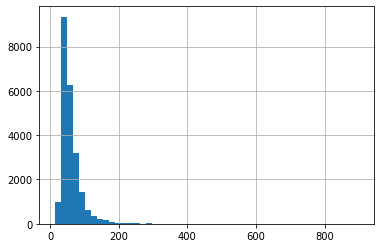

In [335]:
data['total_area'].hist(bins=50, range=(13,900))
plt.show()

<AxesSubplot:>

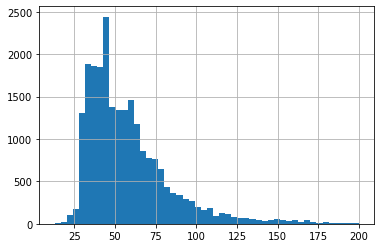

In [336]:
data['total_area'].hist(bins=50, range=(13,200))
plt.show()

<AxesSubplot:>

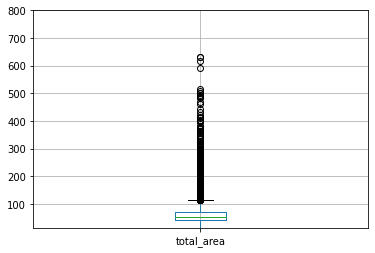

In [337]:
plt.ylim(13,800)
data.boxplot('total_area')
plt.show()

In [338]:
data['total_area'].value_counts()

45.000     414
42.000     381
44.000     345
31.000     341
60.000     338
          ... 
316.300      1
120.500      1
309.700      1
231.200      1
121.200      1
Name: total_area, Length: 1418, dtype: int64

In [339]:
len(data.query('total_area <= 25'))

181

In [340]:
len(data.query('total_area >= 200'))

223

<b> Большинство квартир относительно небольшого размера в диапазоне 30-60 кв.м. "Маленькими" квартирами можно считать помещения менее 25 кв.м., "большими" - более 200 кв.м. Их число в датафрейме практически совпадает. Самая маленькая квартира - 13 кв.м., самая большая - 900 кв.м. </b>

In [341]:
data['living_area'].describe()

count   22883.000
mean       34.340
std        22.098
min         7.280
25%        19.000
50%        30.000
75%        42.000
max       409.700
Name: living_area, dtype: float64

<AxesSubplot:>

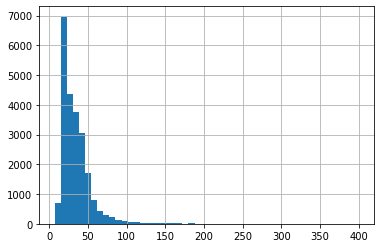

In [342]:
data['living_area'].hist(bins=50, range=(7,400))
plt.show()

<AxesSubplot:>

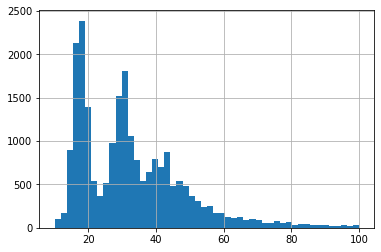

In [343]:
data['living_area'].hist(bins=50, range=(10,100))
plt.show()

<AxesSubplot:>

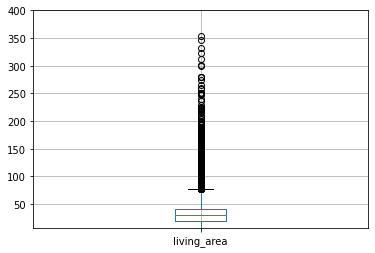

In [344]:
plt.ylim(7,400)
data.boxplot('living_area')
plt.show()

In [345]:
data['living_area'].value_counts()

18.000     857
17.000     668
30.000     588
16.000     474
20.000     470
          ... 
96.400       1
104.100      1
50.260       1
43.810       1
16.740       1
Name: living_area, Length: 2178, dtype: int64

In [346]:
len(data.query('living_area < 13'))

197

In [347]:
len(data.query('living_area > 130'))

189

<b> В среднем, жилая зона в квартирах занимает порядка 56% от общей ее площади (см. п. 2). Соответственно, разброс похож на данные в `total_area` - есть жилые зоны площадью 130+ кв.м., есть и в районе 13-15 кв.м. Гистограммы `total_area` и `living_area` практически идентичны друг другу. </b>

In [348]:
data['kitchen_area'].describe()

count   22883.000
mean       10.407
std         5.822
min         1.300
25%         7.000
50%         9.000
75%        11.900
max       112.000
Name: kitchen_area, dtype: float64

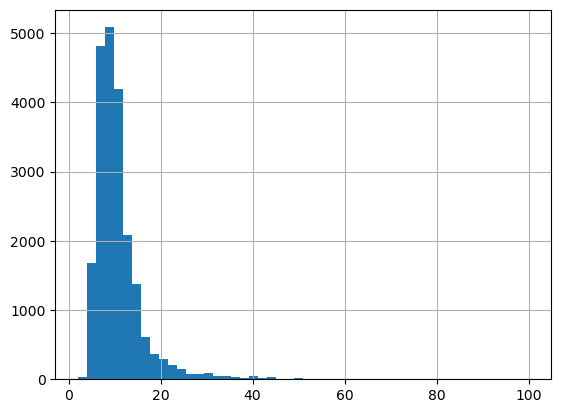

In [29]:
data['kitchen_area'].hist(bins=50, range=(2,100))
plt.show()

<AxesSubplot:>

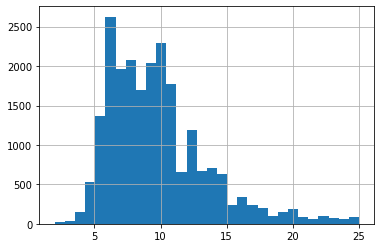

In [350]:
data['kitchen_area'].hist(bins=30, range=(2,25))
plt.show()

<AxesSubplot:>

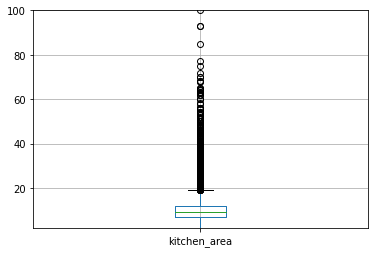

In [351]:
plt.ylim(2,100)
data.boxplot('kitchen_area')
plt.show()

In [352]:
data['kitchen_area'].value_counts()

6.000     1288
10.000    1242
8.000     1085
9.000     1074
7.000     1052
          ... 
34.190       1
33.860       1
32.600       1
13.520       1
16.740       1
Name: kitchen_area, Length: 1317, dtype: int64

In [353]:
len(data.query('kitchen_area <= 4'))

126

In [354]:
len(data.query('kitchen_area >= 45'))

90

<b> Чаще всего в квартирах имеются кухни площаью 6-10 кв.м. Есть и более редкие значения - "маленькие" кухни площадью менее 4 кв.м. и "большие" - более 45 кв.м. Минимальное и максимальное значение - 1.3 и 112 кв.м. соответственно. Гистограмма `kitchen_area` также похожа на `living_area` </b>

In [355]:
data['last_price'].describe()

count       22883.000
mean      6449505.185
std      10455053.798
min        430000.000
25%       3400000.000
50%       4600000.000
75%       6700000.000
max     763000000.000
Name: last_price, dtype: float64

<AxesSubplot:>

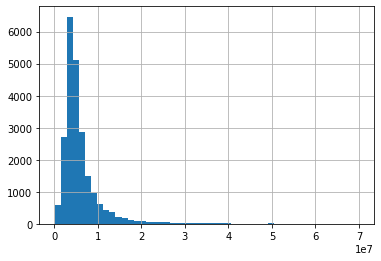

In [356]:
data['last_price'].hist(bins=50, range=(50000,70000000))
plt.show()

In [357]:
data['last_price'].value_counts()

4500000     333
3500000     283
3600000     252
4200000     252
4000000     251
           ... 
19150000      1
6649000       1
9329693       1
2815000       1
11615600      1
Name: last_price, Length: 2856, dtype: int64

In [358]:
len(data.query('last_price <= 1000000'))

242

In [359]:
len(data.query('last_price >= 30000000'))

303

<b> Цена большинства квартир колеблется в районе 4-5 млн. По аналогии с прошлыми признаками, можем выделить более дешевые квартиры стоимостью менее 1 млн. и дорогие - более 30 млн. Данные похожи на нормальное распределение. Гистограмма `last_price` также похожа на предыдущие. </b>

In [360]:
data['rooms'].describe()

count   22883.000
mean        2.068
std         1.061
min         0.000
25%         1.000
50%         2.000
75%         3.000
max        19.000
Name: rooms, dtype: float64

<AxesSubplot:>

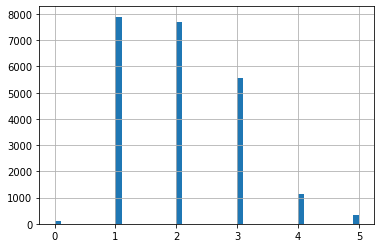

In [361]:
data['rooms'].hist(bins=50, range=(0,5))
plt.show()

In [362]:
data['rooms'].value_counts()

1     7897
2     7689
3     5561
4     1150
5      321
6      103
0       98
7       38
8        9
9        8
10       3
14       2
16       1
19       1
12       1
15       1
Name: rooms, dtype: int64

<b> Большинство квартир имеют 1-2 комнаты, реже - 3-4. Квартиры с 0 комнатами - маленькие помещения-студии, где жилая комната совмещена с кухней. Есть единичные примеры с 8+ комнатами (самые дорогие и большие квартиры). </b>

In [363]:
data['ceiling_height'].describe()

count   22883.000
mean        2.695
std         0.219
min         2.000
25%         2.600
50%         2.650
75%         2.700
max         5.600
Name: ceiling_height, dtype: float64

<AxesSubplot:>

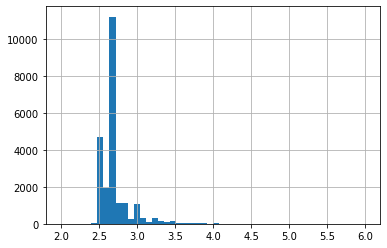

In [364]:
data['ceiling_height'].hist(bins=50, range=(2,6))
plt.show()

In [365]:
len(data.query('ceiling_height < 2.5'))

68

In [366]:
len(data.query('ceiling_height > 3.5'))

265

<b> Подавляющее большинство квартир имеют высоту потолков в 2.5-2.7 метров. Есть совсем немного квартир с потолками ниже этих значений. В датафрейме представлены также квартиры с более нестандартными потолками выше - от 3.5 до 5.6 метров. </b>

In [367]:
data['floor'].describe()

count   22883.000
mean        5.840
std         4.840
min         1.000
25%         2.000
50%         4.000
75%         8.000
max        33.000
Name: floor, dtype: float64

<AxesSubplot:>

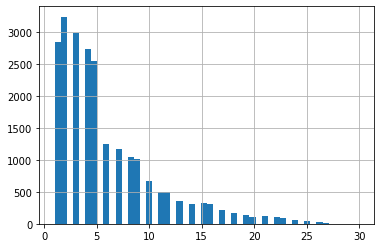

In [368]:
data['floor'].hist(bins=50, range=(1,30))
plt.show()

In [369]:
data['floor'].value_counts()

2     3247
3     2989
1     2852
4     2743
5     2549
6     1250
7     1165
8     1040
9     1013
10     665
11     501
12     497
13     354
15     325
14     318
16     307
17     214
18     165
19     138
21     115
20     104
22     103
23      93
24      54
25      44
26      22
27      10
28       1
29       1
32       1
30       1
33       1
31       1
Name: floor, dtype: int64

<b> В среднем, квартиры расположены в пределах первых 10 этажей. Квартир на высоких этажах мало. Вероятно, связано с тем, что данные представлены не только по Санкт-Петербургу, но и по области, где мало высоких домов. Сведения похожи на распределение Пуассона. </b>

In [370]:
data['floor_type'].value_counts()

другой       16792
последний     3239
первый        2852
Name: floor_type, dtype: int64

<AxesSubplot:>

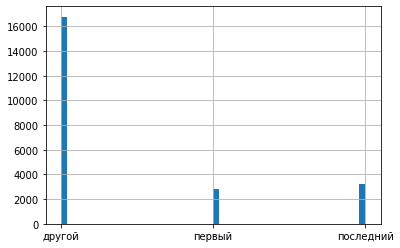

In [371]:
data['floor_type'].hist(bins=50)
plt.show()

<b> Квартир на первых и последних этажах относительно поровну, в совокупности это порядка 30% от общего числа объектов. </b>

In [372]:
data['floors_total'].describe()

count   22883.000
mean       10.614
std         6.564
min         1.000
25%         5.000
50%         9.000
75%        16.000
max        60.000
Name: floors_total, dtype: float64

<AxesSubplot:>

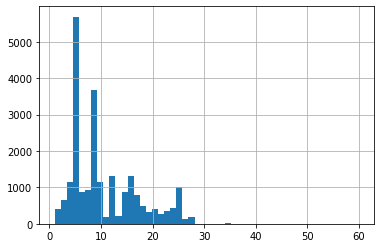

In [373]:
data['floors_total'].hist(bins=50, range=(1,60))
plt.show()

In [374]:
data['floors_total'].value_counts()

5     5690
9     3670
12    1325
16    1312
4     1154
10    1138
25    1017
6      884
17     800
3      652
7      569
14     536
18     482
24     436
8      373
2      369
15     351
23     342
19     327
22     275
20     256
13     222
11     195
27     159
21     154
26     122
1       24
35      21
28      21
36       2
34       1
60       1
52       1
29       1
33       1
Name: floors_total, dtype: int64

<b> Значения в `floors_total` в целом подтверждают предыдущие выводы - в датафрейме превалируют квартиры в невысоких домах, в основном 5-, 9-, 12-этажных, вероятно построенных несколько десятков лет назад. При этом и одноэтажных частных домов мало, всего 24. Гистограмма несколько хаотична, вероятно, связано с тем, что дома строятся стандартно и единообразно, соответственно, мало построек с "необычным" для нашей местности числом этажей (например, 8 или 11). </b>

In [375]:
data['cityCenters_nearest'].describe()

count   22883.000
mean    13928.249
std      7554.251
min       181.000
25%     10912.000
50%     13085.000
75%     15245.000
max     65968.000
Name: cityCenters_nearest, dtype: float64

<AxesSubplot:>

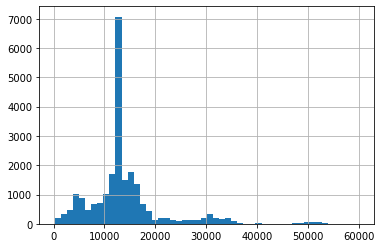

In [376]:
data['cityCenters_nearest'].hist(bins=50, range=(200,60000))
plt.show()

<AxesSubplot:>

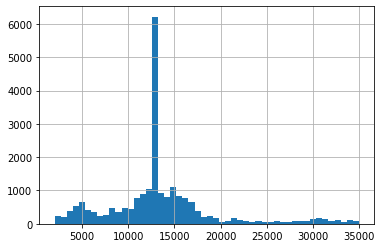

In [377]:
data['cityCenters_nearest'].hist(bins=50, range=(2000,35000))
plt.show()

In [378]:
len(data.query('cityCenters_nearest < 2000'))

306

In [379]:
len(data.query('cityCenters_nearest > 50000'))

180

<b> Большинство квартир располагаются в радиусе порядка 12000-15000 м. от центра. Поскольку за исконное значение "центра" взята точка в Санкт-Петербурге, а не в каждом городе или поселке, то ближе всех к центру располагаются квартиры из СПб. В удаленных от города населенных пунктах квартир продается меньше, соответственно, и значений меньше. В данном признаке было много пропусков, они были заменены одним медианным значением, поэтому это значение "возвышается" над остальными на гистограмме. Но это скорее подтверждает тенденцию относительно расположения квартир в районе упомянутых 12000-14000 м. </b>

In [380]:
data['airports_nearest'].describe()

count   22883.000
mean    28315.983
std     11079.085
min      6450.000
25%     21176.000
50%     26737.000
75%     34309.500
max     84869.000
Name: airports_nearest, dtype: float64

<AxesSubplot:>

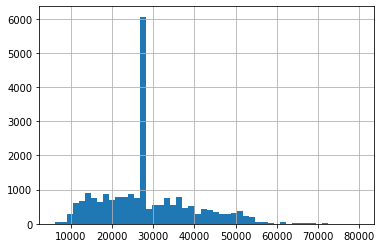

In [381]:
data['airports_nearest'].hist(bins=50, range=(6000,80000))
plt.show()

In [382]:
len(data.query('airports_nearest < 10000'))

286

In [383]:
len(data.query('airports_nearest > 55000'))

312

<b> График похож на предыдущюю гистограмму, т.к. метод заполнения пропусков был таким же, но в целом логика та же - большинство квартир в Санкт-Петербурге, соответственно они примерно в равной степени равноудалены от аэропорта. Отличие - нет квартир рядом с аэропортами (они все-таки строятся на удалении от жилых кварталов), при этом максимальные значения в данном признаке больше, чем в `cityCenters_nearest`. Это означает, что из удаленных квартир добраться до центра Санкт-Петербурга проще и ближе, чем до аэропорта. </b>

In [384]:
data['parks_nearest'].describe()

count   22883.000
mean     2229.738
std      1264.989
min         7.000
25%       601.000
50%      3127.000
75%      3127.000
max      3190.000
Name: parks_nearest, dtype: float64

<AxesSubplot:>

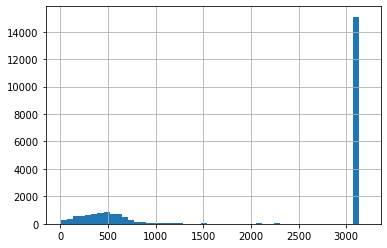

In [385]:
data['parks_nearest'].hist(bins=50, range=(7,3200))
plt.show()

<AxesSubplot:>

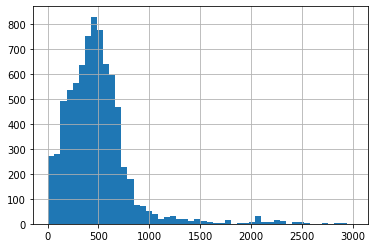

In [386]:
data['parks_nearest'].hist(bins=50, range=(7,3000))
plt.show()

In [387]:
len(data.query('parks_nearest > 3000'))

15099

<b> В большинстве квартир парки в радиусе ближайших 3000 м. отсутствуют (вместо этих значений изначально были пропуски). Если говорим о квартирах, у которых есть парки в пешей доступности, то они, как правило, располагаются в радиусе ~500 м. Вторая гистограмма похожа на нормальное распределение. </b>

In [388]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22883 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            22883 non-null  int64         
 1   last_price              22883 non-null  int64         
 2   total_area              22883 non-null  float64       
 3   first_day_exposition    22883 non-null  datetime64[ns]
 4   rooms                   22883 non-null  int64         
 5   ceiling_height          22883 non-null  float64       
 6   floors_total            22883 non-null  int64         
 7   living_area             22883 non-null  float64       
 8   floor                   22883 non-null  int64         
 9   is_apartment            22883 non-null  bool          
 10  studio                  22883 non-null  bool          
 11  open_plan               22883 non-null  bool          
 12  kitchen_area            22883 non-null  float6

In [389]:
data['weekday_exposition'].describe()

count   22883.000
mean        2.569
std         1.787
min         0.000
25%         1.000
50%         3.000
75%         4.000
max         6.000
Name: weekday_exposition, dtype: float64

In [390]:
data['weekday_exposition'].value_counts()

3    4151
1    4034
4    3871
2    3847
0    3481
5    1867
6    1632
Name: weekday_exposition, dtype: int64

<AxesSubplot:>

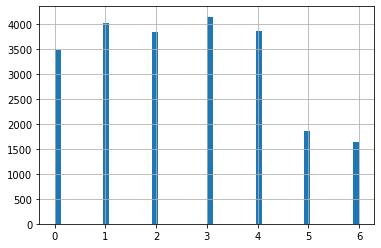

In [391]:
data['weekday_exposition'].hist(bins=50, range=(0,6))
plt.show()

<b> Видно, что реже всего объявления публиковались в выходные дни (значения 5 и 6). Разброс между будними не так велик, значения практически равны между собой. Можно предположить, что это связано с необходимостью проверки публикуемых объявлений в базе данных (очевидно, в выходные дни активность модераторов портала ниже, и они пропускали меньше объявлений). </b>

In [392]:
data['month_exposition'].describe()

count   22883.000
mean        6.403
std         3.492
min         1.000
25%         3.000
50%         6.000
75%        10.000
max        12.000
Name: month_exposition, dtype: float64

In [393]:
data['month_exposition'].value_counts()

2     2550
3     2512
11    2283
4     2282
10    2050
9     1923
6     1704
8     1690
7     1630
12    1593
1     1443
5     1223
Name: month_exposition, dtype: int64

<AxesSubplot:>

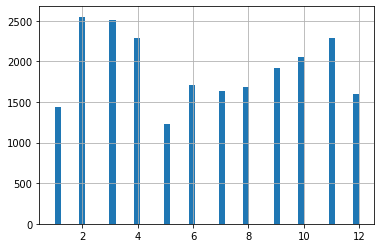

In [394]:
data['month_exposition'].hist(bins=50, range=(1,12))
plt.show()

<b> Реже всего объявления публиковались в январе и мае, чуть чаще - в летние месяцы и декабре. С одной стороны, это подтверждает тезис о модерации объявлений (в январе и мае много выходных дней, летом - период отпусков, в декабре идет подготовка к завершению года, необходимость завершить другие дела). С другой, активность продавцов по тем же причинам также вероятно идет на спад. Чаще всего они настроены продавать свои квартиры весной и осенью. В целом, оба предположения имеют право на существование. </b>

### Изучите, как быстро продавались квартиры

In [395]:
data['days_exposition'].describe()

count   19823.000
mean      179.966
std       216.637
min         3.000
25%        45.000
50%        95.000
75%       231.000
max      1396.000
Name: days_exposition, dtype: float64

<AxesSubplot:>

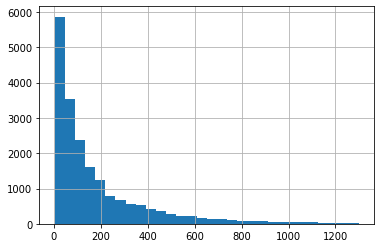

In [396]:
data['days_exposition'].hist(bins=30,range=(3,1300))
plt.show()

In [397]:
len(data.query('days_exposition > 365'))

2952

In [398]:
len(data.query('days_exposition < 7'))

587

In [399]:
len(data.query('days_exposition < 14'))

1564

In [400]:
len(data.query('days_exposition > 600'))

1148

In [401]:
len(data.query('days_exposition > 600')) / len(data['days_exposition'])

0.0501682471703885

<AxesSubplot:>

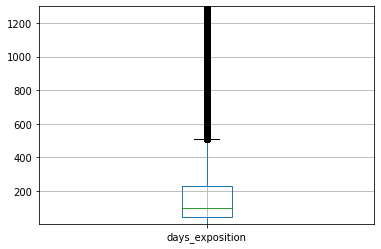

In [402]:
plt.ylim(3,1300)
data.boxplot('days_exposition')
plt.show()

<b> Во время предобработки данных были убраны аномально низкие (менее 3 дней) и высокие (более 1400) значения. Гистограмма похожа на распределение Пуассона - чаще квартиры продаются быстро, нежели долго. Среднее значение - 180 дней. Медиана - 95 дней. Разброс между показателями связан с тем, что в датафрейме представлены квартиры, которые продавались год и более (практически 10% от всех данных). Наиболее долгими могут считаться продажи квартиры в течение 600 и более дней (около 5% от всех сведений), быстрыми - менее, чем за две недели. </b>

### Факторы, влияющие на стоимость квартиры

##### Общая площадь

In [403]:
data.pivot_table(index='total_area', values='last_price',aggfunc='mean').describe()

,last_price
count,1418.000
mean,16786609.358
std,28579359.612
min,945750.000
25%,4927740.691
50%,9220791.083
75%,17774875.000
max,420000000.000


In [404]:
data['total_area'].corr(data['last_price'])

0.6704726430006784

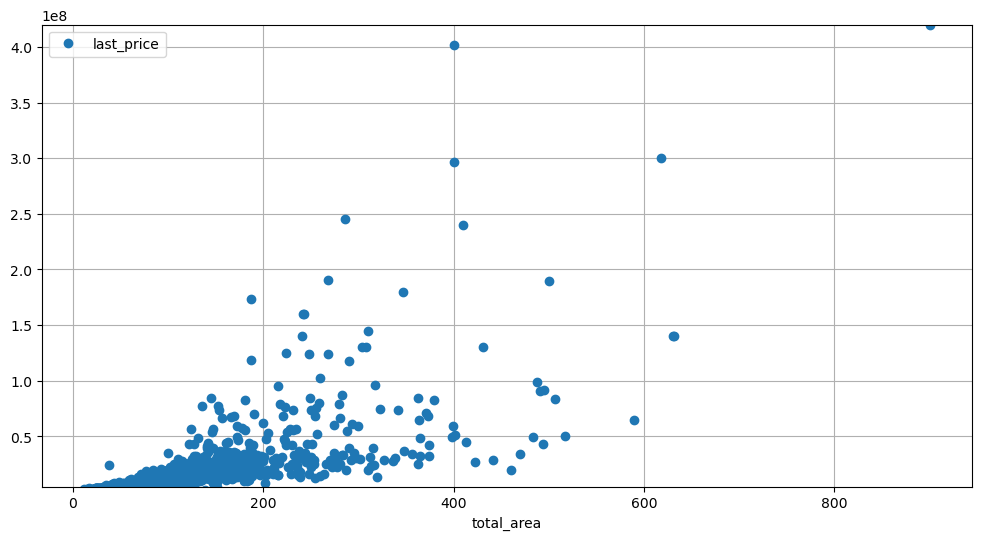

In [30]:
data.pivot_table(index='total_area', values='last_price',aggfunc='mean').plot( 
    ylim=(5000000, 420000000), 
    style='o', 
    grid=True, 
    figsize=(12, 6)
)
plt.show()

<AxesSubplot:xlabel='total_area'>

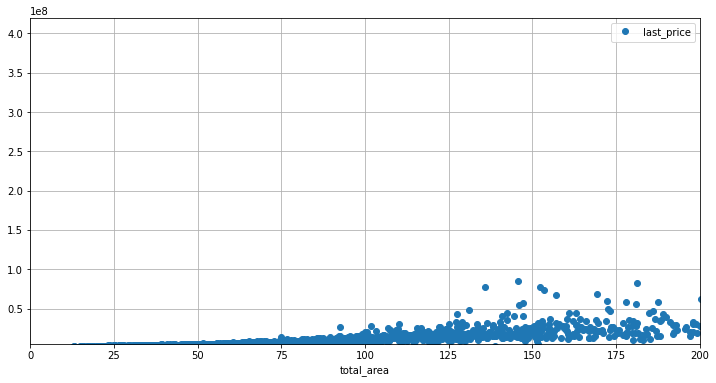

In [406]:
data.pivot_table(index='total_area', values='last_price',aggfunc='mean').plot( 
    ylim=(5000000, 420000000), 
    xlim=(0,200),
    style='o', 
    grid=True, 
    figsize=(12, 6)
)
plt.show()

<b> По оси Х на графике - площадь квартир, по оси Y - их средняя стоимость. Если мы рассматриваем квартиры до 100-125 кв.м. (коих в датафрейме большинство), то видим, что чем больше площадь, тем выше средняя стоимость. Ближе к 200 кв.м. и дальше, корреляция слабеет - точки перестают сливаться, между ними становится видно пробелы. Особенно отчетливо это видно на примере самых дорогих квартир - если объект площадью 900 кв.м. своей ценой пробивает потолок, то на втором месте находится квартира площадью 400 кв.м., в то время как в исследовании представлены помещения и с большей площадью. Таким образом, делаем следующий вывод - чем меньше квартира, тем больше ее площадь влияет на среднюю стоимость. </b>

##### Жилая площадь

In [407]:
data.pivot_table(index='living_area', values='last_price',aggfunc='mean').describe()

,last_price
count,2178.000
mean,12643375.930
std,22602635.183
min,450000.000
25%,4200000.000
50%,6567615.407
75%,12990000.000
max,420000000.000


In [408]:
data['living_area'].corr(data['last_price'])

0.6029024132309156

<AxesSubplot:xlabel='living_area'>

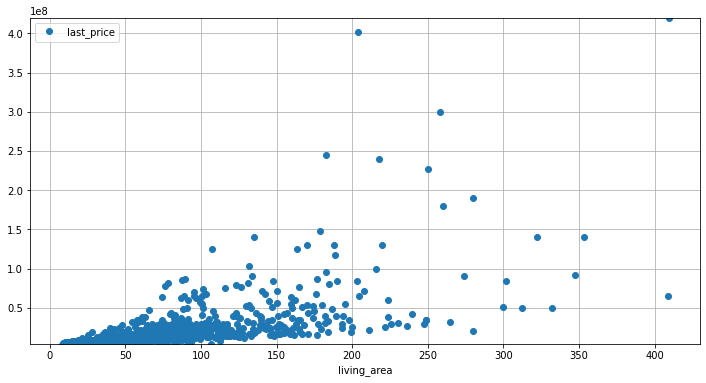

In [409]:
data.pivot_table(index='living_area', values='last_price',aggfunc='mean').plot( 
    ylim=(4000000, 420000000), 
    style='o', 
    grid=True, 
    figsize=(12, 6)
)
plt.show()

<AxesSubplot:xlabel='living_area'>

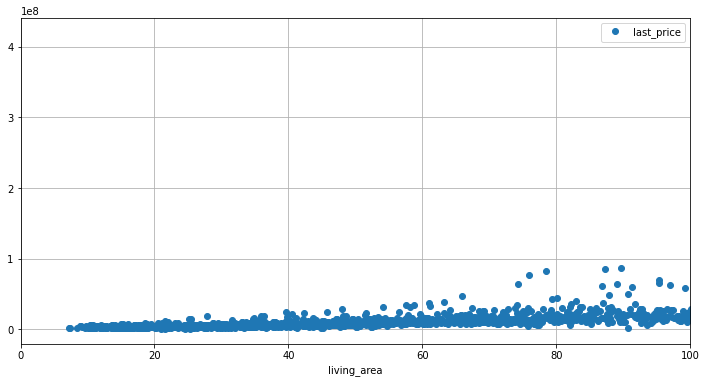

In [410]:
data.pivot_table(index='living_area', values='last_price',aggfunc='mean').plot( 
    xlim=(0,100),
    style='o', 
    grid=True, 
    figsize=(12, 6)
)
plt.show()

<b> Что касается влияния жилой площади на среднюю стоимость, то здесь наблюдается похожая тенденция - большинство квартир с площадью комнат до 60 кв.м. практически слились в единое целое, дальше начинаются разбросы между значениями. Причем в квартирах с большей жилой площадью корреляция со средней стоимостью жилья еще слабее, чем с общей площадью. Таким образом, жилая площадь влияет на цену квартиры в схожей с общей площадью манере, но в меньшей степени. </b>

##### Площадь кухни

In [411]:
data.pivot_table(index='kitchen_area', values='last_price',aggfunc='mean').describe()

,last_price
count,1317.000
mean,12088429.715
std,22230374.820
min,945750.000
25%,3855373.500
50%,6012000.000
75%,13193760.000
max,420000000.000


In [412]:
data['kitchen_area'].corr(data['last_price'])

0.5199096962505665

<AxesSubplot:xlabel='kitchen_area'>

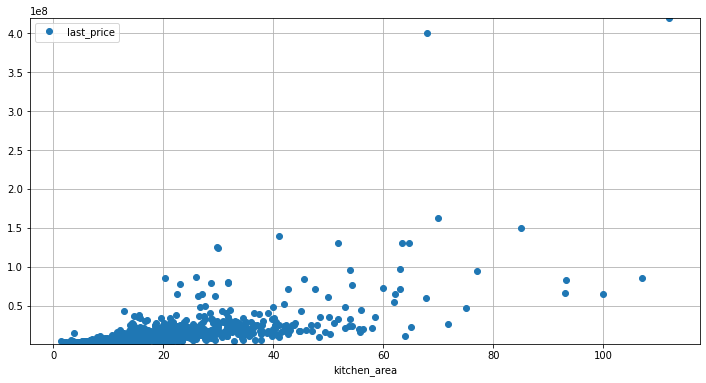

In [413]:
data.pivot_table(index='kitchen_area', values='last_price',aggfunc='mean').plot( 
    ylim=(900000, 420000000), 
    style='o', 
    grid=True, 
    figsize=(12, 6)
)
plt.show()

<AxesSubplot:xlabel='living_area'>

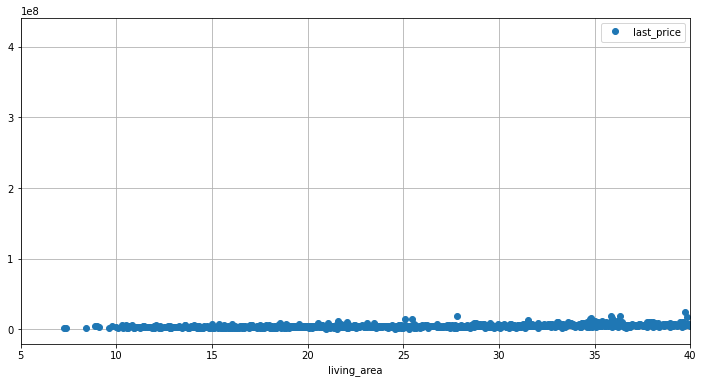

In [414]:
data.pivot_table(index='living_area', values='last_price',aggfunc='mean').plot( 
    xlim=(5,40),
    style='o', 
    grid=True, 
    figsize=(12, 6)
)
plt.show()

<b> Влияние площади кухни на стоимость квартира пока что наименьшее из рассмотреннных. Очевидно, что разброс цен у квартир с большими кухнями очень похож на объекты с большой общей и жилой площадьми. Между тем, рассматривая квартиры с маленькими и средними кухнями (до 20 кв.м.), можем увидеть, что график гораздо более ровный, чем у `total_area` или `living_area`. По всей видимости, это связано с тем, что в датафрейме есть много квартир, где кухни, к примеру, совмещены с одной из жилой комнат, в результате чего жилая площадь квартиры может быть сильно больше кухонной. Можем сделать вывод, что размер кухонь имеет наименьшее из трех упомянутых признаков влияние на формирование стоимости квартир. </b>

##### Количество комнат

In [415]:
data.pivot_table(index='rooms', values='last_price',aggfunc='mean')

,last_price
rooms,
0,3661196.429
1,3816148.528
2,5495089.874
3,8039962.222
4,13225721.250
5,23737223.558
6,32059931.301
7,69215789.474
8,46044444.444


In [416]:
data['rooms'].corr(data['last_price'])

0.374858422744631

<AxesSubplot:xlabel='rooms'>

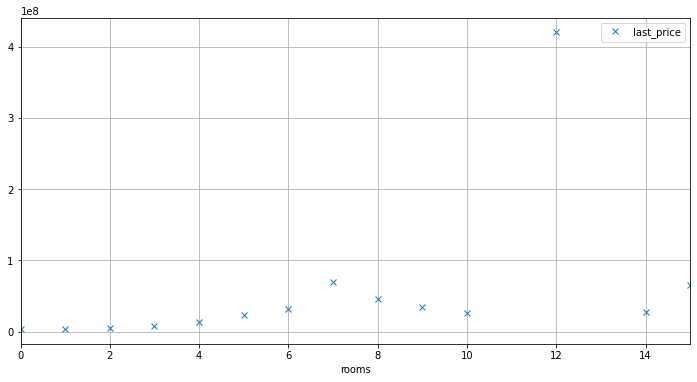

In [417]:
data.pivot_table(index='rooms', values='last_price',aggfunc='mean').sort_values(by='last_price', ascending=False).plot( 
    xlim=(0,15), 
    style='x',
    grid=True, 
    figsize=(12, 6),
)
plt.show()

<AxesSubplot:ylabel='rooms'>

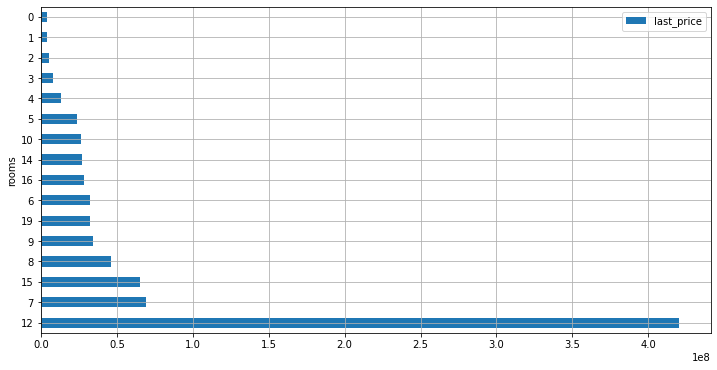

In [418]:
data.pivot_table(index='rooms', values='last_price',aggfunc='mean').sort_values(by='last_price', ascending=False).plot( 
    kind='barh',
    ylim=(0,15), 
    grid=True, 
    figsize=(12, 6),
)
plt.show()

In [419]:
data['rooms'].value_counts()

1     7897
2     7689
3     5561
4     1150
5      321
6      103
0       98
7       38
8        9
9        8
10       3
14       2
16       1
19       1
12       1
15       1
Name: rooms, dtype: int64

<b> Для большинства квартир, где, в основном, 1-3 комнаты, наблюдается корреляция числа помещений со средней стоимостью жилья. Однако, все что касается квартир с 5+ комнатами, взаимосвязь с ценой прослеживается слабо. Таким образом, делаем вывод, что для большинства маленьких и средних квартир число комнат прямо влияет на ее цену, но для более редких дорогих квартир с большим числом комнат эта взаимосвязь становится слабее. </b>

##### Этаж квартиры

In [420]:
data.pivot_table(index='floor_type', values='last_price',aggfunc='mean')

,last_price
floor_type,
другой,6610589.806
первый,4700312.985
последний,7154587.989


<AxesSubplot:ylabel='floor_type'>

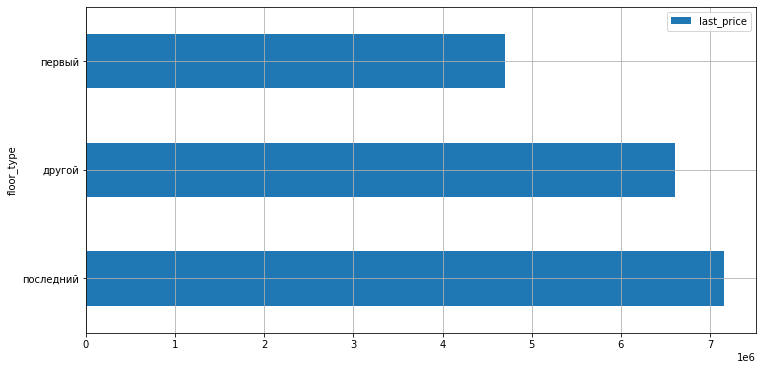

In [421]:
data.pivot_table(index='floor_type', values='last_price',aggfunc='mean').sort_values(by='last_price', ascending=False).plot( 
    kind='barh',
    grid=True, 
    figsize=(12, 6),
)
plt.show()

In [422]:
data['floor_type'].value_counts()

другой       16792
последний     3239
первый        2852
Name: floor_type, dtype: int64

<b> Очевидно, квартиры на первом этаже сильно дешевле, чем помещения, располагающиеся выше. Самыми дорогими являются квартиры на последнем этаже. Таким образом, видим прямую зависимость от этажности квартиры и ее цены. </b>

##### Дата размещения объявления

<AxesSubplot:xlabel='weekday_exposition'>

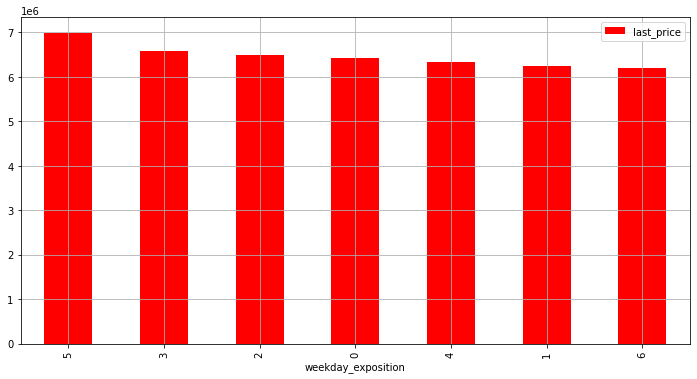

In [423]:
data.pivot_table(index='weekday_exposition', values='last_price',aggfunc='mean').sort_values(by='last_price', ascending=False).plot( 
    kind='bar',
    color='red',
    grid=True, 
    figsize=(12, 6),
)
plt.show()

In [424]:
data['weekday_exposition'].value_counts()

3    4151
1    4034
4    3871
2    3847
0    3481
5    1867
6    1632
Name: weekday_exposition, dtype: int64

In [425]:
data['weekday_exposition'].corr(data['last_price'])

0.00507222846906841

<AxesSubplot:xlabel='month_exposition'>

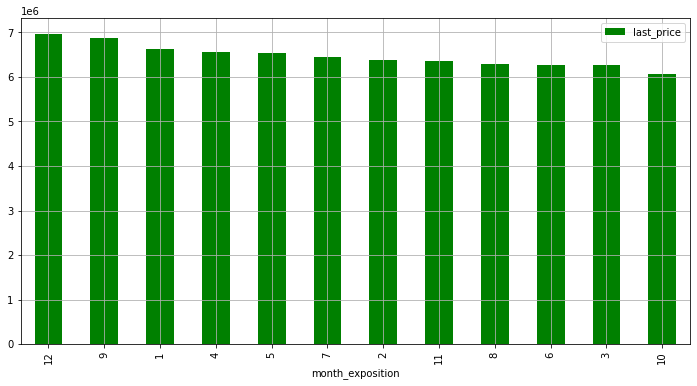

In [426]:
data.pivot_table(index='month_exposition', values='last_price',aggfunc='mean').sort_values(by='last_price', ascending=False).plot( 
    kind='bar',
    color='green',
    grid=True, 
    figsize=(12, 6),
)
plt.show()

In [427]:
data['month_exposition'].value_counts()

2     2550
3     2512
11    2283
4     2282
10    2050
9     1923
6     1704
8     1690
7     1630
12    1593
1     1443
5     1223
Name: month_exposition, dtype: int64

In [428]:
data['month_exposition'].corr(data['last_price'])

0.003467857403265144

<AxesSubplot:xlabel='year_exposition'>

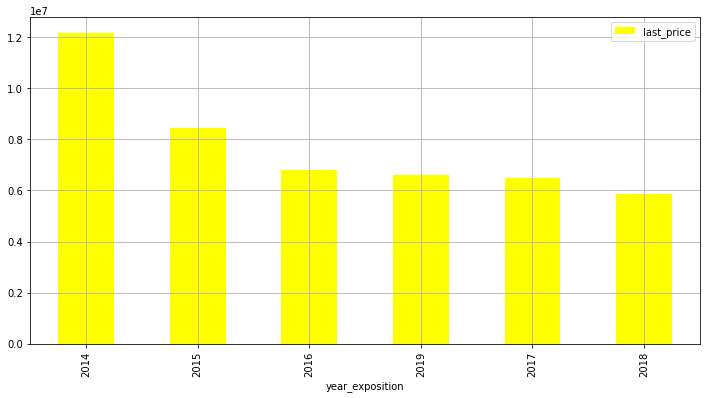

In [429]:
data.pivot_table(index='year_exposition', values='last_price',aggfunc='mean').sort_values(by='last_price', ascending=False).plot( 
    kind='bar',
    color='yellow',
    grid=True, 
    figsize=(12, 6),
)
plt.show()

In [430]:
data['year_exposition'].value_counts()

2018    8237
2017    7926
2019    2778
2016    2690
2015    1133
2014     119
Name: year_exposition, dtype: int64

In [431]:
data['year_exposition'].corr(data['last_price'])

-0.045638720473248226

<b> Начнем с дня недели публикации объявления. В среднем, самые дорогие квартиры выставлялись по субботам, более дешевые - по воскресеньям. В будние дни ситуация примерно равная. Как представляется, корреляция здесь отсутствует. Та же ситуация наблюдается и в сравнении месяца публикации объявлений со стоимостью квартир. Самые дорогие - в декабре, самые дешевые - в октябре. Взаимосвязь также не прослеживается. Год публикации объявлений - самые дорогие публиковались в 2014 г., после чего наблюдался спад (но в 2014 г. публиковалось мало объявлений), и с 2016 г. средняя цена за квартиры примерно равная. Таким образом, слабая корреляция прослеживается только при рассмотрении года публикации объявлений, однако большого влияния на формирование цены время размещения не оказывает. </b>

<b> Таким образом, наиболее важными факторами формирования стоимости квартиры являются общая площадь, количество комнат и этаж квартиры. </b>

### Стоимость квадратного метра в городах

In [432]:
data['locality_name'].value_counts().head(10)

санкт-петербург    15200
мурино               554
кудрово              451
шушары               428
всеволожск           379
пушкин               359
колпино              328
парголово            324
гатчина              293
выборг               235
Name: locality_name, dtype: int64

<b> Города, в которых опубликовано больше всего объявлений. </b>

In [433]:
data.query('locality_name == ["санкт-петербург", "мурино", "кудрово", "шушары", "всеволожск", "пушкин", "колпино", "парголово", "гатчина", "выборг"]').groupby('locality_name')['price_for_square_meter'].mean().sort_values(ascending=False)

locality_name
санкт-петербург   114154.497
пушкин            101762.925
кудрово            95374.455
парголово          90088.883
мурино             85757.458
шушары             78644.589
колпино            75330.262
гатчина            68681.444
всеволожск         67091.950
выборг             57943.906
Name: price_for_square_meter, dtype: float64

<b> Средняя стоимость квадратного метра в наиболее популярных городах </b>

In [434]:
data.groupby('locality_name')['price_for_square_meter'].mean().sort_values(ascending = False).head(10)

locality_name
санкт-петербург   114154.497
сестрорецк        102474.847
пушкин            101762.925
лисий нос         100660.333
мистолово          98544.727
зеленогорск        97893.905
левашово           96997.000
кудрово            95374.455
парголово          90088.883
стрельна           88267.000
Name: price_for_square_meter, dtype: float64

<b> Населенные пункты с самой высокой стоимостью квадратного метра. </b>

In [435]:
data.groupby('locality_name')['price_for_square_meter'].mean().sort_values(ascending = False).tail(10)

locality_name
житково           14956.000
ям-тесово         13711.000
сижно             13709.000
тёсово-4          12931.000
малая романовка   12724.000
совхозный         12628.500
выскатка          12335.000
вахнова кара      11688.000
свирь             11481.000
старополье        11206.000
Name: price_for_square_meter, dtype: float64

<b> Населенные пункты с самой низкой стоимостью квадратного метра. </b>

<b> Таким образом, больше всего объявлений о продаже квартиры размещено в Санкт-Петербурге. Там же стоимость объектов самая высокая. Что касается других девяти наиболее популярных населенных пунктов, то только Пушкин, Кудрово и Парголово входят в десятку городов с самой высокой стоимостью квадратного метра. Разница между квартирами в населенных пунктах с самой низкой стоимостью квадратного метра и Санкт-Петербургом достигает 10 раз. </b>

### Стоимость одного километра в Санкт-Петербурге

In [436]:
data.query('locality_name == "санкт-петербург"').groupby('cityCenters_in_km')['last_price'].mean()

cityCenters_in_km
0    22048304.709
1    15804255.502
2    16140520.795
3    13413952.873
4    13564837.070
5    14873061.934
6    14232003.418
7    12523063.628
8     8357013.025
9     6438508.424
10    6330116.928
11    5935100.657
12    5940979.586
13    6373260.149
14    5706584.960
15    5532518.805
16    5529182.323
17    4840047.712
18    5318729.821
19    4731974.562
20    6400401.139
21    5139822.979
22    5348689.128
23    4167517.241
24    3862235.000
25    4048664.323
26    3575000.000
27    8300000.000
28    4910500.000
29    3833333.333
Name: last_price, dtype: float64

In [437]:
data.query('locality_name == "санкт-петербург"').groupby('cityCenters_in_km')['last_price'].mean().describe()

count         30.000
mean     8107339.334
std      4787109.421
min      3575000.000
25%      4967830.745
50%      5938040.122
75%     11481550.977
max     22048304.709
Name: last_price, dtype: float64

<AxesSubplot:title={'center':'Средняя стоимость квартир в зависимости от удаленности от центра города'}, xlabel='cityCenters_in_km'>

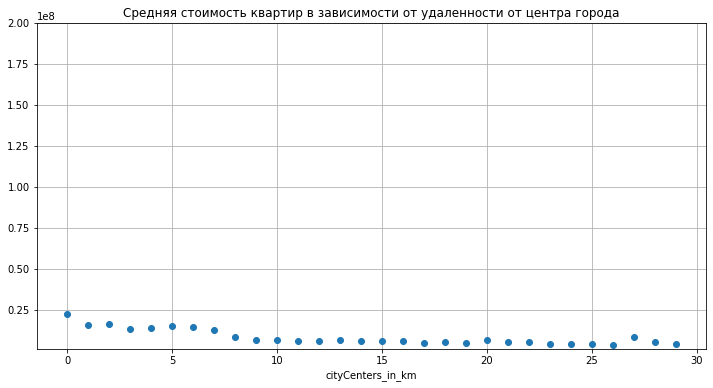

In [438]:
data.query('locality_name == "санкт-петербург"').groupby('cityCenters_in_km')['last_price'].mean().plot(
    title = 'Средняя стоимость квартир в зависимости от удаленности от центра города', 
    x='cityCenters_in_km', 
    y='last_price', 
    ylim=(1000000, 200000000), 
    style='o', 
    grid=True, 
    figsize=(12, 6)
)
plt.show()

<b> По оси Х - данные об удаленности квартир в Санкт-Петербурге от центра города в км., по оси Y - средняя цена этих квартир. Исходя из графика, видно, что чем дальше квартира от центра, тем ниже ее стоимость. Особенно отчетливо это наблюдается при сравнении квартир, находящихся в непосредственной близости (5 км. и менее) и объектов на окраине города (25+ км.). В среднем, стоимость одного километра составляет порядка 8 млн. Однако, если мы рассмотрим квартиры, условно входящие в одну группу по удаленности от центра(к примеру, расположенные в пределах тех же 5 км.), то увидим, что, квартиры в 1 км. от центра дешевле квартир в 2 км., квартиры в 19 км. дешевле квартир в 20 км. и т.д. Таким образом, можем сделать вывод, что расстояние до центра города влияет только на удаленные друг от друга квартиры. Объекты, находящие от центра далеко, будут стоить гораздо дешевле квартир в центре. Однако, если квартиры равноприближены или равноудалены от центра, то разница в несколько километров на их цену влияет слабо. </b>

# Общий вывод


Таким образом, был изучен архив объявлений о продаже квартир в Санкт-Петербурге и соседних населенных пунктах. Была выполнена предобработка данных - запонлены пропуски, изменены типы данных, устранены дупликаты и аномальные значения. Добавлены  в таблицу новые данные ( цена одного квадратного метра, день публикации объявления, месяц публикации объявления, год публикации объявления, тип этажа квартиры (первый, последний, другой), расстояние в км до центра города. Найдены интересные особенности и зависимости, которые существуют на рынке недвижимости: наиболее популярные квартиры – в диапазоне 30-60 кв.м. (самая частотная – 45 кв.м.). Маленькими" квартирами можно считать помещения менее 25 кв.м., "большими" - более 200 кв.м. Их число в исследовании практически совпадает. В среднем, жилая зона в квартирах занимает порядка 56% от общей ее площади. Цена большинства квартир колеблется в районе 4-5 млн. Большинство квартир имеют 1-2 комнаты, реже - 3-4. Как правило, квартиры расположены в пределах первых 10 этажей. Квартир на высоких этажах мало. Наиболее важными факторами формирования стоимости квартиры являются общая площадь, количество комнат и этаж квартиры. Больше всего объявлений о продаже квартиры размещено в Санкт-Петербурге. Там же стоимость объектов самая высокая.